# Name: Yousef Al-ghanim
# ID: 2122123716
# Final Project

# Phenomenon:
## Exploratory Data analysis (EDA) in social media customer service for top 20 most active english speaking airlines.

# Tools used:
- Pandas
- Jupyter notebook
- Altair
- Sklearn
- Numpy
- NLTK
- Matplotlib
- python built in libraries  (re, datetime)
- Tweepy

    

# Data collection:

In [96]:
airlines_df.loc[:,['description','statuses_count','user_name','user_screen_name','user_lang']].head(20)

,description,statuses_count,user_name,user_screen_name,user_lang
0,We’re here to offer advice and inspiration for...,1794976,American Airlines,AmericanAir,en
1,JAL（日本航空）の「今」をお伝えする公式アカウントです！「誰かに話したくなっちゃう！」そん...,1175864,JAPAN AIRLINES【JAL】,JAL_Official_jp,ja
2,Official global account of KLM. While we keep ...,951562,Royal Dutch Airlines,KLM,en
3,Official British Airways Twitter account. We l...,871422,British Airways,British_Airways,en
4,Conversations with you here are 280 characters...,866650,United,united,en
5,Official account of Delta Air Lines. We’re lis...,611941,Delta,Delta,en
6,"http://t.co/O12EYOWlB1 Deals, Offers for All F...",538295,Qatar Flights,qatarflights,en
7,We run on #SouthwestHeart. Follow for news & s...,534825,Southwest Airlines,SouthwestAir,en
8,"Hi, nice to tweet you! Fly with us to 101 dest...",485314,JetBlue Airways,JetBlue,en
9,#AvGeek researching and writing things about a...,225071,Jason Rabinowitz,AirlineFlyer,en


In [97]:
# filtering the verified and english accounts
top_20_airlines_df = airlines_df[(airlines_df.verified==True) & (airlines_df.user_lang == 'en')].reset_index(drop=True).head(39)
top_20_airlines_df.loc[:,['description','statuses_count','user_name','user_screen_name','user_lang']].head(20)

,description,statuses_count,user_name,user_screen_name,user_lang
0,We’re here to offer advice and inspiration for...,1794976,American Airlines,AmericanAir,en
1,Official global account of KLM. While we keep ...,951562,Royal Dutch Airlines,KLM,en
2,Official British Airways Twitter account. We l...,871422,British Airways,British_Airways,en
3,Conversations with you here are 280 characters...,866650,United,united,en
4,Official account of Delta Air Lines. We’re lis...,611941,Delta,Delta,en
5,We run on #SouthwestHeart. Follow for news & s...,534825,Southwest Airlines,SouthwestAir,en
6,"Hi, nice to tweet you! Fly with us to 101 dest...",485314,JetBlue Airways,JetBlue,en
7,#AvGeek researching and writing things about a...,225071,Jason Rabinowitz,AirlineFlyer,en
8,Official account of Alaska Airlines. Our Socia...,189825,Alaska Airlines,AlaskaAir,en
9,Hello Twitterattis! You can tweet to us with #...,107852,Jet Airways,jetairways,en


In [98]:
# removing non-airlines accounts and non-english accounts
top_20_airlines_df = top_20_airlines_df.drop(top_20_airlines_df.index[[7,12,13,20]]).reset_index(drop=True)
top_20_airlines_df.loc[:,['description','statuses_count','user_name','user_screen_name','user_lang']].head(20)

,description,statuses_count,user_name,user_screen_name,user_lang
0,We’re here to offer advice and inspiration for...,1794976,American Airlines,AmericanAir,en
1,Official global account of KLM. While we keep ...,951562,Royal Dutch Airlines,KLM,en
2,Official British Airways Twitter account. We l...,871422,British Airways,British_Airways,en
3,Conversations with you here are 280 characters...,866650,United,united,en
4,Official account of Delta Air Lines. We’re lis...,611941,Delta,Delta,en
5,We run on #SouthwestHeart. Follow for news & s...,534825,Southwest Airlines,SouthwestAir,en
6,"Hi, nice to tweet you! Fly with us to 101 dest...",485314,JetBlue Airways,JetBlue,en
7,Official account of Alaska Airlines. Our Socia...,189825,Alaska Airlines,AlaskaAir,en
8,Hello Twitterattis! You can tweet to us with #...,107852,Jet Airways,jetairways,en
9,This is the OFFICIAL twitter site of Philippin...,94662,Philippine Airlines,flyPAL,en


# Twitter User Gender Classification
### ref: https://www.kaggle.com/crowdflower/twitter-user-gender-classification
# Twitter US Airline Sentiment
### ref: https://www.kaggle.com/crowdflower/twitter-airline-sentiment

# Number of collected tweets:75070
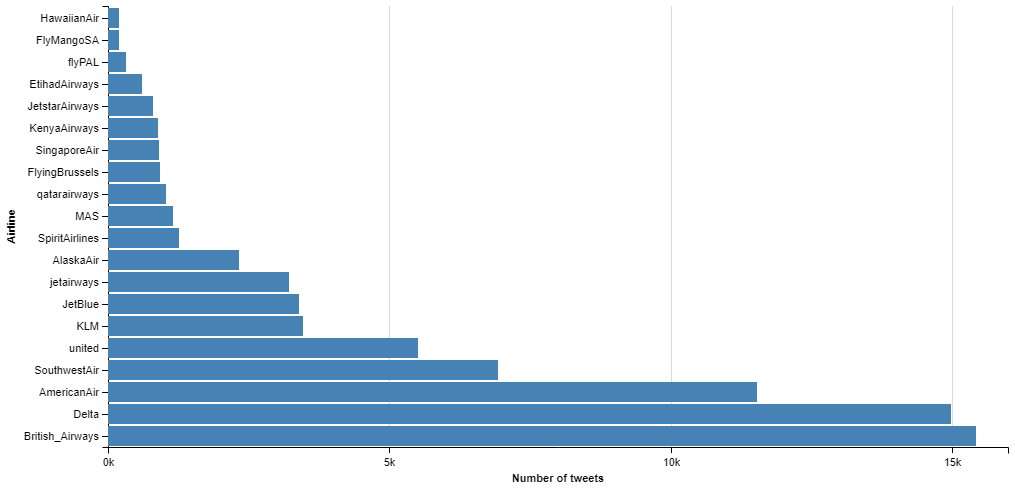

# Insights:

### 1- There is a negative relationship between text length and sentiment score.
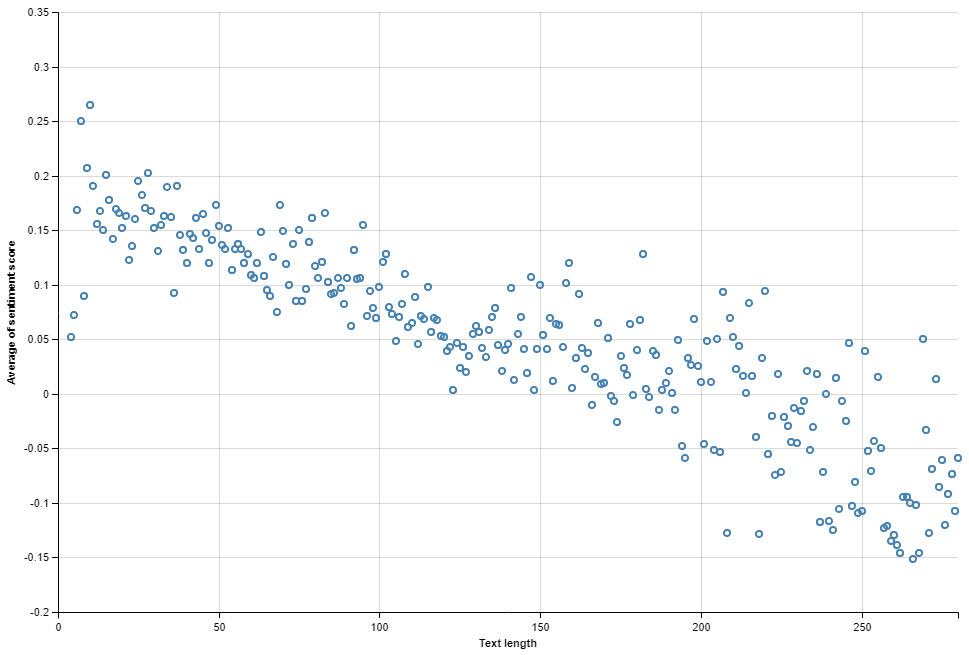

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()
tweets_df['sentiment_score'] = tweets_df.text.apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

### 2- Customer service is the most issue that the customer face.
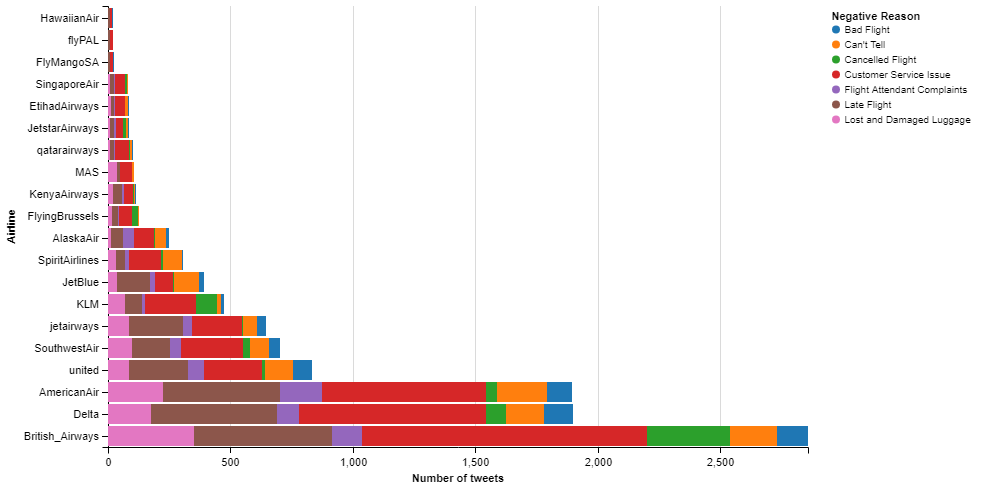

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import classification_report
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import re
%matplotlib inline

stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

In [100]:
reason_df = pd.read_csv('Tweets_reason.csv')
reason_df=reason_df[reason_df.airline_sentiment == 'negative'].reset_index(drop=True)
reason_df=reason_df[(reason_df.negativereason_confidence == 1) & (reason_df.airline_sentiment_confidence==1)].reset_index(drop=True)

In [101]:
reason_df.negativereason.value_counts()

Customer Service Issue         1317
Late Flight                     738
Cancelled Flight                406
Lost Luggage                    387
Can't Tell                      222
Flight Attendant Complaints     120
Bad Flight                      117
Flight Booking Problems          77
Damaged Luggage                  27
longlines                        25
Name: negativereason, dtype: int64

![image](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAnIAAAH+CAYAAAAYtOOrAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xl4XGXdxvHvb/ZsTZuulAJDKVuBUgoUsLRlky2goCgK%0AuL2ACAiiCERcCIoaNhFFBAEV2UQUFRxWWVqgpZSlZUegDZSt+5ZtMsvz/nGmJS1tkyaTnJnJ/bmu%0AXEnOzDlzT2jpnec85znmnENEREREik/A7wAiIiIi0j0qciIiIiJFSkVOREREpEipyImIiIgUKRU5%0AERERkSKlIiciIiJSpFTkRERERIqUipyIiIhIkVKRExERESlSKnIiIiIiRUpFTkRERKRIqciJiIiI%0AFCkVOREREZEipSInIiIiUqRU5ERERESKlIqciIiISJFSkRMREREpUipyIiIiIkVKRU5ERESkSKnI%0AiYiIiBQpFTkRERGRIqUiJyIiIlKkVOREREREipSKnIiIiEiRUpETERERKVIqciIiIiJFSkVORERE%0ApEipyImIiIgUKRU5ERERkSKlIiciIiJSpFTkRERERIqUipyIiIhIkVKRExERESlSKnIiIiIiRUpF%0ATkRERKRIqciJiIiIFCkVOREREZEipSInIiIiUqRU5ERERESKlIqciIiISJFSkRMREREpUipyIiIi%0AIkVKRU5ERESkSKnIiYiIiBQpFTkRERGRIqUiJyIiIlKkVOREREREipSKnIiIiEiRUpETESlgZjbC%0AzP5qZm+b2XNmdp+Z7dCN4xxjZmN7I+NmZNjXzGaZ2Rwze83M6vN03L3M7Dd5OM6fzey4fGQS6Ssh%0AvwOIiMiGmZkB/wRuds59Kbdtd2A48L/NPNwxwH+AV/MachPMLOicy3TYdDPwRefcXDMLAjtuxrFC%0Azrn0hh5zzj0LPNuztCLFSSNyIiKF60Ag5Zy7bs0G59xc59wTZnaAmf1nzXYzu8bMvp77usHMXjWz%0AF83sCjP7FPAZ4PLcaNh2ZjbezJ7OPeefZjYot+/jZnaVmT2bGzXb28zuNrM3zeySDq93kpk9kzve%0A9blihpk1mdmVZjYX2G+99zMM+DD3PjLOuVdz+1SY2R9zx3vBzD6b2/51M7vHzB4FHsmNTNZ2yPBn%0AMzuu48/CzCrN7E9m9lLuvX0+t/1QM5tpZs+b2V1mVrmpH/z6P8Pcti+Y2ctmNtfMpnfIeE2H/f5j%0AZgd05zVFukNFTkSkcO0KPLc5O5jZYOBYYBfn3DjgEufcDOAe4Dzn3Hjn3NvAX4ALcs95Cbiow2Ha%0AnXN7AdcB/wbOzGX5upkNNrOdgeOBSc658UAGODG3bwUwyzm3u3PuyfXiXQW8kSuOp5lZLLf9h8Cj%0AzrmJeOX1cjOryD02ATjOOTcVuBP4Yu59RoCDgcR6r/FjYKVzbrfce3vUzIYAPwIOcc5NwBu9+97m%0A/AxzD/0EOMw5tzteMd6ozX1Nke7SqVURkdKyEmgDbsqNUv1n/SeYWTUw0Dk3LbfpZuCuDk+5J/f5%0AJeAV59yHuf3mAVsB+wN7ArO9s7+UAYty+2SAf2womHPup2Z2G3AocALwZeCA3PefMbPv554aA7bO%0Aff2wc25Z7uv7gavNLAocDkx3zrXmMqxxCPClDq+53MyOAsYCT+WeGwFmbihjzsZ+hk8BfzazvwF3%0Ab2J/gH038zVFukVFTkSkcL0CbGzyfZp1z6rEAJxzaTObiDdadRzwbeCgzXzdZO5ztsPXa74PAYY3%0Ab+8HG9i3bb15cevIjQb+3sxuABbnRr8M+Lxz7o2OzzWzfYDmDvu2mdnjwGF4I4J/7eL7MbxC+OWu%0APHljP0Pn3LdymWqB58xsTzby32FzX1Oku3RqVUSkcD0KRM3sm2s2mNk4M5sMvAOMNbOomQ3EKx3k%0A5mFVO+fuA74L7J7bdTVQBeCcWwkszx0H4CvAmtG5rngEOM7MhuVes8bMtulsJzOrtY+Hz7bHG71b%0AATwInLXmMTPbYxOHuRP4BjAZeGADjz+Mdyp4zWsOAp4GJpnZmNy2CtvElb8b+xma2XbOuVnOuZ8A%0Ai/FGJxuB8WYWMLOtgIm5w2zWa4p0l0bkREQKlHPOmdmxwK/N7AK8032NwDnOuQW5U3wvA/OBF3K7%0AVQH/zs0/Mz6el/VX4AYzOxtvlOlrwHVmVg7MwytHXc31qpn9CHjIzAJACq88vdPJrl8BrjKzFryR%0ArBOdcxkz+xnwa+DF3PHmA0dt5BgPAbcA/3bOtW/g8UuA35nZy3hF8WLn3N3mXQhyR+60LHjz1zZ2%0A5e/GfoaXm9n2uW2PAHNz2+fjXQ38GvA8gHNu8Wa+pki3mHPO7wwiIiIi0g06tSoiIiJSpHRqVUTW%0AEa9LVABD8db8GrqJj4FAMPcRyH1s7Ov1v8/iXRm4HG+O1JrPKzaw7ROPNTbUbnQyvYhIf6JTqyL9%0ASLwuEcNbTX8nYGdgWz5Z2Mp8C9g1aby5WG93+Hgr93leY0Nti4/ZRET6lIqcSAmK1yWG4ZW1NR87%0A5z5vTWlPqXDAR3xc7NYpeo0Ntcs2sa+ISNFRkRMpYvG6xAhgLz4uams+avzMVcAWAbOBWbmPZxob%0Aalf4G0lEpPtU5ESKRLwuEQH2wFsxfl+8+1h2unaXbJID3gSe4eNyN7exoXZDy1qIiBQcFTmRAhWv%0AS1TjLXo6FZiEV+Jim9xJ8iEJzCE3YgfMamyofcvfSCIiG6YiJ1Ig4nWJGj4ublOB8ZT2fLZisgx4%0AHO8G7fc1NtR+5G8cERGPipyIj+J1iQnAMcDReLcBsk3vIQXA4d1FIQHchzfPLutvJBHpr1TkRPpQ%0AvC4RBKbglbdj8K4ileK2GO+enwngQV08ISJ9SUVOpJfF6xLlwGF4xa0WGOxvIulFGWAGH5+Cfcnn%0APCJS4lTkRHpBvC4xGO906THAoRT+IrvSO94F/gPc3thQ+5TfYUSk9KjIieRJbk2344Fjgf3xbkkl%0AssZ84Dbg1saG2jf8DiMipUFFTqQH4nWJAHA4cCpwFLp/sXTNs8CtwB2NDbWL/A4jIsVLRU6kG+J1%0AiVHAycD/oQsWpPvSePPpbsKbU5fxOY+IFBkVOZEuyl1xehTe6Nvh6NSp5NcHwM3AH7UAsYh0lYqc%0ASCfidYk4cArwDWCkv2mkH3DAdOBG4G+6XZiIbIqKnMgGxOsSYeAzwDeBQ9AdFsQf7wNXA9c3NtSu%0A8juMiBQeFTmRDnL3Nz0bOBMY7nMckTVWAtcDv25sqP3Q7zAiUjhU5ESAeF1iCPBdvAJX7XMckY1J%0A4l3termWMBERUJGTfi639tt5wGlAhc9xRLrKAfcAlzY21M70O4yI+EdFTvqleF1ia+ACvOVDYj7H%0AEemJp4DLgHsbG2r1P3SRfkZFTvqVeF1iDPAD4CtA2Oc4Ivn0KnAFcJuudBXpP1TkpF+I1yXGAj/E%0Au4WW1n+TUvYu3p/12zRCJ1L6VOSkpMXrErsDP8G7/6n5HEekLz0HnNvYUDvN7yAi0ntU5KQkxesS%0Aw4Bf4C3iqzXgpD+7Fzi/saH2db+DiEj+qchJSckt5Psd4MfAAJ/jiBSKNHADcFFjQ+1iv8OISP6o%0AyEnJiNclaoFfATv4nUWkQK0CLgWuamyobfU7jIj0nIqcFL14XWJH4CrgCL+ziBSJBcCPgFt0QYRI%0AcVORk6KVu53WRcC30VIiIt3xPPD9xobax/wOIiLdoyInRSdelwgApwCXAEN9jiNSCu4BzmxsqH3P%0A7yAisnlU5KSoxOsSk4GrgT38ziJSYlYB5zU21P7B7yAi0nUqclIU4nWJGuA3wIl+ZxEpcY8ApzY2%0A1M73O4iIdE5FTgpevC5xBHATsIXfWUT6iWa8W9ldo4shRAqbipwUrHhdohJvOZFT/c4i0k89Cfxf%0AY0Ptm34HEZENU5GTghSvS0wB/gxs63MUkf6uDe/q8CsbG2ozfocRkXWpyElBidclYsDPgXPQrbVE%0ACslsvNG5l/0OIiIfU5GTghGvS+wF/AXY2e8sIrJB7Xi/aP2ysaE25XcYEVGRkwKQuz/qj4ALgZDP%0AcUSkc3OBExsbal/xO4hIf6ciJ76K1yV2wRuFm+B3FhHZLC3AaY0Ntbf6HUSkP1ORE1/E6xIGfA/v%0ANE3U5zgi0n3XA99pbKhN+h1EpD9SkZM+F69LVAE3A8f6nUVE8uI54LjGhtpGv4OI9DcqctKn4nWJ%0AHYB/oQsaRErNcuArjQ21Cb+DiPQnKnLSZ+J1iaOBW4Bqv7OISK9wwC+Bn2jNOZG+oSInvS43H+7H%0AQD1g/qYRkT7wKPDlxobaRX4HESl1KnLSq+J1iQF4V6V+1u8sItKnPgCOb2yofdLvICKlTCvnS6+J%0A1yV2AmahEifSH40EHovXJc71O4hIKdOInPSKeF3iM3jz4Qb4nUVEfHc38NXGhtpmv4OIlBoVOcmr%0A3Hy4erw5cZoPJyJrzAZqGxtqF/sdRKSUqMhJ3uTmw90KHO13FhEpSG8BhzU21M7zO4hIqVCRk7yI%0A1yVGAg8Cu/qdRUQK2iLgyMaG2uf8DiJSCnSxg/RYvC6xHfAkKnEi0rlhwOPxusRhfgcRKQUqctIj%0A8brEbnglblu/s4hI0agE7o3XJb7qdxCRYqciJ90Wr0vsB0wDRvidRUSKThi4OV6X+IHfQUSKmebI%0ASbfE6xKHAv8Eyv3OIiJF73fA2Y0NtVm/g4gUGxU52WzxusQX8K5OjfidRURKxj+AExsbapN+BxEp%0AJjq1KpslXpc4FfgrKnEikl+fBx6K1yUG+h1EpJioyEmXxesSFwB/QH9uRKR3TAGejNclNO9WpIt0%0AalW6JF6XuBQ43+8cItIvvAIc0NhQu8TvICKFTkVONilelwgA1wGn+p1FRPqVF4CDGhtqV/gdRKSQ%0AqcjJRuVK3F+AE/3OIiL90izg040Ntav9DiJSqDTXSTblOlTiRMQ/+wD/idcltMyRyEaoyMkGxesS%0AV6LTqSLivynAv+J1iajfQUQKkYqcfEK8LlEPfM/vHCIiOZ8G/h6vS4T9DiJSaDRHTtYRr0ucC1zh%0Adw4RkQ34O/ClxobajN9BRAqFRuRkrS/+4IqvoBInIoXrOODPuQuxRAQVOVmjvvrYOyM/u/7UYGKG%0A31FERDbhJOC6eF3C/A4iUghU5ATqqycDt5tRdmHotv2uCF/3uN+RREQ24VTg136HECkEmiPX39VX%0A7wo8Aaxzf8Pns2OmH9dePylLIOhPMBGRTtU3NtRe7HcIET+pyPVn9dVbATOAURt6+ANX88whySt2%0AaSFW0bfBRES6xAHHNzbU3uV3EBG/qMj1V/XVg4AngbGbelqTi716UPLKoYsYNLRvgomIbJYWYHJj%0AQ+3zfgcR8YPmyPVH9dUx4F46KXEAldY29qno2W072rvzez+YiMhmKwf+Ha9LjPA7iIgfVOT6p+uB%0ASV19ctgyW90fqRs4JTD3xV7MJCLSXaOAf+ruD9Ifqcj1N/XVpwNf3dzdAsagm8OX7vC14AMzeyGV%0AiEhP7Qvc4HcIkb6mOXL9SX31PsB0INLdQziHuyNz0PQL06dMzV8wEZG8uaCxofYyv0OI9BUVuf6i%0AvnoI8DywVT4ONyu707Qvtf9osiOgUV0RKSRZ4LONDbX/8TuISF9QkesP6qsDwIPAIfk87LvZoU8f%0A2n7Z7m1Ey/J5XBGRHloN7NfYUPuK30FEeptGU/qHn5HnEgewdWDxvs9Ez3i7hpVL831sEZEeqALu%0AidclBvsdRKS3aUSu1NVXfwb4F9Br9yVsd8F3jmhv4G235Ta99RoiIt3wOHBoY0Ntyu8gIr1FI3Kl%0ArL56DPAXerHEAUQss83DkfMrJgVefrk3X0dEZDMdAPzG7xAivUkjcqWqvrocmAmM66uXdI7WC9Mn%0Av3hH5uB9+uo1RUS64MuNDbV/9TuESG/QiFzpuo4+LHEAZpT9InTT3j8J/WVaX76uiEgnrovXJbb1%0AO4RIb9CIXCnyFv291s8IT2Z2nXZS6gdTwHr1tK6ISBc9jXdP1rTfQUTySUWu1ORh0d98mZ8dPvOw%0A9ssmtBPWbXOkV7l0Ox/dfgEunYJslvIdJzFw8om0L5zH0gd/h8u0Y4EgNZ8+nejIHbu0L8CK6bfQ%0A8tYsMCNYPpDBR55DqGowbe+9yrKHrsWCIYYcfR7hmi3JtjWx+N+XMuyLF2Omkx0F6heNDbU/9DuE%0ASD6pyJWSPC/6mw8rXMWLByR/tdUKqgb5nUVKl3MOl2ojECnDZdJ8dNv51Bz8TVY8eRsD9vosZdvt%0ARevbs1k56x+MOKGhS/tGt9yJbLKFQLQcgFXP3kNq6bsMPuzbLPrnz6k5+DTSqxbS8r+Z1Bx0Cssf%0AvYmyMXsT27pPZzTI5skChzQ21D7mdxCRfNGvjaXljxRQiQMYaM3jZkXPXBG3Dxf4nUVKl5kRiHjr%0AUrtsGrKZtWf1s+0t3udkC8HKTy4rtql915Q4AJdqY80F4BYI4dJJXCqJBUKkln9IevUSlbjCFwBu%0A0fpyUko0Ilcq6qtPAG7zO8bGZJwt/nL7jxY/43Ye63cWKU0um+HDm88hvfxDqibUMuiAb5BasoCF%0Af/sJ4MBlGXHSFYSqh3Vp3zWWT/8LzS8/SiBazvAv/5JgefXaU7YWjjCk9lyWP3YTAyefRLhmyz58%0Ax9IDf29sqP2C3yFE8kFFrhR4p1RfA4b4HWVTnKP5vPRpr/w9M3Wi31mkdGXbmrxTn4ecRtPcB4lu%0AtSsVO06i+bUnaJr7AMO/9PMu7RsZGl/nsZUz/4ZLp9bOn1ujbcHLtPxvJlV7HMmKJ27FAkEGHXQy%0AwQrNJihwJzU21BbsL78iXaVTq6XhNxR4iQMwo+Ly0PV71oVun+53FildgVglsa3H0TrveZpeeoTy%0AHT4FQPlO+5P88H9d3nd9FbscQMv/nlpnm3OOlTPupPpTX2LFU7cz6IBvULn7Yax67t78vSHpLdfE%0A6xIaQpWipyJX7OqrjwK+7HeMrjIj+K3Qf6b8MXzZNNBwsORHpmUl2bYmALKpJG2NLxAePIpgZQ3J%0ABS8B0PbOXMKDRnZ5X4DUsvfXPq/lzVmEa0ats2/zy49SNnovgmVVuFTSm1tn5n0thW4g8Kd4XUJL%0AJElRC/kdQHqgvnoA8Hu/Y3THQcE5Ux+28546sr1h7xQh35dKkeKWaVrGksRV4LLgspTvNJnyMRMJ%0AxCpY/t8/4LIZLBSh5vCzAEivXsrSB37D8C9cvNF9AVZMu5nUsvfAAoQGDKXmsDPXvmY21UbTy/9l%0A+Bd/BsCAvY9h0V31a5ckkaLwacD3dTdFekJz5IpZffV1wGl+x+iJZa5qzgHJK7ddRWW131lEpF9q%0AAXZvbKh9y+8gIt2hU6vFqr76AOCbfsfoqRpbPf6Z6JlLtrJF73f+bBGRvCsH/uB3CJHuUpErRvXV%0AZcANrFnUqsjFLLXd45HvhibY/173O4uI9EsHxusSx/sdQqQ7VOSK00+BMX6HyKegueH/iNSP+mzg%0AqWf9ziIi/dKV8bpEhd8hRDaXilyxqa/eC/iu3zF6gxmVvw7/bvx3Q3c94XcWEel3tgR+7HcIkc2l%0Aix2KSX11GHgWKPn7AN2f2Xva6anvTvU7h4j0Kylgt8aG2jf8DiLSVRqRKy519IMSB3BEcPbUByIX%0APBkinfI7i4j0G2Hgt36HENkcGpErFvXVY4EXgH615toSN+D5A5K/GtNE+QC/s4hIv/H5xobau/0O%0AIdIVGpErHr+ln5U4gCG2asLs6BkfjWTJh35nEZF+46p4XaLc7xAiXaEiVwzqqw8FDvI7hl/KrH2H%0A6dFzGGdvv+l3FhHpF7YGLvQ7hEhX6NRqoauvNuA5YA+/o/jNOVadmfrOW/dl95ngdxYRKXlJYFfd%0A8UEKnUbkCt/xqMQBYMaA34Wv3u3M4L+e9DuLiJS8KHC13yFEOqMRuULmLTfyKiW2+G8+/Duz37Tv%0ApM7S8iQi0ts+29hQe4/fIUQ2RiNyhe0UVOI26LPBmVPvifzwiSCZtN9ZRKSk/Tpel4j6HUJkY1Tk%0AClV9dQXwE79jFLJxgfmTZ0TPmlNBa5PfWUSkZG0LfNPvECIboyJXuM4BRvgdotANtxV7zY6e8d4I%0Ali30O4uIlKwLNConhUpFrhDVV9cA5/kdo1iUW3KnJ6Nnp8Za49t+ZxGRkrQl3lQXkYKjIleYLgSq%0A/Q5RTEKWHZWIXDjk04Fn5/idRURKUp1G5aQQqcgVmvrqrYBv+x2jGJlR/Yfwr8aeGkzM8DuLiJSc%0AUcDJfocQWZ+KXOG5GG/9IukGMyIXhm7b7/LQddP8ziIiJacuXpfod7dKlMKmIldI6qvHAl/1O0ax%0AM8O+EJo+9R+Ri6YHyGb8ziMiJWMrNConBUZFrrD8HAj6HaJU7Bl4c8oT0e88V0ayxe8sIlIyfqBR%0AOSkkKnKFor56H+AYv2OUmi1t6cTZ0dMbh7Bisd9ZRKQkbAV8w+8QImuoyBWO7/sdoFRVWtvYmdGz%0A2na0d+f7nUVESsKF8bpE2O8QIqAiVxi8K1U1GteLwpbZ6v5I3cApgbkv+p1FRIre1mhUTgqEilxh%0AOAMI+R2i1AWMQTeHL93hq8EHZ/qdRUSKnkblpCCoyPmtvjoGnOp3jP7CjNjFoZv3vSR0k5YnEZGe%0A2Ab4ut8hRFTk/HciMNjvEP2JGXZS6JGpf438bJqRzfqdR0SK1rl+BxBRkfPfWX4H6K/2Dbw2dVrk%0Au8/ESLb6nUVEitKO8brEAX6HkP5NRc5P9dVTgN39jtGfbR1YvO8z0TPfqmHlUr+ziEhR+pbfAaR/%0AU5Hz19l+BxAYYC27PR39dtN29v47fmcRkaJzbLwuMczvENJ/qcj5RUuOFJSIZbZ5OHJ+xaTAyy/7%0AnUVEikoE+D+/Q0j/pSLnnzPR7bgKSsDckFvDv9juy8FHZvmdRUSKyqnxuoT5HUL6JxU5P9RXlwGn%0A+B1DPsmMsl+Ebtr7x6FbtDyJiHTVaOBQv0NI/6Qi5w8tOVLAzAicHLp/6i3hX0wD5/zOIyJFQRc9%0AiC9U5PyhJUeKwOTgy1MfjZz7dIRU0u8sIlLwjorXJUb6HUL6HxW5vlZffQAwzu8Y0jWjAx/t90z0%0AjDcGsnq531lEpKCF0JQZ8YGKXN/TaFyRGWjN42ZFz1wetw8X+J1FRAraKfG6hC5ikz6lIteX6qsH%0AAkf7HUM2X9TSox+JfD820V571e8sIlKwtgJq/Q4h/YuKXN/6LBD2O4R0T9Dc0DsjP9vm84Hps/3O%0AIiIF6zS/A0j/oiLXt77gdwDpGTMqrghfN+GC0B3T/c4iIgXp8HhdYmu/Q0j/oSLXV+qrq4FP+x1D%0Aes6M4Omhe6fcFL78cS1PIiLrCaBf2qUPqcj1nc/g3cpFSsTBwRcOeDhy3oww6Xa/s4hIQTnW7wDS%0Af6jI9R39hlaCtg98MGlW9MxXB9C00u8sIlIw9ovXJUb4HUL6BxW5vlBfPQDdvqVk1djq8c9Ez1y8%0AlS163+8sIlIQAngXt4n0OhW5vnE0EPU7hPSemKXGPB75bmgPe/MNv7OISEH4nN8BpH9QkesbOq3a%0ADwTNDb87ctHIowMznvU7i4j47sB4XWKg3yGk9KnI9bb66irgML9jSN8wo+o34WvGnxP6+xN+ZxER%0AX4WBo/wOIaVPRa73HQ3E/A4hfceM0Dmhuyf/PnzVNL+ziIivdHpVep2KXO87zu8A4o8jgrOn3h+p%0AezJEOuV3FhHxxWHxukSZ3yGktKnI9ab66krgCL9jiH92Dry7/8zoWS9W0rLK7ywi0ufKgcP9DiGl%0ATUWudx2FTqv2e0Nt5Z6zo2d8NJIlH/qdRUT6nBYHll6lIte7dFpVACiz9h2mR89hnL39pt9ZRKRP%0AHRWvS4T9DiGlS0Wut9RXx9BpVekgZNkt/h358bDDA7Oe9zuLiPSZQcABfoeQ0qUi13sm4s2PEFnL%0AjOrfh6/e7czgv570O4uI9BmdXpVeoyLXeyb7HUAKkxnh88J/2//q8G+1PIlI/3Cg3wGkdKnI9Z79%0A/Q4ghe2zwZlT74n88IkgmbTfWUSkV+0Ur0sM8TuElCYVud5QXx0APuV3DCl84wLzJz8VPXtOBa1N%0AfmcRkV6lX+6lV6jI9Y7dgQF+h5DiMMKW7zU7esZ7I1i20O8sItJrNN1GeoWKXO/QX1jZLOWW3OnJ%0A6Nmpsdb4tt9ZRKRXaEROeoWKXO9QkZPNFrLsqETkwiEHB56b43cWEcm7CfG6hFYykLxTkesdKnLS%0ALWZU3xi+cuypwcQMv7OISF6FgH39DiGlR0Uu3+qrtweG+x1DipcZkQtDt+13eeg6LU8iUlp0elXy%0ATkUu/zQaJz1mhn0hNH3qPyIXTQ+QzfidR0TyQv8+SN6pyOWf/qJK3uwZeHPKE9HvPFdGssXvLCLS%0AY/vG6xJBv0NIaVGRyz8VOcmrLW3pxNnR0xuHsGKx31lEpEcqgT38DiGlRUUun+qrRwDb+R1DSk+l%0AtY2dGT2rdQdbMN/vLCLSI5onJ3mlIpdfGo2TXhO2zNYPROqqpwTmvuh3FhHpNv07IXmlIpdf+gsq%0AvSpgrubm8KU7fDX44Ey/s4hIt2hETvJKRS6/JvkdQEqfGbGLQzfve0noJi1PIlJ8hsXrEqP8DiGl%0AIy9FzswmmdnDZvY/M5tnZvPNbF4+jl006qsN2MnvGNI/mGEnhR6Zekf4Z9OMbNbvPCKyWfRvheRN%0AvkbkbgJ+hTdkvDewV+5zfzIK0O1XpE/tF3xt6rTI956JkWz1O4uIdJmKnORNvorcSufc/c65Rc65%0ApWs+8nTsYrGD3wGkf9o6sGjfZ6JnvlXDyv72d06kWKnISd7kq8g9ZmaXm9l+ZjZhzUeejl0stvc7%0AgPRfA6xlt6ejZ60ebR+843cWEemUipzkTShPx9kn93mvDtsccFCejl8MNCInvopYOv7fyHlLTkr9%0A4JUZ2V138TuPiGyUipzkjTnn/M5QGuqr/wPU+h1DxDlaL0yf/OIdmYP36fzZIuKTqsaG2ia/Q0jx%0Ay9dVq9Vm9iszezb3caWZVefj2EVEI3JSEMwo+0Xopr1/HLpFy5OIFC6Nykle5GuO3B+B1cAXcx+r%0AgD/l6dheiLaFAAAgAElEQVSFr746BGzrdwyRNcwInBy6f+pfwr+cBhp2FylAKnKSF/kqcts55y5y%0Azs3LfVwMjM7TsYvBaPI331Akb6YEX5r6aOTcpyOkkn5nEZF1qMhJXuSryLWa2drbjpjZJKA/rWul%0A06pSsEYHPtrvmegZbwxk9XK/s4jIWipykhf5KnKnA78zs0Yzewe4BvhWno5dDFTkpKANtOZxs6Jn%0ALt/GPnrP7ywiAqjISZ7kpcg55+Y453YHxgG7Oef2cM7Nzcexi4SKnBS8qKVHPxo5N7q3vf6a31lE%0AhDHxukTQ7xBS/PJ11ep3zGwA3gUPvzKz583s0Hwcu0ioyElRCJob+rfIT7f+fGD6bL+ziPRzUXSR%0AnORBvk6t/p9zbhVwKDAY+ArQkKdjFwMVOSkaZlRcEb5uwgWhO6b7nUWkn9O/HdJj+Spylvt8JPAX%0A59wrHbaVtvrqCmCk3zFENocZwdND9065MXz541qeRMQ3w/wOIMUvX0XuOTN7CK/IPWhmVUA2T8cu%0AdGPoL6VVSs4hwRcOeChy/oww6Xa/s4j0Q0P8DiDFL19F7mSgDtjbOdcCRIBv5OnYhW6U3wFEemKH%0AwPuTno6e+UoVzSv9ziLSz6jISY/l66rVLDAf2MHMpgC7AAPzcewiMNjvACI9NdhW7zE7esbiUbb4%0AA7+ziPQjKnLSY/m6avUUYDrwIHBx7nN9Po5dBFTkpCTELDVmWuScwB725ht+ZxHpJ1TkpMc6LXJm%0A1tSF43wH2BtYCvwQ2ANY0ZUAZnaAma00szm5j//mtteb2fdzX//UzA7p5Dhrn7/e9oFmdkZXsnST%0AipyUjKC5EXdHLhp5dGDGs35nEekHVOSkx/I1R67NOdcGVAKTnXOvAztuxv5POOfG5z4+Udiccz9x%0Azv23m9kGAr1Z5PQXUUqKGVW/CV8z/pzQ35/wO4tIidO/H9Jj3SpyZna0mc0ysxdyI2iLzWwcXpH7%0AqZmtBFaZ2VAz+4eZzc59TOrm6/3ZzI7LfX2kmb1uZs+Z2W/M7D8dnjrWzB43s3lmdnZuWwOwXW60%0A7/LuvH4nNCInJceM0DmhuydfG/71435nESlhKnLSY90dkXsS2Nc5twfwV+A159yLwBXATXgLAk8F%0Argaucs7tDXweuHEjx5vc4dTqDzf2omYWA64HjnDO7QkMXe8pOwGHAROBi8wsjHc17du50b7zuvl+%0AN0VFTkrWkcFnDrg/UvdkiHTK7ywiJWhQvC6RrzNj0k+FurnfKOBOM9sCb6mR+Wa2PzAer+TNBLYE%0ADsEbJVuz3wAzq3TOrT/v7gnn3FFdeN2dgHnOufm57+8Avtnh8YRzLgkkzWwRMLwb721zqchJSds5%0A8O7+M6NnPXdg8srtmygf4HcekRISAGqAJX4HkeLV3d8Efgtc45zbDTgNbz7cBcDk3ONh4Nbc8fft%0AMP9tyw2UuHxKdvg6Q/eL6uboL8usrGPByiwH3tzM2N81scu1TVz9tPejv+uVFLtc20Tg4lU8+0Fm%0Ak8fIZB17XN/EUbe3rN0256MM+97YzPjrmtjrD0088753jKfeTTPu9962N5d621a0OQ69pZmsbkzQ%0A64bayj2fiZ7x4UiWfOh3FpESo8EA6ZHuFrlq4P3c11/DO8X5GaANqHLOfQBUAQ8BZ63ZyczGdz8q%0AAG8Ao80snvv++C7sszqXpbf05rELVigAVx4a49UzK3n65Ap+NzvFq4sz7DoswN1fLGPKNsFOj3H1%0ArHZ2HrLuH8HzH27joqkR5nyrkp8eGOX8h9sAuHJmO/edWM6vD49x3bPeWb5Lpie5cHKUgOnGGn2h%0A3Np3nB49h3H29pt+ZxEpIZonJz3SlSJXbmbvdfj4Ht4acXeZ2XN4Q8JZ55zDW3LkWDN7ESgHzgb2%0AMrMXzexV4Fs9Ceuca8W7AvWB3GuvBja5Gr1zbinwlJm93EsXO1T2wjEL3hZVASZs4ZW1qqix89AA%0A769y7Dw0yI5DOi9x763KkngzzSkTIutsN4NVuXHVlW0wssoraeEgtKQcLSnv67eXZVmwKssB8b4Y%0AdJU1Qpbd4t+RHw87PDDreb+ziJQIFTnpkU7/FXTObazs/XvNF2a20MyuB8qAXwL/B9zgnFtCJ6Nm%0AzrnHgcc3sL2+w9df7/DQY865ncybePc74Nn1n5/7ftcOX5+wqQzdVl8dxjuN3K81rsjywocZ9hnV%0AeYFb45wH2rjskBir29c9Lfrrw2IcdmsL33+4jayDGf9XAcAP9o/y1X+2URaGW44t4/sPtXHJgdG8%0Avg/pGjOqfx++erfL08c/dW3ms926El1E1lKRkx7J1y26rgD+DvwDb77cT5xzv83HsTfgVDObA7yC%0Ad4r3+l56na7ol6NxHTW1Oz7/txZ+fXiMAdGuneL8z/9SDKsw9hz5yeL3+2dTXHVYjAXfreKqw2Kc%0AfE8rAONHBHn6lAoe+1oF85Zn2aIygAOO/3sLJ93dysKmbD7flnTCjPD54Tsn/Tp8zTS/s4gUuWq/%0AA0hx6/F5KTMLAv91zh0IPNzzSJvmnLsKuKq3X6eL+nWRS2W8EnfibmE+t3PXByafejfDPW+kue/N%0A1bSlYVXScdLdrdz6uTJuntvO1Yd70w6/MDbEKbkit4ZzjkumJ/nrceWcdX8rlx0So3FFlt/Maufn%0AB8fy+v6kc8cEZ0zd1j564nPtF++XIajz3CKbT39vpEd6PCLnnMsAWTPrj79VVPgdwC/OOU6+p42d%0AhwT53n6bd4rzl4fEeO97VTSeU8VfjyvjoG1D3Pq5MgBGVgWY9o53Veqj8zNsP3jdP6J/mZviyO1D%0A1JQZLSkImPfRolXOfLN7YN7kp6Jnz6mgtTevSBcpVV2fkyKyAfn6TaAJeMnMHgaa12x0zp298V1K%0AQr8dkXtqQYZbXkyx27AA46/z/v3+xcFRkmk46/42Frc4am9vYfyIAA+eVMEHq7Occk8b951Yvsnj%0A3nB0jO880EY6C7EQ/OGosrWPtaQcf56b4qGTvGN8b98IR97eQiQIt3+ubGOHlD4wwpbv9Uz0jNcO%0ASl45eCE1w/zOI1JENCInPWIuD2twmdnXNrTdOXdzjw9eyOqrJwPT/Y4hUijSLvDe0e0/T77mttnO%0A7ywiReLixobaer9DSPHKy28CzrmbzawM2No590Y+jlkk0n4HECkkIcuOui/yg5WnpM6d80h2z56u%0AGynSH+jUqvRIXoqcmR2Nd5/VCLBtbuHfnzrnPpOP4xewZOdPEelfzKi+MXzl2EvSJ824KXPkp/zO%0AI13TOu85lj3yB8hmqdz9UKr3/cI6j6+c9Q+aX33c+yabIbX0PUaddRuBcJSPbr8Al05BNkv5jpMY%0AOPlEAJY//ida5z1HZNi2DDnqXACaXnmMbMsqBuz92b58e4VMRU56JF/n5uvxblT/OIBzbo6Zjc7T%0AsQtZu98BRAqRGZEfhW7dL5pZfe/j4UMHri5LBbNR59LhsLVSRpvFrM1ilrWQbstRAFwmw5Lrrxk/%0A5MzLXgsNGdm+6Jcn7xreZ7+3IlvvuPay8YqtvkoFXwWgZfZ/BzY9/o8t3A4jXks7x+Dv/SoQKKvM%0AunTKFl122tjQhD3fiWw1prVt0WvbD7voT68vu6l+dEvm3Q9DW8TbVt15305Dz7n69XQorHvrAZbO%0ArvY7gxS3fBW5lHNupa17q6T+sLCXRuRENiAFqe8NHzJjwgPPlx9fM7FpRLW5VEVVxYeRjzJNZYvK%0ALLKqIlbW1GqxZFsmaqlMhGx7JEgqFAq0B0PhVDAcbrUya6Ei3UxFtoUKWqhwLZQH2ohZklgwSTTU%0ATiScJhxJE4pmCMQcgTKHleNN9ZAuan9lLqExY7CDx4/PALHPHEPrspfHBQ7fZ4PPb737OWKf/wLp%0AsQNzTxhEFnBtrVAexe08bJf0NkNwA8pI7Vy9jxtURnbXEUNXTbuX8v87lcy4oRP77M0Vvl5Zi9HM%0Ampxzeb0gz8y+DuzlnPu2mX0LaHHO/SWfryGbL19F7hUzOwEImtn2eLfmmpGnYxcyFTmR9bwaCb/1%0A9S2Gp1sDgaknvpd+YXXTS8nXtzt4uC3618o9Bk9ZuXXFPtunLBNZEFjy5rzgIj4KrBiSJLUjxtry%0AFQSqg+2rhkVblsVii1fFYqubY2VNqVisKRuNtITCkbZwKNReFQhkqsENMVv3DitZZ9kkseZWylq9%0Aj/K2ZiraW6hob6Yi3UxluoXyTDOVroVy10K5tVFubcQCXkGMhlKEo2lCkTTBWJZgzGFlQAXe2pkl%0AJbtkEYFhw9d+HxgynNRrL2/wua6tleTsGVSdXffxtkyGZd86gcz7Cyg75njCO+8GQHSf/Vn2zS8R%0AmTARq6gk9drLVH7lm737ZopPUY5MOueu8zuDePJV5M4CfohXbG4HHgQuydOxC5mKnEhOFrKXDB70%0AxF1VlftiFjXnsgNa2L66ZXrlvG2Pfik14Gs7zFp6+wuzlzxQsdugKc9sP2DCdttlR+zp7ZtNfRRY%0A8cq8wKIl7wWWxpqsbbtMJjKkpSUyoKVlYCev7Fw4nFwWjTYvi8WaVsdiq1tiZU3pWLSJaLQlVBle%0AWhYMflQVCGS2AAab0aPTue0u3NZGWUsrZS2tlCdbKE+2UJHMFcTUmoLojSSWWyvltFEWbCMa8Api%0AJJIiFMkQimZyBdFhFZgVxT3nkjOnE95lPIEBHy8dasEgg2+4k2zTalb85Huk579FaNsxVHzp61R8%0A6esArLziYiq/fjotibtpf/ZpQqO3p/Irp/r0LgpKpjcPnrud5WXAEXil8RLn3J1mdgDetKglwK7A%0Ac8BJzjlnZkcCv8JbTuwpYLRz7qj1jlsPNDnnrjCzx4FZwIHAQOBk59wTuRsGNAAHAFHgd865681s%0AC+BOYABeDzndOfdEr/0QSly+itxOzrkf4pW5/kRFTgRYEAq99+WRw5esDAanrtk2+kPeMtgBYNdX%0AbrQ5488uj1Z/bVKqZfoTc5Y9uu/cZY8Fd6re56ldBn5qeDAQHjMyW7PLyGzN2mMus6b584OL3n8n%0AsJgV1rxV1tw2G351s1QqVpNKxWqamgZ3kjSbjkRal0ZjzctjsaamstjqtlhZUyYabbZIpDUUDicr%0AgsHUALPsYDMGbOgIEVKxCKnYAFbVbOjx7sq6QKaVWHOuJLa1UJFsoTzZTEWqhcpUMxWZZioyLd6p%0AZmuhnFbKAklvFDHYTiSSIhL2TjMHo9k1p5mhHLNNLv4eGDKM7KKFH2dZspDg0KEbfG7bow8SO/jw%0ADR+nsorI+L1IPjOD0LZj1m5Pvfk6OEdoqzhNN/6WQZddy8pLLyL93juERm3kP2v/0dvLmX8OGA/s%0Ajndf19lmtmbZrD2AXYAP8ArbJDN7Fu/Wl1Occ/PN7I4uvk7IOTcxVwIvAg4BTgZWOuf2Nu8XlafM%0A7KFcpgedcz/Plb1NLzAqm5SvInelmY3Au9/qnc65DY/Jlx4VOen3fj9wwJPXDqweh9mojtv3eSP7%0AEbkiV7PijV3LWhbNbC0ftl+4fMrkYHj0q+1Ndw14beXTk15b+bTbtnLcM+NrDiyLBGO7rdm/xlVu%0AW5Ou3HZPvOumWkgubgwufnt+YFFySWDV0BSZHbDN/X9YINTeXjG8vb1i+OpVm1632ALptmikdUk0%0A1rQyFmtqLoutTsbKmrLRaLOFw23RcDhZEQikq83cYLOe/0MUIBusoGVABS0bLJA9kXTR1jZiza2U%0At7V4p5rbm6lsb6Yi1UxFevUOscwtb8zZZ8UXpmYd5rKpTHCHX/745bD7IJn0TjOHl9x888imxx4Z%0AmHl/QST1zrzsql/+KDD07kchm6H1vn/R+t/7cJkMpFMM+Pb5AKz+w9W0P/MU2VUrqbn2FlwmTWbJ%0AQpr/fhsEDJdsy/dbLUa9XeT2B+7I3YVpoZlNA/YGVgHPOOfeA8jdwzyOt8D/POfc/Nz+dwBdOR9+%0Ad+7zc7njABwKjDOz43LfVwPbA7OBP5pZGPiXc25O99+e5GsduQNzRe6LwPVmNgCv0JX66VUVOem3%0AlgYCS04YOeLtD8Kh/Tf0+Ph5bp25ZLu/9Pstn574k3bMIoHwqLHR6m8tT676y7O45r3mN704cX7T%0Ai4ws227uXkMOS5WFqvZa/3jlRIeOzYwaOjbj9cUU6eb3A8temhdctOrDwPKqVtq3x6jK1/tz2VCs%0Ara1qVFtb1aiVnTw3GEw1RaPNS6OxppVlsaaWWGx1MhprJhptDkYibdFgsL0yGMwM3NB8vr4QJVkW%0AJVlWzYbfScYcd4eSRMIpzCCZdZwb++2EF+/1itbRRw+Ar8GDw1uYPbuMgw9uC/zjHxEaqk5N/ffx%0AtvZf3/xexdDhsVTGWbY97eyE4Y++EVjxYttdcx/afsznJ74/946nttnxo/++Fhw9pm3myqUT2/91%0Aayay9Tatg0cPfyflmteeZs4SiHUYRewvVzT72WY7/huWoWedYM2xOh7HgLOccw+u/2QzmwLUAn82%0As1/poonuy9utQZxzHwG/MbPHgPOBn1Dq8+TqV2apr06jW6xIP3N3ZcUz9UNqtnVmG76sEdhyKSM7%0Afl/eumjrQSvemLZ80E5TASxQNiha/c09U833Tcum3pgMBD5ofXv3exZcy+DoyDcmDq1dWhUatI9t%0A5OKCMKGKeHbYHvGsN7KWxWUW2crX5wcXLloQWBpeba2jnTF8Q/vmWyYTrmxpGVjZ0jKQ5Zt8pnOh%0AUHJ5NNa8LBZtXhUrW91aFmtKRWPefL5wuC0WDKaqAoFMDVBj1vP7YXfFG68nGb1dlEsv3QKA229f%0AzlMzmjnhhEHrPO+ww6s47PAqfv7zhRx4UCUhMuEyS4YPObiS7583NAxw6y3LSc16YrejPzOA6ZFl%0A1B82d+AvnmvhK1V37D39780cfE6MSfuXA4vL4eQNngt34JIu2txKWWsb5S0tlCW9U81rL1ZJ5a5m%0AznoXq1RYK2XWRlkw6c1FDLd7VzOHM4RiWQKxLIFyvItVCu3/1709IPAEcJqZ3QzUAFOA84CdNvL8%0AN4DRZhZ3zjUCx/fgtR8ETjezR51zKTPbAXgf7xTve865G3KnXCcAKnLdlK8FgXfG+4/9eWAp3iTG%0Ac/Nx7CKQREVO+onVZqu+scXwF9+IRjY4CrdGZYtbHsqsPb2y1q6v3LT7E5MuW4HZQPAmYkcqa6dm%0A2sc8l2pOxIHBAEuTH+x4/3s3UBUe/M4+Q458tya6xUTr5GKAABYc4QbuNCI9cKf9cttWWPOCxsCi%0AdxuDi7PLrXlkhuxoenixQ8+YpdOxQemm2KDmzufzZSKRtkXRqDefL1a2uq0stjodja2dz1feYT5f%0AdScH26QlS9IMG/rx/8aGDg3x+msb7hdtbVmend3KWWcNASAej/DHm5azcmWGaNSYNauFHXaMUl4e%0AYJ+J5XzrtPfZY48yKioCvPZakpO+MmiDx+3IwGIkK2IkK2BFT97aJ6RdqL2VspY2Yi0tVLS1UN7W%0AQnl7CxWpZirTHeYiujUXq+TmIga908yRcCq/S940d/6UHvknsB8wF+9ih/Odcx+Z2QaLnHOu1czO%0AAB4ws2a806DddSPeadbncxddLAaOwbv44TwzS+Gdyv1qD16j38vXvVZn4pW3vznnPujxAYtJffVS%0AvN9yREra4+Vlc84ZNmRIZr25cBsy+eXss2fdm/3E6VGA17f/0rQPtpw8df3t2czKD9pX37IM177r%0A+o+VBSsX7j3kiNdHlG07wcy6ffq0lfZl7waXvDU/sLB1UWDV4HbSO2BEunu8QmGWSUaiLUtj0eYV%0AudKXjMWaMtFocyASaY2EQ+0VgWBqzXy+ivX3nz6tidmzWzn3+94FDg8/vJrXX0ty1tlDPvFajz3W%0AxCP/beKSn49Yu+3++1Zxzz2riMUCbBMPEwkbZ5y57r5XXrGYz3xmAG++meTZ51oZPTrCSSd1XuqK%0ARRbLJonlCmJ5WyvlrS3eXMRUbiRxbUFspoJWyl0rZYEBrLoycdA37/E7f0dmVumca8qVr98Bbzrn%0ArvI7l2xYvubI7df5s0qW5slJSWuH5Jkjhj39dCw6pavzlia+4Zo29tgOb92134db7PeuC4S27rg9%0AEKweGa0+fWh709+nufT76xS91kzT8OkL7xoeDkRXThj86WnbVIzdxcw+2TI6UUakZsfMyIk7Zryz%0AvmkybR8Elr84L7hw+QeB5RUtJLenh6NbfnAuGE22VY1MtlWNXNnJhL5AMNUcjbQsjeUu4oiVrW5P%0Apd+tmjdvXjzZVv5WMNRe8cH76VE1NcEKNnD7qMcfa+LAg9ZdZ/aIIwdwxJHeNRo33biMIUPX3e3N%0AN5M4B6O2CnPjTcu49NItuPyyRbz3XopRo/p8ymCvCOACZbRWltFaOaiTE+zrubRr1xL0qVPN7Gt4%0At918Ae8qVilQPSpyZvY359wXzewl1l3U0ADnnBvXo3TFQUVOStacaOT1U0YMCyUDgU+MoG3Kju+5%0AjV55GXCZyJi3//n+m9t/Yev1HzMLhqNVx09Ntz03I906bRywTmNIZZPVsxb/Z+qzSx5o3W3QlOnb%0AD5gwOmDBTkcINyZEMLZ1dsi4rbNeJ3Q4t8RWvzkvuPCjBYElwZXWuo0zt2V3j1+IsplwRWtrdUVr%0A68d9NRScwMKFv+XBBw/ae8CAATz00A187nOfY+aM6hXRaPPSWKxpVSzW1JpKL80+//w7+37729vP%0Abk+mw8FQ+4BAIDNo+fLM4JqaYGDhwjRPPtnMb69ZZ3okf/7Tcr77vSFkMo5s7p4/ZkYy2R9uANSp%0AVfk+oJllgJeAMJDGm392lXOuSz/w3Ohbn47AdbxrRFe2y8d6OiL3ndznozb5rNKmIiclJwOZHw4d%0A/ESionwS3hIBXWbOZatbGLOp52z1/uP7zd+29qV0qHy3DT0eiu35qUBoq7fbV9+xEDLbfSKfS5fN%0AWfbolLnLHkvvWD3xqV0HThoeDIQ3+Zpdyo7ZUDdg+6HpAdvvw/YArLbWDxoDixobg4vTS2z1iAzZ%0AMfTRRQh9JRAIcOSRR3LrrbfinGP8+PEMGzaMp59+diAwcK+9vLPkc+bMYfTonXj99WPWOQvzxz/+%0AkdbWVZlAwKWPOWb/d5YsGbi4qakpHYs288ST7w0fOTI2sKYm0myWHTxmu8jAU05ZwOjRUbbbrijW%0AQO5tnV0U3R2tzrnxAGY2DG+h/gF467tJicnXHLlLnXMXdLatJNVXzwX6w8ij9BPzwqF3TtxixKqm%0AYGCDJaszoz90bzX8OdNpqVo2aKeX5ux+1iZfw7n2pvZVt73osss/1cnh3LaVu80eX3PQOmvR9YYk%0AqZULAkvfnBdc2LwwsGJgkvSOGLHefM1SYpZpj0Ral8ZiTctjsabmWKypLVa2OptblDkSCrVXBIPp%0ANRdx5PVeoQVqq4MPevu9fB5w/fusmtlovIsWhgDbALfA2rmS33bOzcjd6eFivKtLdgP+hjeq9x2g%0ADDjGOfe2mR0N/AjvtOtS4ETn3EIzG4pXGEcCM4FPA3s655aY2Ul4t+6M4N0B4gznXMbMvgH8IPea%0Ac4FkV0fkOr7H3Dp1Rznnvm5m2wG35d7fv4FznHOV5i2KfQ1wELAAb/2+Pzrn/m5mPwGOzr3PGcBp%0AuTtc7A3chHfv+IeBI5xzu27sjhVd/g+UZ/m62vLTwPql7YgNbCtF+b2kSsRHVw4aOP3P1VV7Ytbt%0A5fb3/l/2Q9j0iBxAzfLXdytrWfR0a/mwfTf2HLNIZbT6G59KtTw2PZN8YT/Y6BpsNr/ppYnzm15i%0Ai7LtXtxryGHt5RtYiy4fooSrx2RH7DUm6032z5Bt/yiw/OV5gUVL3w8uK2uibQymC6A2xrlgJJms%0A3CKZrNyi0/l8gVRzNNphPl+sqT0Wa3LRWHMgHG6NhkKpikAgPdDMDTGjWIf3lvX2Czjn5uXKxzBg%0AEfBp51xb7t7odwBr/q7sDuycyzQPuDF3t4bv4N2K8xzgSWDfXNE5BW+5sXPxRvsedc790swOx7ur%0AQ8dVLSblliC5FjjRzB7GK4574o1KPoY3H6+nrgauds7dYWbf6rD9c3hX0I7N/RxeA/6Ye+wa59xP%0Ac3lvwTvLeC/wJ+BU59xMM2vocKwN3rGiwyLKfaqnc+ROB87AW3PmxQ4PVeHd7qM/WOB3AJGe+igY%0A/OiEkcPfWxwKTenpsfZ4u+uj/ONeum6LWRN/3I7ZJq8cDZcfOCUQHv1yqunuGnAjN/XcD1vfHnfv%0AgmupiW7xxj5DapdWhWs2uhZdPgQJRLbMDt51y+xgSHvz7JZZ07z5wUXvvxtYYiuseeusuU/MB5TO%0AZbOfnM+3MaFQcmU02rI0GmtaXRZb3RKLNaVisSYXibYEw+G2WCiUqgoE0oPw7rfba38eNlPrwQe9%0A3dLHrxkGrjGz8XiL9+7Q4bHZzrkPAczsbeCh3PaX8O6jCjAKuDN3v9QIsKa87A8cC+Cce8DM1lzx%0AcTBeWZudu1aqDK9M7gM87pxbnHu9O9fL0l374S1xAt4I4RUd8t2Vmyf4UW7N2zUONLPz8W4VVgO8%0AYmZPAFXOuZkdjrVmGtnG7lhRfEUO743dD/wSqOuwfbVzrtd/yygQKnJS1G4ZUDXj8pqBOzuzvIxg%0AjVrCJotWRxWtC7cZtOJ/05YP2rHTiymC4W12DVSftjS56i/P4Vr27Oz5y5If7nj/+zdSFa55Z58h%0Ate/URLfYp7O16PLBMBvsqkYPTleN3gtvel8zyUWNwUXzGgOL2xcHVg1Ne7cX871MrFy5kn/96180%0ANTVhZkyYMIF99113gPTFF1/kqae838sjkQi1tbWMGPHx0iPZbJYbbriBqqoqTjjhBAAefvhh3nrr%0ALUaMGMGxxx679jgtLS2fOH6+pNPR6nQ6Wt3c3NmSJi4bDrctjsaaV8S80tca8xZltmikNRwKt5UF%0Ag+kBgUBmEDDIenfdwaW9eOy1cqdWM3gF6iJgId7oW4B17yzRcc53tsP3WT7uC78FfuWcuyd3Ora+%0As0MmxDsAACAASURBVJcHbnbO/WC9TMds5Pld1fE3xm5PbTCzGHAt3unbBWZW34XjbfSOFX7oUZFz%0Azq3EGxL9MqydVBkDKnPr0Lzb84gFT0VOitLKQGDFV7YY/ur8SLiz+WddVtHqVoYzuZujdtGur9w0%0A7olJl65dJHhTLFA+OFp92qBU873Tsqm3pkDn/8iuTi3b5r8f3rJNLFi5aOKQw18dUTZ6z56sRdcd%0AFUSH7ZLZatgu/8/efYfHUV77A/+emS3qq96bLffeJFfZBkwJhA4BY4JNDeWXG4JDLgkpSm5CzA0J%0AgZuAgRBIjAkmVGNT49hy703ustVl9bLq2+b8/pi1Ldvq2t3ZXb2f5/FjeXbmnTOypD16y3kdKQAA%0AG+wtZVJdvnN7sbAO2Eahi/pu7iZJEq655hokJCTAYrHg9ddfR0ZGBmJiYs6fExERgWXLliEwMBD5%0A+flYt24dHnroofOv79q1C9HR0bBY1Pf8jo4OVFZW4rHHHsPatWtRVVWFyMhIHDx4EEuWLPH0I3aB%0AJJstMMZmC4xpae65gg2RYjMY2uqMAWpR5sCA5o6AgBbFWZTZoNNZgjrN5xvI11T1wJ6h75xz11ZC%0AHT5kIjJB3VVBcZYY6e8vFCaouzMAwNJOx7dB3abzeSK6BsC5jHoDgE+J6EVmriaiSKijdrsAvERE%0AUVBX7t4JdZ5cX1U5h21PQu0JbHYe3wl1c4I1AO6+JL6lzh0uYqDOb3sXF5K2WiIKAXAHgA+YuZGI%0AmoloJjPvuqStLnesYGZ3F3fukqt2drgRwB+hTnKshjqZ8jiA8a5o38sNhWRV8DNfBAfteyYmKlEh%0AclkSBwCTC/k0qcMofaa3t0YkVmzNPZt4eZHgrhCRZAi5aYHDcnyvre2LDFx4w+hRh6MldnPVB7F6%0AyWieFrkoNy1k3DgiKab3K11PD13IMCVu6jBF3UFMgWKvIvPxArm6pkyqM7So24vFujuO0NBQhIaq%0A+YfRaERMTAyampouSuRSUlLOf5ycnIympgvVMpqampCfn4/s7Gzs2KGOQBERHA4HmBk2mw2yLGP7%0A9u3IysqCLGveCdkvzJLeYgmJt1hC4pvMPe/2Jkn2NufQrtmZ9NmMAS2KWpS5w6jTWc/N54uiC4tj%0AKt0UeiARHcSF8iOroL5HA2rv04dEdB+AL9H/nSVyAPzLOXT6HwDDnMd/BeCfRPRdqIsdKqGOztUS%0A0c8AfO1ccGAD8AQz73T2fu2AOtf8YA/3XHZJD94sqKOA66DuFrEXF0oVPQngHSJ61vl852Zifgh1%0AmPcY1A6Y/VDnuTUS0RsAjjhj7ryTxYMA3iAiBUBup7a627FCE65atXoI6kqQfzPzVCK6AsC9zPzg%0AoBv3djmmyej5C1AQvEY7Udsj8bF7DxoN2e7YlPzJjx2b5pzghf29TiHZmpv9YhVLckrvZ3e6ztFY%0AZm1a1QTYxvX3njLp2idGZO8ZGTZ9ULXo3KWRWksKperSYrmG66klSSEe1vtVg7hfYyPeeustPP74%0A4zAaux6B3r59O2pra3HTTTcBAN5//33MmzcPVqsV27dvPz+0um3bNuTl5WHYsGGYM2cOPvvss/Ov%0ACYBOZ2kyGNrqDMb2fz35g9f9YlGgc9qCg5ntRDQbwKvnSqB4OI4gqOVXmIjuBrCYmW92vnZux4oo%0AALuhLsDoNpk+d77z42cAJDDzD7o7XyuuWrVqY+Y6IpKISGLmjUT0Jxe17e3E0KrgE3YFGI8+Fh8b%0AZCMa9IKG7owt5QGVi5DYYRhR8HFZ/og7+pXISXJ4sjH8MYu1+V+b2VHRr+dSa9FtnH+ofpN9tClr%0A+/jwuTE6ST+yf5G7TzgHp051DEud6lDzt3ZY64rlmtOFUnVHtdQUZVPLnrhkWwSr1Yr3338f1113%0AXbdJXGFhIQ4cOID7778fAHDq1CkEBwcjMTERRUVFF507d+5czJ07FwCwdu1aXHHFFdi/fz/OnDmD%0AuLg4zJ/vti9Bn2C3G8PsdmNYW1tEu9axuFAqgPedvW5WAA9rFMd0qIs5CGpP3wOdXltH6hQOA4D/%0A6SmJc7qBiH4CNVcqBrDMDfEOmqsSuUbn2PJmAKuJqBru3wjYO+SY65FjaoO62kUQvI4NsD0dG719%0AQ1DgPLhx9SaYObwVA06EUso2zi5Iv+GIQxd42V6rPSHSGY1hi+fbO3Zvs7dvnYp+fi8yWHfCvGvO%0ACfMuTg+ZsHtq5FVur0U3EIEwRI1xJEWNcagbTdjhaC+X6o8VyNWNFVJ9cBusA9pezOFw4P3338fE%0AiRMxduzYLs+pqqrCZ599hiVLliAoSP30lpSU4OTJk8jPz4fdbofFYsFHH32E22677fx1FRUVYGZE%0ARUVhw4YNuPfee/Hpp5+irq4OUVFRA/k0+Bu/6Qhg5nwAU70gji1QF3J09drCfra1BupcO6/mqkTu%0AZqgrX34IYAnUyZC/dlHbvqAUwGitgxCES50w6M8sTYiztvVzi62BSKtGAQGX7cLQHxOOvqkcmjyw%0AnXh0AVlzJV1avrX5nzpAGcgwJBW1HMkqajmChMDhh2ZEX2dzVy06V9BBDkxTYianKep8NgYrNdR0%0ASt1erE7XRG3DmJDQUxvMjLVr1yI6OhqzZ3e9ZbbZbMaaNWtw6623XpR8LVq0CIsWLQIAFBUVYfv2%0A7RclcQCwceNG3HjjjVAUBYpyYXcom802sIf2Py4tBCwMTS5J5C5ZqfF3V7TpY0ogEjnBizDAv42K%0A2LwmNGQm1OX1bpelFgIeVCIX1XB8UkB7zc6OwJgB1aiQdHEjjeGPNVub3tnJinnAdS4q2gsme7IW%0AnSsQSIpl06hYu2nUuQdvorbyQqmmuFiudtRRy7ntxc7PjSwtLcXhw4cRGxuLlStXAgCuuuoqmJ2V%0AemfMmIHc3Fy0t7dj/fr1ANSVro880vsm7ydOnEBiYuL5xRTx8fF49dVXERcXd1H5kiFOJHLCoLlq%0AsUMzLq7pAqirO/YCWM7MBYO+iTfLMb2Ji8fhBUEzZTq5/J7E+OoGWfboMMdzb9u3jKhA9mDbaQ2K%0AK96V+fPE/u7xeilb24Zch+XQXLjgF9ZQXURJVswNRVHGRI/UonMXC2zmEqn2VIFc1VYlmSOs6jw7%0An30ePxCek5Pjjr1WhSHEVUOrf4L6m8W7UOs63Q31N/P9ULfAWOii+3grv5nnIPi210xh2/4cYZoA%0AoiRP3zulBi7pZgluq0oLN+dvbgwfNagZ8fqgqxZI+uGHbS2fxAI8qNia7Q2pGyreSQ2QQ6ozo687%0AlhA4fBoRhQ2mTS0YoTeNVBIyRyrqiKsDiqVCasgrkKrqy+X6wFZYRoL6Vs5FGLRmkcQJruCy8iPM%0APPmSYweZeUpXr/mdHNODUOvKCIIm6iWpbklifH6ZXueesvm9COzgprdfdISQWil+0Kz64Pqtc56X%0AoRYvHRRWWmosTavKwO0u66HUS0bz1MhFB9JDxo3XqhadOzCY66iloFCuOlsi1UqN1JbKxP1aSSz0%0A2eGcnBz/fm8UPMJVPXJtRPQdAB84/30HLmz7MfhM0fuJosCCZj4OCd79y+jIYUykSRIHnC8EPM1V%0A7RlsrZEJFdtzKxLnDnqRBkkhMUbT9yJtrWs3KbaCBejDbhC9sSkW0+7a9Qv31n3ZMTFi/uZRYdOH%0ASdS/GnjeiEAUzaEZ0fbQjEyMAAC0oKOySK4pLJKrbbXUHGuHY6Q3bC/mB05oHYDgH1yVyC0B8BLU%0AitEMdYuMe4koEMDAlqD5FjG0KnhcC1HzAwlxB48bDYOelzZYWae4ufez+md0/vuzKuNnlbE0+GK9%0ARJJsCLllod1yZLe97evRQP/LdHRFYUfAofqN8w/Xb3KMNmVuHx8+z6tq0blCCALiJzhS4ic4txez%0Awt5cKtXlF8pVzZVSo8m5vZgov9R/x7UOQPAPrlq1WgDgxm5e3uqKe3g5kcgJHrU5MODQD+JiIu1E%0AmidxADC2hF3+Ri6x3ZhR8EnJ6RG3u2zXBZ1xQpakSyyxNq2uAGxjXNUug+UT5t1zTph3c3rIhD1T%0AI68yGuSASa5q35sYoAvNUOKmZXTaXqxSMh8rkKpqyqW6gGbqGA6C3ww3u5FI5ASXcNUcuVEAXgUQ%0Ax8wTiGgSgJuY+TeDbtxX5JiqAfHDS3AvK2D5r7iYHdsCA+ZDraDuFdb8zt5AfdzztD8Y4M3zXjjm%0A0AW6dN9mZnuHtfm9veyonufKdjuLDxx+ODP6OkuQLjTTXffwVg3UUqxuL1aLBg9sL+ajpuTk5PRn%0Ak3hB6JKrErlcAE8DeI2ZpzqPHWHmflVo92k5pq8BXK11GIL/Omw0nHwgPlaySJJXDd0l13DhH//q%0AcNsbdW3k+EOHJz3ulknh9vYdW+0dO6YDCHRH+wAQaUg4NTPm+tpQfZTX16Jzl3ZYa4vk6jOFUnVH%0AjdQUbYNjlKu2F/NRCoDgnJycjl7PFIReuOo3+iBm3n3JMbuL2vYVe7UOQPBPCqA8Gx25aUlC3DBv%0AS+IAIOsUl7uz/ej6o5MD2mt3uaNtXeDseYbQxSWAVOyO9gGg3lox6ovyN+d8UfZGeW1H+RZmHnJv%0A3oEwRI91JM+83jZtwVLLwvFLLQtti6yTDg53xOUGsmEfGC6fY+nlityRxBGRg4gOdvqTTkQLiWid%0A8/WbnJu/99TG+fO7eO1J56b0Xb22iYhOOu97nIh6rxrdfQwtXRxLJKIPujp/AO0vI6IaZ6zHiKhf%0A+8I6r/9zN69dFru7uWqxQy0RZcC5QpWI7gBQ4aK2fYVI5ASXK9TripckxJubZWmh1rF0Z/ppxe0r%0A0yfnvRq3K/NntsEWCe6KpEsYbTQ9arY0v7MLStNMV7d/zoVadME1mdHX7UwIzPDJWnSuoIcclK7E%0ATEl3bi+mgB01ZD5ZIFdXlUq1+mZqT+9tezEfd8RN7bYz85TOB4go/dzHzLwWwNpBtP8kgHcAtHXz%0A+hJm3ktEkQDOENHbzGwdxP3OY+azUCtiuMoaZv5/RBQL4CgRrWXmqnMvEpGOmX2iQ8pVPXJPAHgN%0AwBgiKof6n/2oi9r2FSKRE1zqpQjTlpuSEqKaZcmrJ82nViPW3fcIbqtMDzef3u6u9kkKMBnDHsyS%0ADeM3AXC46z4A0OFojdlS9eHCj0te4sLmvE3MSo077+cLJJAcx+GjZ9tHzf+Odc7sBy1XJdxpmV2W%0AacvYFqOEbZFZOg32q1JWmsyN69yTREQZRLSTiPKI6DeX9CSFENEHRHSCiFaT6r8AJALYSEQbe7lV%0ACIBWOL+XiGix8z5HiOj5TvF0ebzT69FEtIOIbnD2Lh7p9BwfEdGXRJRPRP/b6ZoHiegUEe0moje6%0A6zk7h5mrAZwBkEZEOUS0ioi2AVhFRAFE9JYzxgNEdEWnS1OcvZD5RPTLrtomoqeJaA8RHSaiXzmP%0ApTs/r28741xNRIuIaJuzrSzneQs69aweIKLQ7p7BVT1y5QDeArARQCSAJgBLAfzaRe17vxxziXPB%0Ag9vf1AT/Vi3L1YsT44qrdTqvWJHakwArtxjszoJjbjbh6BsTt8553uyKIsFdISLSB1+7UNKPOGhr%0AXZsIsFu/l9VadJ8v3Fv3VcfE8OzNo0wz/KIWnauYOCh5siM9ebIjHQDQAVtjiVyTXyhVt1VJ5kgr%0A7KN8eHsxdyVygUR00PlxITPf2sO5LwF4iZn/SUSXdrxMBTAewFkA2wDMZeaXiegpAFcwc203ba4m%0AIguAkQCeZGYHESUCeB7AdAANAL4molsA7O7qODN/AgBEFAe19/BnzPxN555FpynOOC0AThLR/0FN%0AHH8OtaZlM4D/oJfPNRENBzAcwGnnoXEA5jFzOxEtB8DMPJGIxjhjHOU8LwvABKi9k3uIaD0z7+3U%0A7jXOz0MW1NqVa4loPtS6syMA3Al1a889AO4BMA/ATQB+CuAWAD8C8AQzbyOiEFyozXsZVyVynwJo%0AhLol11kXtemL9gH4ltZBCL7r3dCQHSuiIkYzkU+sdJxYyPmk/jB1O4OtNTKhckduRcKcQRcJ7ols%0AyJgi6R6qsjStOgTucHvlfYUdAYcaNs0/3JDrGGXK3DYhfF6sO2rRddgtuOPd78Nqt8GhOHD96IVY%0Ant31FtEHK47jllWP4y83/RI3jFkIAFj++QpsOLMdUUER2PDg38+f+9ymV7GxYBfGx47En779LADg%0Ao6Nfo76tEQ9lfsdl8QdAHz7KkZg5ypEIQN1e7KxUn1cgVdefleuDnNuLhbvshu7lrkTusqHVHsyG%0AmjAA6vaaL3R6bTczlwHqLk0A0tG3UmLnhlZjAGwnoi+hJlybmLnG2d5qAPOhTsXq6vgnAPQANkBN%0AZHK7udcGZjY7rz0GIA1ANIBcZq53Hv8XgFHdXH8XEc2Dmgh+j5nriQgA1jJzu/OceQD+DwCY+QQR%0AFXdq7xtmrnPe5yPnuZ1H5q5x/jng/HcI1MSuBGqSnee89qjzWZiI8qB+rgE1gf6j8/Py0bn/j664%0AKpFLZubrXNSWL9sLkcgJA2CWyLw0Ie7oGYNhjtax9MfMk+zRvSJHn1ozqzJupkuKBPeEpNA4o+nR%0AKFvLx7mKvditieM5DJZPmnfPPWnejfSQ8c5adIEuG1Y3ygasuftPCDYEweaw47bVT+CK4TMxLeni%0Ayi4OxYHfbVqJ+cNmXHT8zonXYdm0W/Hk+ufOH2uytOBIZT6+eeBtPP3F8zhecwbp4cl4P+9zrLrz%0ABbiTDMmYokRPTFGiAbu6vVgtNZ8ulKsrSqRa2UxtaUzs8T2H+6AZ6lCeN7N0+tiBfuYKzFxDRPsB%0AzLykrb6yQ+0YuRZAd4ncoGKEc45cF8db+3j9pUP9l/6bAPyOmV+76KDas9g5dqXTvxU4n4OZVxDR%0AegDXA9hGRNcyc5e7gbhqjtx2IproorZ82T6tAxB8zzdBgfvnpya3+VoSBwDjSjjYk/eT2G4cXvip%0AR7bEI5J0htDbF+iCrtoJdbqIxxS1HM38uOTlSbmV7+e12Zv2uKJNIkKwQV1waFfssCt2OHsgLvLW%0Avg/xrdELEBV0cVnAWSlTEB548doMCRJsih3MjHabBXpJh9d2v4dl026HXnZVP0HfEIhiOGxEln1E%0A9h3WWXMetFyZdFfHnIqZtpE74hTTZh1LJ8FQPBpU1/JycnK8Yb7fTgC3Oz++u4/XNAPodq7WOaSu%0AbJ0KNWHdDWCBc76bDGAx1OSsu+OAmhQ9AHXe/X/3MTZAHaZcQEQRRKTDhecbqC1Qd646Vy83FcBJ%0A52tXE1EkqTtY3QK1B62zrwA84BwWBRElORdW9AkRZTBzHjM/D/W5ui1g7qrvtHkAlhFRIdTMkqCO%0AK3v1JG03EAsehD7rIGp/NC5mz74AY3aX76g+ILIZHi/0mlq6YXZR2vXHHLqAcZ64n844eZakSy6y%0ANq2uBOzdDdO4RWV74cTPSl9FhCE+f2bMDTVhg6xF51AcuP7vD6OooRxLp92CqYkXfwormmvwZf4W%0AvL/4JSyvWNFreyHGIFyZMQvXvf0g5qZNQ6gxGAcrjuHJuUsHGqJLhSIwYaIjNWGiIxUAYIW9qVSq%0AzS+Qq1sqpUaTBbbRIPfVEOyGtxQBfhLAO0T0LIAvAfSld/11AF8S0VlmvqKL11cTUTsAI4C3mXkf%0AAJBa8mQj1NxgPTN/2tNxAHDOr1sMdW5ZM4DPewuOmcuJ6DmoSWI91P1sBzNq8AqAV51DnnYAy5jZ%0A4vxxvRvAhwCSAbzTeX6cM5aviWgsgB3O81sA3Iu+L6Z60rm4QgFwFMAX3Z3oqoLAaV0dZ2a31Wby%0AWjmms4BfL5sXXGBvgPHY9+JjA6zqRFuflFTLJS++4XyH9LDaqAmHDk98zO3z1zpjtrVbm/+5jx21%0AbtsNojchuojSmTE3FEYZE7OIKGCg7Zg7mvHwxz/Drxf9AGNiLnwJPvrJL/BI5l2YljQeP1z/HBZl%0AzDk/Rw4ASs0VWPbBMxfNkevs6S+ex31Tb8GRqnxsLtyDMbHD8YM53pHUdUWBYquUGk8VSNW1ZVJd%0AQAt1ZIAQ7ebb3peTk7PKzffolbPXrN05N+tuAIuZ+Wat4xosIgph5hZnj9zHAP7GzB9rHZc7uWqv%0A1aGXsHVvH4Bvax2E4J3sgP2/Y6O3fR0UOBfqDxqfNSOfS6EONXhcdN2RyQEddbs7AqKyPHVPIn2g%0AMey+ebb2rVscHbuzAM+vmGyxN6RsqHgnxVmLbldCYMYUGsAqXlNAKOakTsWmgl0XJXKHK0/gibW/%0AAgDUt5uxsWAnZEnGdaN6X0B9pOoUmBkZkalYkfs6Vt/1Bzy1/ncorC/FsEjvXIwrQdInKpHjE5XI%0A88fqqaWwUK4uL5Zq0EitKQpxlx0Vg+At+49PB/BnUruLGqEOZfqDHCJaBCAAwNdQF0/4NZ9+I/FS%0AeyESOaELp/T6wvsS49pbJckjk+fdbUa+4tZ6a72ZdPjVmN2Zz9o9nRDrA+dly7r049aWD0IBxa2L%0ALrrjrEW3QC8Zm6ZGXpWbHjJ+HJHU417PdW2N0EkyTAGhaLdZsLloLx6fec9F52x/9P3zH5/rketL%0AEgcAL2x5EyuufRo2xQ6F1aloEhHa7QOZ666dSA4ZFmkPGTYdaoLbBktNkVxzplCqttRKTTHO7cUG%0A+jV3Nicnp9B10Q4cM28B4NFebU9g5h9pHYOniUTO9cQ8OeEiDPCKyIjN74aFZEGdGOsX0jxQCLgn%0AIW0Vw0zmM5vN4SPme/rekj55rNH0vUZL06o94BbNSsXYFEvY7trPF+yt+6pjQvi8zaNNmekSyV32%0Akla31OGH65+Dgx1QmHHjmCuwaMQcrDqgTkv67tSeR9WeWPsr7Cw5gPp2MzL/cjuWz7sfd09Wf2f9%0A8tQWTIofjfhQdVRyXOwILHpzKcbGZmBcrEfKDLpNEIwx4xzJMeMcas5ug721XKrPK5CrmyqkhtB2%0AWEeCel8A4HTphHhBGDSXzJETOskxxQGo1DoMwTuc1ckVixPjK+pleZrWsbiSwcZtq15wGEjjXwat%0A+pC6rXNW6KHRVlfMzLa2Lzcr1uPZcF0VgAEjkGNU2IxdEyKyo3WS3qMLM4YqBeyoJnN+oVxVXSrV%0A6ZupfTgT4ro5/Qc5OTkvezRAwe+JRM4dckylUFeyCEPYm6awbX+KME1w104EWpqerxz67w8UrxiW%0AOTb6u7mVCbM0Ha52WE/tt7WuSwXcPlG+z9KcteiMLqxFJ/RNI7WWFknVJUVyjdJArYkOKMNBIADT%0Ac3Jy9msdn+BfxNCqe+yGSOSGrAZJql+SGHeyVK+fq3Us7pJ1khu0juGc0fn/nFkVl1nOkqxZ8VfZ%0AMGqapHuowtK0Kg9s8YqamsUtRzOLW44iPnDY4czo6zoC5dBM8tEyN74mnINTpjiGpUxxqNV52mGt%0AL5KrD23Tn/SW0iOCH9F8KMBPfa11AII21oYE7VmYmmQv1etnax2LO00oZq+Z6ycr9oDhhZ9pvnKe%0ApLAEo+nRMZIuubtK9JqobC+c9Fnpq1nfnP3HabO1djsz27WOaagJhCFyrCO5NScnR9MFQoJ/Eomc%0Ae6zXOgDBs9qIWhcnxm15NiY6U+lH9W5fFdUMr6p/l1r6zWzZ3nFc6ziIZL0h9DsLdIELd0AtAOo1%0AGqyVI78sf3PO52VvVNR0lG1m5m434RbcYqPWAQj+SSRy7pBjLoP3VO8W3GxrYMDhuWnJtUeMxr7V%0AafBx8fVcKjF6LHXhaQTQuON/95o6F7qAabMNod+tBmSv21Ozxd6Q8p+K1fPXlv6lubwtP/fcxuOC%0A2/1H6wAE/yQSOfcRvXJ+zgpYn4iL2fRYXMwEeze7m/ijzFNcqnUMXYmpOzzF2FG/W+s4zpF0McON%0A4Y/FkxTplSUnOhytMVurPlrwcfGfqKD5cC6zUq11TH6sHuKXe8FNRCLnPiKR82NHDIb8uWnJhZuD%0AAheCaEh9H00/rdi0jqE7k/NejYYXzQEjMgQbTcvmysbpmwFYtY6nKza2hu2p/WLBB8V/DDveuHOL%0Awg7N5xv6of8kr8gWJSIEtxhSb0AethNAndZBCK6lAMovoyM3LU6MS+2QpNFax6OFYVXeNazaWUjr%0A2eFhTYXbtY7jUvqgBfP1IXfmA1SudSzdUdgRcLghN/uDoj8kH6jbsN2u2E5qHZMfWad1AIL/EnXk%0A3CnHtArAvVqHIbhGsU5Xek9iXH2TLHtF/TQtGGzcvuoFh44AvdaxdMeqD63dOud3Bq2KBPeElbZ6%0AS9OqAnDrDK1j6Yu04HF7p0YtMohadIPiABCfvCK7VutABP8keuTcSwyv+on/Czdt/XZyQvhQTuIA%0AYFwJ53tzEgcABltzdHzV7gNax9EVkoIijaZHpkn6kZsAKFrH05vi1mMzPil5edKmyjV5bfamPSx+%0A8x+I7SKJE9xJJHLu9RXU38YEH1UjSzVXpyTufj3CNA9Efd1P0W/N9KJCwD0ZfeqfWWDHWa3j6AoR%0ASYaQGxfqg6/fD3USvNerai+a+Fnpq5nfnP27qEXXf2u1DkDwbyKRc6cccwMAr5uvI/TNmtCQnVel%0AJEmVOl2W1rF4iwnFbNQ6hr6QFVvg8MJ1hVrH0RPZMGaGIezBdsBwVOtY+qrBWuWsRfd6pbMWXbvW%0AMfmAT7UOQPBvIpFzPzG86mOaJDLflhS/7TfRkbOYKErreLxJjBnDtI6hr9JKvp4jOyyaFwnuiSSb%0Akozhj40kOXGz1rH0R4u9MdlZi66lvFXUouvByeQV2flaByH4N5HIuZ9YreRD/h0UeGB+anJLvsHg%0At/ukDlRcA5dLjDit4+grtUjw216/ewGRbDCG3T1fF5i9DUCr1vH0R4ejNWZr9bladIdELbrLid44%0Awe3EqlVPyDEVARgyBWN9kYXQ8Vhc7O49AcZsiI3Fu3T9bmX7sg3KHK3j6K9ts/5njyUgMlPrOPpC%0AsVedtja/JwOOPvV82hwOvLJxB+wOBQozJiUn4NoJo7o8t6S+EX/esB1LZk3F5JQEAMCWU4XY1l0f%0ApwAAIABJREFUWVACAJg5PBXzR6m3XXfoOE5W1iAxPAyLZ04BAOwrLkOrxXb+nK5IkC0TIubtHm3K%0ATJVIFj/zgHnJK7K9siC04D9Ej5xniOFVL7bPaDw+JzWlfE9gwHyRxHVvRr5vTnCfnPdqlDcVCe6J%0ApIsbYQx/NJqk8B19OV8nSXh0wSwsv3Y+nromGycqa1Bcd/l6FEVhrD98AqPios8fqzA3Y2dBCX6w%0AaB6euiYbx89Woba5Fe1WG8obm7D82vmQJQkVjU2w2R3YU1iGuSN6zs0UOIydatHtsCvWoVyLrgZA%0An/4fBWEwRCLnGSKR80J2wP50TFTusoTYEVaJMrSOx9sNr2SfnC/oLBLsM2+oRMZQo+mB2bJxSi6A%0AHnfRICIY9ToAgENhKErXFU22ni7CpKR4hARcWKtS3dSCtKhwGHQyZEnC8Jgo5JVXgojgUBQwM2wO%0AB2RJwqaTBZg3Mh2y1Le3DAbLp5r2zv6w+MXRO6o/22txtA/F7ak+S16R7fUlZgTfJxI5z/gPgCat%0AgxAuOK3XF85LSz75ZUjwAhB5dV00b6CzsyXQipFaxzFQE4+8PgbMzVrH0R/6oCsX6ENuOwFQRU/n%0AKQrjj19vQc7abzAyLhppUREXvW5u68CR8krMvqQ3Ld4UgoKaBrRarLDaHThRWY3GtnYE6HUYmxCL%0AF7/ZitAAIwL0OpTUN2JCUvyAnqNErUU3eVPFmrxWu3n3EKpF967WAQhDg5gj5yk5ptcAPKJ1GEMd%0AA/z7yPAtq8JCZ4AoSOt4fMXEQiXv5+8pE7WOYzCOjlmaWxWftUDrOPqLldZaS9M/SsDt03o6r91q%0Aw9vb9uKWaROQYLpQ8vAf2/dhwejhSIuKwHu7D2FsQuz5OXK7Ckqw/UwxDLIO8aYQ6CQJN08df1G7%0A7+85jDkj0lDeYMbJylokhodi0biB5/QRhrj8mTE3VIfpo2cSkW7ADXm3swBSRI+c4An++k3kjf4K%0AkchpqkKWKxYnxp+t08nztY7F18w8yT5RuLYnY069m1UVN70CJCdoHUt/kBQcbTQ9GmlrXZur2M7M%0AB9DlPM5Agx4ZsdE4WVF9USJX2mDGOzvUjS5arVYcr6iGLBEmJMVj5vBUzByeCgD4/PAJmIICLmqz%0AvMEMgBETGozPD5/AIwtm4r3dh1DT3IqY0OABPY9ai+5vI0N04WVZMdcXRBuTM4kocECNea/3RBIn%0AeIoYWvWUHPMeAIe1DmOoessUuu2alMSgOp08XetYfNHEIt8oBNwTtUjw5wVaxzEQ6m4QNy/QBV27%0AB0DjueMtHRa0W9VpdDa7A/lVNYgNC7no2mdvuBLPflv9Myk5AbdNm3B+mLS5wwIAaGhtR155Jaal%0AJl107ZdHTuHaCaOhKIxzozcSqatlB0utRffu/E9L/txa1npqk5/VolutdQDC0CF65DzrTQAvaR3E%0AUNIoSQ33JsadKNbrRV24QYht9I/yOWklX80uSrvmhCIbx2gdy0DojOOzJF1iqbXpnQrANrapw4L3%0Adh8CM0NhxuSURIxLjMP208UAgDm9rDL9x/Z9aLXaIBPhtmkTEGi4MF30SHklkiNMMAWqvXSJ4WF4%0A4avNSDCFIjE8zGXPZFHaordVf7xQR4bmKVFX5g4PmTiGSPKZeoVdOJ68Inu/1kEIQ4eYI+dJOaYI%0AqHMnAno7VRi89cFBe38aE5WiEPnym4Lmos1c+corjoHNdPdC1dGTDxyZ8MhUreMYDGa7xdr8/m52%0AVGZrHYurSZAt4yPm7h5tykqVfbMW3X8nr8j+X62DEIYOMbTqSereqx9rHYa/ayNqXZIQt/mZ2OgZ%0AIokbvOn57NV7lvZXbO2hqUZLwx6t4xgMIp3RGHZPti5gzlYAfrXfqQKHMa9hc/aHvlmLzgFgldZB%0ACEOLSOQ8769aB+DPtgcE5M1NS649HGAUCxpcJDOfrVrH4GqT8lZGgnnwE700pgucNc8QurgUkIq1%0AjsXVLq5Ft3afxdF2UOuY+uCr5BXZPZaLGQgichDRQSI6RET7iahfO6wQUQ4R/aib4+XOtg8S0Qrn%0A8U1ENMP58edEFN5L++fPv+T4FCK6vj+xCv0n5sh53kYABQCGax2IP7EBtqdio7dtCgrMBpGsdTz+%0AJKPCNwsB9yS0pSwjrLl4S1NYus8PTUq6hFFG06Nma/M7O1lpmqV1PO5Q0np8eknrccQFpOdlxlzX%0AHiSHZZJ37sLytpvabWfmKQBARNcC+B0AV5XSeZGZX+juRWYeTCI2BcAMAJ8Pog2hF6JHztNyzAzg%0Ab1qH4U+OGfSn56QlF2wKDlookjjX0jnYGmTx3ULAPZl45LUxYG7ROg5XICnAZDQ9NEs2TMwF4BPb%0AkQ1EVUfRxHWlK7O+Ofv3M43Wmm3sXVuv1QJY64H7hAFoAAAiCiGiDc5eujwiuvncSUT0LBGdIqKt%0AAEYP9GZEVERE0c6Pf05EJ4loKxH985JevjuJaLfzntlEZADwawB3OXv77hpoDELPRCKnjbegzqUQ%0ABkEBlF9FReTelRif0iFJA/5BJXRvdCnnE+DzpUe6YrQ2xcRV792ndRyupA++eoE++JajAFVpHYs7%0ANVirRnxV/re568ter6zpKN3MzN4wT/D15BXZFje1HehMhk5AnZ7zP87jHQBuZeZpAK4A8AdSTQdw%0AN9QesesBZPbQ9g87Da1e291JRJQJ4HYAkwF8C2pPW2c6Zs4C8CSAXzKzFcAvAKxh5inMvKa/Dy30%0AjUjktJBjPgvgC63D8GUlOl3Z/NSkwx+EhS4AkV8mGt4g6xTXah2DO405+W4mWHH5nCYtyYbhk42m%0AhwkU4Atzygal9eJadLka1qKzA3jFje23O5OhMQCuA/AP59AyAXiOiA4D+DeAJABxALIBfMzMbczc%0AhJ57Cl90tj2Fmb/q4by5AD5l5g5Wt7v77JLXP3L+vQ9Aen8fUBg4kchp502tA/BVr4aHbb0hOcFk%0AluUpWsfi7yYXsl/vQysr1qBhRZ+f0ToOVyMpJNZoenSipEvfpHUsnuCsRbfgo+I/SWeaDuYyK57u%0AkfwoeUV2uSduxMw7AEQDiAGwxPn3dOccuipoV97qXG+kA2L+vUeJRE476wBUah2EL6mVpZprkhN3%0AvRIRPg9Eob1fIQxWXIN/FALuSXrxl3Mkh8WXSlz0CZEkG0JvW6gLWrQLgD/tmtAtO1tD99Z9teCD%0Aoj+GH2vcvsXBDk+t5n3ZQ/cBEY0BIAOoA2ACUM3MNiK6Ajj//boZwC1EFEjqz8obXXDrbQBuJKIA%0AIgoB8O0+XNMMQPysdjORyGklx2wH8Hetw/AVH4QE77oyJYkq9LqZWscyVEQ2cZXMSOr9TN9GYGnc%0AiVWtWsfhLjrjpJmGsKWNgM7vktXuqLXotmR/UPRCyv66f++wK9YTbrzdvuQV2dvc2D5wYY7cQQBr%0AACxltXzOagAziCgPwH0ATgAAM+93nncI6jSeQddNZOY9UIdoDzvbzEPvvyBsBDBOLHZwL7Gzg5Zy%0ATCMAnEI3m2ALQDNR0/0JcYdPGg3ztI5lqLl6v7Lr4a+UIZM4b539271WY/hltbD8BbOt3dr83j52%0A1AzJ76XU4LH7pkUtko1ykKunZCxLXpE9JH4pJ6IQZm4hoiCovX6POJNGQUOiR05LOebTAD7ROgxv%0AtSko8GB2WnKTSOK0kXnKK1YCeszkvJXh/lAkuDtE+kBj2HfnyQGztkBd7TiklLQen/5Jyf9N2VTx%0A3pFWm3kXu6YXoxrAey5ox1e87uwV3A/gQ5HEeQfRI6e1HNMUAAe0DsObWAHLE/GxO3cGGOfDO4t+%0ADgl/e9F+OKQDk7SOw5P2THt6S7MfFAnujWI/e8La/H4woKRoHYtWwg2xZ2bG3FBp0sfMJKKBTs7/%0ATfKK7J+7NDBB6CeRyHmDHNNauGYyqs87aDSceCg+VmeRpBFaxzKUyQ62vfu/DjsBgVrH4kkWg6l6%0A2+zfBkGdzO3XWOkwW5pWnQQ3Z2kdi5aCdabyrOjrz8QEpMxwDhn2lQ1AevKK7LPuik0Q+kIMrXqH%0AX2sdgNYcgOOZmKhN302IyxBJnPZGlSN/qCVxAGC0mmNjq/f5VZHg7jh3g8iUDOM2YQgXKG+1m5M2%0AVv5z/qclf2531qJr7OOl74okTvAGIpHzBjnmvRjCBYIL9LrieanJx9aHBC8EkV/XLfMVWScVvy4E%0A3JOxJ1dngpUhURqIiMgQfN1CffCNhwHUaB2PlixKW5SzFp18pulgrtLz14AC4DlPxSYIPRGJnPcY%0Akr1yf4gI33xzUkJ0iyxN1DoW4YLJhTxk96yVFWtQevEXp7WOw5Nkw8ipRtPDDpDxsNaxaO1cLboP%0Ai/4QebRh+xYHO4q6OO1fySuyT3k6NkHoipgj501yTF8DuFrrMDyhUpYr70mMK6vR6fy23IMve/d5%0Ae6lOwZCdCM8gJTf7j6cV2TBK61g8iVmx21o+2qbYSxZoHYsXUUaGTds1MWJBuF4yjAXAACYnr8jO%0A0zowQQBEj5y3GRK9cqvCQrdfk5JoFEmcdwpv4ZqhnMQBapHgsSdWNWsdh6cRSTpD6B0LdIFX7IBa%0AlV8ApPym/bM/Kn5x7PbqT/c3WeteE0mc4E1Ej5y3yTFtBLBQ6zDcwSxJjd9NiDtWaNDP0ToWoXtX%0AHlR2PfrF0CkE3JOts5/bZzWapg/0+jZLC97NfQEVDUUACEsW/AjD48dfdl5x9Qn84ZPv4/5FP8PU%0A4Qt6vPaTna/jWOluJEeNwH1XPgMA2H3qG7R2NOGKSbcPNNTLKI7aQmvTu3bAPtJljfo+BjBt+Zp1%0AB7UORBDOET1y3scve+W+CA7aNz81qV0kcd4v6xQPuWKx3ZmU92rYYIoEf7D9zxiXkomf3/U2fnLH%0A64iPuHzrWkVx4NNdb2BM8oxer223tKC0Nh8/vfOvkGUdyusKYLVbsPPkV5g//uaBhtklSY4eZgx/%0ALImkKHdvP+VLPhFJnOBtRCLnbXLMGwFs0ToMV2knavtuQtzmH8dETVOIErSOR+jdyLNs0joGbxHW%0AUjoytKV0x0Cubbe04ExFHmaPuR4AoJP1CDJeXp4u98gnmDwsG6GB4b1eSyTBoTjAzLDaLZAlHTYc%0Aeh8LJtwCWR5oTdvuEemDjKalc2XjjM0ALC6/gW9hAL/UOghBuJRI5LzT/2gdgCvsCjAenZuWXHVQ%0A7NDgMySF7SHtGFIT/HszMe+1kWBu7e91dc2VCAkw4Z1N/4sVH3wPq3NfgMV28a5nja01OFS0Fdnj%0Ab+rTtQGGIIxPzcKKD78HU1AkAg3BKKo+jsnD3LuLnT5o/nxDyHfOAFTm1ht5tw+Wr1kn5sYJXkck%0Act4ox/wNgAH1AngDG2B7MjY696H42DE2omFaxyP03chynCagP9Xt/V6AtTEutubA3v5e52AHSmvz%0AkT3uJjxzx2sw6gLwzcGLt+X8cPsruHnmw5BI6vO1V0+5Gz+543XcNvsxrNv7Fr49Yxm2H1+PN7/5%0ANb7c/84gnrRnkj55nNH0aDAouN+fCz/gAJCjdRCC0BWRyHkvn+yVO2HQn5mXlnx6Q3DQAhAN2Vpk%0AvirrlFKtdQzeaOyJVTPASlV/rokIjkF4cAzS48YCAKYMn4/S2vyLzimpOYW3/v0b/GL1PThQsBlr%0AtryMQ4Vb+3RtaW0+wIzY8BTsL9iMB6/+BWrMZ1Ftdl+nGUmBEUbTI9Ml/ehcqEVxh4q/Ll+z7pjW%0AQQhCV1w/qUJwjRzzF8gx7QLgE6sHGeDfRkVsXhMaMhNEAVrHIwzM5IKhWwi4J7JiDU4v/upAUfq3%0A4vp6TVhQJCJCYlDVWIq48BScLD+A+PCLFzv86p7V5z9etfF5TEibdX6YtLdr1+15C4vnP+WcM6fm%0AVBIRrHb3TmUjIjKE3LDAYc3YZ2v9PB1AlFtvqL0mAL/QOghB6I5I5LzbfwHYCcCr55eV6eTyexLj%0AqxtkWRQR9XGJ9UjWOgZvNaxo/ZySlKvyFdnQ53Icd879Pt7e8Bwcig3RYQm4d+GPseXYZwCA7HE3%0A9vvacw4VbkVqzGiEB0cDAJKiMvDbfz2EpMjhSI7KGMjj9ZtsGDOd5ISz1qZVRwHr5TVV/Mdvl69Z%0AJ3qqBa8l6sh5uxzT6wAe1jqM7rxmCtv25wjTBBD5xUrHsjfL0HywGbowHUb+Vn2/Nu82o/qTalgq%0ALMj4RQYCh3W9l3ztV7VoyG0ACAhIDkDSg0mQDBIq36tE08EmkI5giDUg+cFkyMEyWvNbcfbvZ0E6%0AQsqjKTDGG+FodaDklRKkL08HSZ7N302tXPvGy45oj97Ux1TGzth3bNz9A64r54+YHVZrywc72F7u%0Aj7/IFQIYu3zNuqG+YlfwYmKOnPf7CYA6rYO4VL0k1X0rOXHnnyPD5/pLEgcAEfMikL48/aJjxmQj%0AUr+fiqBR3a8BsDXYUPdNHTJyMjDytyPBCsO8ywwACJ4QjJG/HYmRvxkJY7wRNevVvcnrvqxD+lPp%0ASLgnAfUb6wEA1Z9VI+bbMR5P4gBg6mku9PhNfUx89d7pBot5n9ZxeBMi2WAMvWuBLnDBdgD9Xt3r%0A5X4skjjB24lEztvlmOugJnNe4+OQ4N0LU5OUMr1ultaxuFrw6GDIwRdPEwtIDIAxwdjrtawwFKsC%0AdjDYytBFqDMXQieEgmQ1MQvKCIKt3qZeIAOKVYFiVUAywVJtga3ehpCxl9ca84TM/P6X2BiKJh15%0ALfT8pDThPF3A9DmG0HsrAfmM1rG4yJbla9Z9oHUQgtAbkcj5hr8C2KV1EC1Ezd9JjN/yi5ioLCaK%0A0Toeb6KP0CP6umicWn4KJ548ASlQQuiE0MvOa9jcgNBJ6vGYG2JQ9noZatfVImpRFKo/qEbcbX2e%0AS+9yo8s4vPezhLDm4lEhLWXbtY7DG0m62Axj+GNxJEX4+ueHAfxQ6yAEoS9EIucLcswM4AlouNx/%0Ac2DAoey05MbjRkO2VjF4M0erA80HmjHq96Mw5sUxUCwKGrc3XnRO9dpqQAZMs9WR6MC0QGT8IgPD%0AnhkGa40VunC1B6/klRKUvlYKu9nusfglhR2h7RjhsRv6uElHVo4Ac5vWcXgjIkOI0XT/HNk4NReA%0ATet4Bugfy9esE0Pogk8QiZyvyDHvA/Cap29rBSyPxsVseiIuZqKdKMXT9/cVLUdboI/WQxemA+kI%0AYTPC0Hb6wvt8w5YGNB9qRsr3Ui7b5IKZUb22GjE3xaD6k2rEfycekQsiUfeN56ZGDq/AGQK0GdP1%0AQQGWxviY2oN7tI7Dm+mDrligD7n9BEAVWsfST20Afqp1EILQVyKR8y3PAqjx1M0OGw0n56Qll2wL%0AClwIIvG10gN9lB7tZ9qhWBQwM1qPtZ6fV9d8uBm1X9Qi7QdpkIyXfxobtzUidFIodCE6KFZFLTZD%0A6vw5T8k6pVR67GZ+YuyJVdPBooByT2R92kSj6RE9KGi/1rH0w6+Wr1l3VusgBKGvRPkRX5Njuh/A%0A39x5Cwfg+EV05Na1IcGzQWRw5728TemrpWg90Qp7ix26MB1ib4mFLkSHs++chaPZASlIQmBqINJ/%0AlA5bgw3lb5Uj/al0AEDVx1Uw7zKDZEJAagCSHkiCpJdw6senoNgV6ILVodPAjEAkLUsCACgWBcUv%0AFiP9R+kgHaH1ZCvOrjoLkp0lSfqwyMIVfv+mfWtaNdy7YacfOjPsxi3FadeJ6Qa9YGbF1vrZZsV2%0AegG8uy7mIQAzlq9Z57l5DYIwSCKR8zU5JgKwFcAcdzRfqNcVL0mIb2qWpYnuaF/wTqv/116od0Ds%0Ai9tPDHLkZv+xoD9Fgocyh+XYHlvblyMARGgdSxcUALOWr1knhswFnyKGy3yNuvDhcaibOLvUixGm%0AzTclJUSLJG5oCWnjBp0D6VrH4YsILI85+a5Z6zh8hWwcl2kIe6AV0HvjvqV/EUmc4ItEIueLcsyH%0AALziquaqZbn6qpTEPX8LN80HUbCr2hV8w9QzfIa8e7jLq8VX75lhsDaJFY59JMnhycbwxzJIjt+i%0AdSydlEGdgywIPkckcr7r5wAGPUF9dVjIjkUpibpqnS7TBTEJPijrFLdoHYOvm5j3WogoEtx3RDqj%0AMeyebF3A3G1QV4lq7ZHla9Y1ax2EIAyESOR8VY7ZDODpgV5ulsh8S1LCthVRkbOZKNKFkQk+ZnQZ%0Ah2kdg68zNReNDmkp9/UiuB6nC5w51xC6pByQtNwebtXyNeu+0PD+gjAoIpHzZTnmdwB81t/Lvg4K%0A3D8/NbntjEE/1w1RCT6EmBVTmygE7AqTjqzMEEWC+0/SxY00hj8WRZJppwa3rwTwAw3uKwguIxI5%0A3/cggKq+nNhB1L4sPjZ3eWz0VIUowc1xCT5gWCXOECB65FwgwNKQEF17SEyWHwAiY5jR9OAs2TAp%0AF4AnS388vnzNugYP3k8QXE4kcr4ux1wDNZnr0Z4A47E5acmV+wIDFly2tYAwZIlCwK417sQ/poMV%0AjxXt9jf64EUL9CG3HgPIE1+X7yxfs+5jD9xHENxKJHL+IMe8HsCrXb1kB+xPxUbnPhAfO8pGJOqE%0ACReZckbUkXQlncMSklbyzQmt4/Blsn7YJKPpYRkUcNCNtzkDtYyTIPg8kcj5j+UALnoDOanXF8xN%0ASz71TXDQAhDpNIpL8GLJtUjUOgZ/M7zwszmSw3ZG6zh8GUkhMUbToxMl/bBNAFz924YNwGJ3rVIl%0AIgcRHez0J52IFhLROufrNxHRM720cf78Ll57koiCerg2mohsRPToJcd/2unjcCJyWSLrfMYjg7i+%0A22ciIj0RrSCifCLaT0Q7iOhbA4+2T/H0upKfiHpd3NTb/5WriETOX+SY2wEsAWBjgJ+LjNh8R1J8%0AQpskjdM6NME7BbezWe/AcK3j8DcElkef+me91nH4OiJJNoTculAXdM0eAK4suvwzNxf+bWfmKZ3+%0AFHV+kZnXMvOKQbT/JICekoM7AewEsPiS4z/t9HE4vKtHsqdn+h8ACQAmMPM0ALcACPVUYN1h5r7s%0ArtTb/5VLiETOn+SY95fodD9emJp04J+m0PkgCtQ6JMF7TSngfHcXAn62ogLzTufjpsKC88e+bG7C%0AjYUFGH/yBI50tHd5XYXNhmUlJfh2YQFuLCzAqoaL86J3Gupxg/O1F6rVfev3t7XhlsJC3FlUhCKr%0AFQDQ5HDgodISKB7eijChalem3trsSxvFey2dcUKWIWyZGdCddEFz/wbwexe0M2BEtIyI/uz8OIOI%0AdhJRHhH95pKeoBAi+oCIThDRalL9F4BEABuJaGM3t1gMdYQmiYiSnfdZASDQ2UO4GsAKABnOf//e%0Aec7TRLSHiA4T0a+cx9KJ6DgRvUFER4noa3K+rxDRdCI6RESHADzR6fnSiWiLs/dsPxHNcR5fSESb%0A+vNMzt6shwF8n5ktAMDMVcz8vvP1xc7P3REier7TdS1E9HtnzP8moiznvQuI6KZO/w+fOo/nE9Ev%0Au/i/CiGiDc7nyCOimzvfoz/PRUQyEb3tjDWPiH7Y3ddIf4lEzs/ckJL4cr0si94AoVdZp7jV3fe4%0A1WTC68kpFx0baTDi5aQkzAjs/vcMHRF+HBuLdcOG4720NLzb0IDTFgsAYFdbK/7T0oKP09Lx2bDh%0AuD9SLYP4dkM9ViYn45nYWKxpVBcirqyrwyNRUZA0WN8z6chrwaJIsGtIcmSqMfzxNJJjtw6imRoA%0A9y1fs87dWf25hOkgEfW2mOIlAC8x80Sou0t0NhVqj844AMMBzGXmlwGcBXAFM19xaWNElAIggZl3%0AA3gfwF0AwMzP4EJP4RIAzwA44/z300R0DYCRALIATAEwnYjmO5sdCeAvzDweQCOA253H34KaYE2+%0AJIxqAFc7e8/uAvDyIJ5pBIASZm7q4lkTATwP4EpnzJlEdIvz5WAA/3HG3AzgNwCuBnArgF93aibL%0A+TyTANxJRDMuuU0HgFudz3IFgD8QdfnDpC/PNQVAEjNPcP5/v9VFOwMiEjk/k7c0TwFwL/pYkkQY%0AusaUstu3Y5sRFASTfPGPmQyjEcMMxh6vi9HpMC4gAAAQLMkYbjSi2q5WpXivsREPRUbBIKntRunU%0A6Z86InQwo4MZeiKUWK2otNuQFaTNrnOmpsLRwa1nd2hycz9EpAswht07Tw6YtQXqG2x/3b98zboK%0AV8fVhc5Dq7f2cu5sAP9yfvzuJa/tZuYyVn8ZOAj0aT/ku6AmcADwHi4fXu3ONc4/BwDsBzAGagIH%0AAIXMfG7hyT4A6UQUDiCcmTc7j6/q1JYewBtElAf12TpP7xnIM3UnE8AmZq5hZjuA1QDOJZ9WAF86%0AP84DkMvMNufHne/5DTPXMXM7gI8AzLvkHgTgOSI6DLU3NwlAXBex9OW5CgAMJ6L/I6LrAFyWnA6U%0ASOT8UN7SvCqoyZzoDRC6xszhred/UHu1cpsVxzs6MMmZ2BVZrdjX3oa7iotwX0kx8trV4dmHI6Pw%0ATMVZvFFXh3vCI/BSbQ3+KzpGy9AxKW/lcKhvEoKL6APnZBtC7y4GpOJ+XPby8jXr1rstKPewdPrY%0AAaAvC9YWA1hGREUA1gKYRER9+T4nAL/rlICOYOY3BxjHD6F2JEwGMAOAodNr/W3rNIBUIupvrUsb%0A8/n5FMq5+zoTrc73vLR39tJ/LwEQA2A6M0+B+lwBXdyv1+di5gaon5NNAB4F8Ne+PEhfiETOT+Ut%0Azfs3gOe0jkPwTulVKCDApHUcvWlVFPygvBw/iY1DiCwDABzMMDsceC81DT+KicVTFWfBzBgbEID3%0A0tLxdmoqymw2xDh76p46W44fnz2LWrsn68yqAi31CdF1ebs9fmM/J+kSRxtNj4ZDCtvVh9MPAfix%0Au2MaoJ24MFR5dx+vaUYXk/2JaBSAEGZOYuZ0Zk4H8Dtc6JWzEZG+mza+AvAAEYU420oiotjuAmDm%0ARgCNRHSuB2tJp5dNACqcSdN3AcgDfSZWd0p5E8BLRGRwxhZDRHcC2A1gAamrdGXnc+Zm7OdvAAAa%0AJUlEQVT24V6dXU1Ekc55f7cA2HbJ6yYA1cxsI6IrAKT1s/3zz0VE0QAkZv4QwM8ATOtnW90SiZx/%0A+yWAz7UOQvA+mfnKWa1j6I2NGU+Wl+PbYSZcHXrhZ3y8To+rQ0NBRJgUGAgJQIPDcf51ZsbKulo8%0AGhWNv9TWYnlMLO4MD8c7DdoU8B93/O1pokiw65EUYDKGPZglG8bnQu0F6UoDgNuXr1ln6eZ1rT0J%0A4Cnn0N0I9G117usAvuxiscNiAJfOyfsQFxK51wEcJqLVzFwHYJtz4v3vmflrqEO7O5xDoh+g95Wh%0A9wP4CxEdxMWLpl4BsNS5CGIMgL7Mxe3umQA16akBcIzUEifrADQxcwXUuX4boSbr+5j50z7cq7Pd%0AUD9HhwF8yMx7L3l9NYAZzs/JfbikxFcfdH6uJACbnJ+vdwD8pJ9tdYvYw6u5BM+a+PeJ4QD2AGI/%0ATeGC371l35JRiWxP3KvcZsVjZWVYO+ziSidLS4rxdGwsJgRcvuiBmfGTygqYZBk/ib14Ssp7jQ2o%0Asdvx/egYFFmteKC0BBuGZ5zfsOQTsxlNDgfui4zE98vL8NPYOJTbbPh3SzOeie1qeov7nR5+y5aS%0A1Ks98vkeihzW0wdtrZ8lAdx5LF0BcMPyNeu+7O46rTlXZbYzMxPR3QAWM/PNvV0nDB4RLQMwg5n/%0An9axDJbokfNzeUvzGqF2Gfda4FAYOpJrEe+J+/zobDkWFxejyGrFFWdO48PGRvy7uRlXnDmNgx0d%0AeKysDA+XlgIAqu02fK9M/Xh/ezvWNjVhV2sbbi0qxK1FhchtUb+EbzOFo9Rqw02FBVh+thzPxSec%0AT+LaFQWfmM1YHBEBAFgaEYlHy8qworoKd4WHe+KRuzS8cO1sSRFFgt1FNoyYYjQ9pICMhzsd/rk3%0AJ3FO0wEcdPbIPQ61bIgg9IvokRsiJv594m1Qu8vFPqtDXGAHN739oiOExC9yHnU2ftaeE2O+m6l1%0AHP6MWbHbWj7apthLapevWXeH1vEIgieIH+RDRN7SvI8gFj8IAKYU8mmRxHleYuXOTL21+YDWcfgz%0AIklnCL0j0hB231KtYxEETxE/zIeWXwDwtSX4gotlnrq8uKbgGROPvBYIMQziTjUAbvr+G99xe7Fr%0AQfAWIpEbQpzFgpcAcMVWN4KPGlfCIVrHMFSFNxWOCW492+tm28KA2ADc/sTKK4u0DkQQPEkkckNM%0A3tI8M4DroW6jIgw1zBzRggytwxjKJh1ZOUwUCXaLx59YeeUWrYMQBE8TidwQlLc0rwDADehbfR/B%0Aj6TUoIiACK3jGMoCO+oTo0SRYFdb8cTKK11WKV8QfIlI5IaovKV5e6Huy9ddIU3BD2WdYq8vBDwU%0AjBdFgl3p7SdWXumy4qqC4GtEIjeE5S3NWw+1dpEwREw7o4jE3QvoHJbQlNL/HNc6Dj/wOYCHtQ5C%0AELQkErkhLm9p3usQZUmGjNRqzxQCFnqXUfjpHFJsBVrH4cN2AbjziZVXen4TXUHwIiKRE5C3NO9Z%0AAKu0jkNwrwArtxjsYqGDt5BY0Y0+taZW6zh81EkANzyx8so2rQMRBK2JRE4450EAX2sdhOA+k9RC%0AwLLWcQgXJFbuyNJbWw5qHYePqQBw3RMrr6zTOhBB8AYikRMAAHlL82wAbgWwWetYBPfIOsmNWscg%0AXG7i0deNokhwn5mhJnFFWgciCN5CJHLCeXlL89qgliXZoXUsguuNK+EgrWMQLhduPjM2uK1SfM/1%0Arg3AzU+svPKw1oEIgjcRiZxwkbyleS0AvgVgn9axCK4V2Szmx3mrSXmvpoG5Q+s4vFg7gBufWHll%0ArtaBCIK3EYmccBnn7g/XABC/+fqJpFouloAoreMQuhbYUZcUVX90l9ZxeKl2AN9+YuWV/9E6EEHw%0ARiKRE7qUtzSvHsDVAEStKz+QeYrLtI5B6Nn4Y29NBStiAv/FzvXEiSROELohEjmhW3lL86oBXAXg%0AtNaxCIMz/bQoBOztdI6OsJSyTUe1jsOLtAO46YmVV27QOpD/3969h0tV13scf39hc3GHeb8FGqYo%0AIw5QIN49MhWl5S3yaMdsThaeTpNmF4/n9KRl9mhlN82OY3h62KXmndJu3u9oGiQscbZuFRQURRMQ%0AEIS99/f8sdaWyWBfZ+/frJnP63nmYVizZs1nkAc/+7fW+v1EqpmKnHQqykfLgKnE8zZJSr13OTuH%0AziBd2+u52YdYe+ui0DmqQEeJuzN0EJFqpyInXYry0VLgcEDzXaXQ0I3+5rCNjAmdQ7o2yNsb9mm5%0Avt7XYF1PfHeqSpxIN6jISbdE+ehV4pG5OaGzSM9kF/vTmgg4PUYue2hKw8a180PnCORN4pG4O0IH%0AEUkLFTnptigfrSS+m1U/KafIgU/5qtAZpGeyT8wcUoeTBP8dyKnEifSMipz0SJSP1gIfB34bOot0%0Az7jnfXjoDNIz261q2a/xzVfqaZLgF4DDCsWcpmAR6SEVOemxKB+9BZwIXBU6i3Rth9W8L3QG6bkJ%0A0eV74P5W6BwD4AngkEIx1xw6iEgaqchJr0T5qBX4DPCz0Flky3b7uy8Z5OwUOof03FbrXxu1/etP%0A1vqo3IPA4YVi7sXQQUTSSkVOei3KRx7lozOBs4D20Hnkn01u8RdCZ5Deq/FJgn8HfLhQzK0MHUQk%0AzVTkpM+ifHQJcAKwNnQW+UeTNRFwqg1pW7fNqBdrcpLgK4HphWJO68uK9JGKnFRElI9uAY4AloXO%0AIpuMfoUdQ2eQvtn72dkH19AkwQ58u1DMzSgUc/ohQ6QCVOSkYqJ8NA84EFgQOovA0I2+bvgGTQSc%0AdoO8fcg+LTcsD52jAtYBJxWKufNDBxGpJSpyUlFRPloCHAb8KXSWejfueW8xGBI6h/TdyGUPHpjy%0ASYJfJL6p4YbQQURqjYqcVFyUj1YDxwCXhs5Sz6Y87a+HziCVk104syGlkwQ/BkwpFHNzQwcRqUUq%0ActIvonzUFuWjLwOfJl52RwbY/ot9q9AZpHK2W9kyLoWTBM8iHol7KXQQkVqlIif9KspHVwMHAc+E%0AzlJvdnqD0aEzSGWNfyI1kwS3AmcWirnPFoq5NOQVSS0VOel3UT6KgMnAraGz1ItdVvjSQc4uoXNI%0AZTWue23U9itKj4TO0YXlxPPDabJwkQGgIicDIspHq4DjgHPR5MH9bnKLLwmdQfrHuCd/ORGv2usf%0A7wImFIq5e0MHEakXKnIyYJKVIL4LHAXU6mz1VWFyi28InUH6x5DWdduMevG+J0LneIc24JvAtEIx%0A93LoMCL1xNJ5E5SkXbYpuwfwa+JJhKXCZv2odWHjBsaFziH9o90Gbbzv8J+85IMa3hs6C7AE+LdC%0AMfdg6CAi9UgjchJElI9eAKYC3wA2Bo5TUxpa/a2tNBFwTRvk7UPGPHNjNayi8jtgokqcSDgakZPg%0Ask3ZycDVwD6hs9SC8c+1R9+8rj0bOof0v/sPvXhB65DG8QE+egNwdqGY01yRIoFpRE6Ci/LRX4EP%0AEC+kLX104FNVeyG8VNj+C2cODvCxTwMHq8SJVAcVOakKUT5aG+WjGcAJ6EaIPsku9qGhM8jA2H7l%0A0+O2GrhJgtuBHxKfSp03QJ8pIl1QkZOqEuWj3wJZtFZrr+20ij1DZ5CBMyG6fBTe73cpNwOHFoq5%0AswvF3Lp+/qy3mdmuZnatmT1rZnPN7I9m1qtLMMxslpkdmTw/y8waN7PPbDN73MyeMbNVyfPHzeyQ%0ATo57lZkdnzx/0Mwm9iafSG+pyEnVifLRsigfHQ3kAZ0m7IEdV/mywc6uoXPIwGlc9+ru2614qr9G%0A5dqAHwDvLxRzAzoRsZkZMBu41933cvdJwP9ARSa6Pgv4pyLn7ie4+0Tg88AD7j4xecypwGeK9AsV%0AOalaUT76FbAfcHPoLGkxucUXh84gA2//J/9vAu4rKnzYhcAhhWLunEIxt77Cx+6OqcBGdy92bHD3%0A+e7+gJmNMLO7zGyemUVmdhyAmY02s5KZzTSzhWZ2u5l1rDm8CthgZmcC7wHuMbN7uhvGzA4ws/uS%0AkcE/mZlWTpGqoCInVS3KR69E+Wg68AlAC2934YCnNRFwPRrS+ua2I196YEGFDtcKXAhMKhRzj1bo%0AmL2xPzB3C6+tB05w9w8QF74fJSN4AGOAn7v7OGAlMB3A3b/s7nPc/VLif0umuvvU7gQxs2HAJcD0%0AZGTwKuCCXn4vkYpqCB1ApDuifDQ725S9C7gI+AL6IWSz3veybx86g4Qx5pkbD35pt0Oe7+MkwY8A%0AhRTczGDAhWZ2BPFNGCPZdMp1kbs/njyfC4yuwOdlgHHAnUlfHAwsrcBxRfpM/zOU1Ijy0RtRPioA%0AhwF/C52n2jS0+YbGtzQXX70a5G1Dxzx7U29HrV8BPkt8KrVaStxCYNIWXjsF2AmYlFzT9gowPHnt%0ArbL92qjMgIUBC8qumcu6+1EVOK5In6nISepE+ehhYDJwOvBq4DhVY+wSbzEYFjqHhDPqxfsPbtj4%0AZtSDt7QCPwX2LRRzswrFXDXNEH83MMzMTu/YYGbjzexwYBtgubtvNLOpQE9HIVcDW/dg/yeBkWY2%0AJckx1My0BJ5UBRU5SaUoH7VH+Wgm8fUwP0HLfDHlKdf8e8L+C6+0rvcC4B7iOeG+UijmVvVnpt7w%0AeNmhE4APJdOPLCS+tOJl4pVgJptZBHyGeHqUnvgF8Ofu3uzg7m8BnwR+bGYLiM8IHNjDzxTpF1qi%0AS2pCtik7lrjQfTR0llB+ekXrnPe8zhbnu5L68fCUbz28rnHng7fw8hLg64Vi7vqBzCQi/UMjclIT%0AonzUHOWjo4CPAy2h84Swy4oen16SGjUhunzkZiYJXkt8p2VGJU6kdqjISU2J8tEfiKct+BLxKZi6%0AsMMb/vJgZ2ToHFIdGtct32O7lW9PEtwKXA7sXSjmzisUc2sDRhORCtOpValZ2aZsI3GhOweo6Wk5%0APjyv/ZEZt7UfFDqHVI+NDY0rHjzkot/7oIYLCsVcXY5Si9QDFTmpedmm7LuBryaPntyplhrfuLbt%0AvomL/F9C55Cq8Qfg3ExzSdP0iNQ4FTmpG9mm7A7Eo3NfArbqYvdU+eVPWheMWM/40DkkuLuIC1x/%0Arb0qIlVGRU7qTrYpuxvwX8AM4F2B4/TZ4DbfeM0P2tps04SoUl8cuBW4KNNcGtCF7UUkPN3s0Adm%0AtquZXZvMcTTXzP5oZgMys76ZrUl+HW1mT/TwvbPM7JNb2L7IzB5PHmcm2xeb2Y7J8zndOP7b+79j%0A+5FmFnx6jCgfLYvy0VeAPYDzSPmkwvu+SItKXF1qJV7zc3ymuXScSpxIfdJaq72ULNA8G2hy95OT%0AbROI1/t7OmS2Pjrb3W/c0ovu3pcidiSwBuiyDA6EKB+9DlyQbcr+EDgN+BqwZ9hUPTflqfZUF1Hp%0AsfXAL4GLM82lxYGziEhgGpHrvanARncvdmxw9/nu/oCZjTCzu8xsnplFZnYcvD16VjKzmWa20Mxu%0AN7Otktf2NrM7zWx+8r69ku1nm9ljZrbAzM7vLJCZDTazi8v2/49ku5nZZWb2lJndCezc2y9dNhI4%0AyMz+18yazeyOZDSyfJTvjLLvP9bMRhMvdv+VZLTv8N5mqLQoH62L8tHPiVeJ+BTweBdvqSrjF/mQ%0A0BlkQLwOfA8YnWkuFVTiRAQ0ItcX+wNzt/DaeuAEd38jOcX4iJndkrw2BviUu88ws+uB6cSnR64G%0Avufus81sODDIzKYl+08hXrT5FjM7wt3v38Lnfg5Y5e4HmNkw4CEzux14P7AvsB/xiOGTxD/Rb87F%0AZvbN5Pmp7r6ldRs/AYxOjrkzUHrHMV9z9w+Y2ReBr7v7582sCKxx9x9u4ZhBRfmoDbgWuDbblP0Q%0AUACOAQYHDdaFXVewe+gM0q/mAZcB12aaS+tChxGR6qIi1z8MuNDMjgDagZHEBQpgkbt3jPjMBUab%0A2dbASHefDeDu6wGSIjeNeF0/gBHExW5LRW4aML5sZGybZP8jgN+4exvwkpnd3Un2Tk+tljkMuMHd%0A24GXN7Nm4c1l3/ET3TheVYny0Z3Andmm7CjimyI+D7wnbKp/tu0af7WhXUWuBm0AbgAu07VvItIZ%0AFbneW0i8iPLmnALsBExy941mtphNF6O/VbZfG51Pg2HARe5+RTczGXCGu9/2DxvNju7m+yup43u2%0AkeK/Z1E+Wgp8K9uUvQA4jvj08AeJ/6yDm9Tii4j/rkltWAIUgSszzaXlocOISPXTNXK9dzcwzMxO%0A79hgZuOTa7+2AZYnJW4qdL4GpruvBpaa2fHJcYaZWSNwG3CamY1Ito80s86ub7sN+E8zG5Lsv4+Z%0AvYt4BO+k5Bq63Yiv7+urh4DpybVyuxDfyNCV1aR0Qt4oH7VG+eimKB99mPg09Y+BvweOxQEt/mbo%0ADNJn64HrgI8Be2aaSxeqxIlId6V2pCQ0d3czOwH4qZmdQ/yP8WLgLOLr3W41swj4K9DcjUOeClxh%0AZt8BNgInuvvtZpYBHo5vkmUN8GlgS//IX0l83dq85K7aV4Hjie+uzRFfG/cCUInJQm8iHpl6kngU%0AYR6wqov33ArcmNz8cYa7P1CBHAMuykctwNeyTdn/Bj5C/N/kWAJMMjzmRd9uoD9TKuYh4FfA9Znm%0A0srQYUQknTQhsPSamY1w9zVmtgPwKHCou9fNQvXlsk3ZrYmvBTyFuDT3+w0Sg9q99Tffb9tg0Njf%0AnyUVsxj4NfCrTHPpmcBZRKQGqMhJr5nZvcC2wFDgB+4+K2igKpFtyu5KPI3JKcCk/vqcfZd46YKr%0A2jL9dXypmMXEo+I3AXMyzSX9oysiFaMiJ9KPsk3ZPYlPux5LfPdwxS5nOPWutvuPedSPqNTxpKKa%0Aie/cvinTXJoXOoyI1C4VOZEBkm3KbgscTXz360eBd/fleD+a2frQ7q9xaCWySZ858TRBNwM3Z5pL%0ApcB5RKROqMiJBJBtyg4lvtP3WOL5/8b09BjXfL/1hYZ29qhwNOm+l4E7gNuBOzLNpVcC5xGROqQi%0AJ1IFkomHc2WPTif53Watvzbz0rYdByKbvG098CBxcbst01xaEDiPiIiKnEg1yjZl92ZTqZvKO9bH%0APXJ++6Nf/GP7lBDZ6sgbxFP1zCGeKmSOlsgSkWqjIieSAtmm7BjgQOAg4KBzrm9bNelZzwWOVWue%0AIylsya8LM82l9rCRREQ6pyInkkKlsZnhwARgcvKYBIwFhoTMlRJtQAswv+wxL9Ncqss5EEUk3VTk%0ARGpEaWymgfimiXHAfsljHLAP8Vx/9egV4qlAFrCptC3UKVIRqRUqciI1rjQ2MxjYG8gQL+H23nc8%0AdggWru/agaXEp0WfAxYBzwBPAy2Z5tLqgNlERPqdipxInSuNzbyLTaVuFLATsCNxwdux7LEDsE0/%0Ax3FgLbA6ebwKLCOe6qPjUf775ZnmUms/ZxIRqVoqciLSbaWxmSHEZW6r5DG87Hn5tgbi0bKOR9tm%0Afr+OTYXtjeTXNbrBQESk+1TkRERERFJqUOgAIiIiItI7KnIiIiIiKaUiJyIiIpJSKnIiIiIiKaUi%0AJyIiIpJSKnIiIiIiKaUiJyIiIpJSKnIiIiIiKaUiJyIiIpJSKnIiIiIiKaUiJyIiIpJSKnIiUtPM%0AbE0f3z/RzI7ewmtHmtnv+3J8EZG+UJETEencRGCzRU5EJDQVORGpO2Y22szuNrMFZnaXme2RbD/R%0AzJ4ws/lmdr+ZDQW+A5xkZo+b2UndPP5iM9sxeT7ZzO5Nnu9kZneY2UIzu9LMni/b71wze8rMHjSz%0A35jZ15PtM8zssSTTTWbWmGzfy8weMbPIzL5bPvJoZmcn71lgZudX8I9ORKqMipyI1KOfAU3uPh64%0AGrg02X4e8BF3nwAc6+4bkm3XuftEd7+uj5/7LeBudx8H3Ah0FMgDgOnABOAoYHLZe2529wOSTCXg%0Ac8n2S4BL3D0LLO3Y2cymAWOAKcSjiZPM7Ig+5haRKqUiJyL16GDgmuT5r4HDkucPAbPMbAYwuB8+%0A9zDgWgB3/zOwItl+KPA7d1/v7quBW8ves7+ZPWBmEXAKMK7sO9yQPL+mbP9pyeNvwDxgLHGxE5Ea%0A1BA6gIhItXD3L5jZgcDHgLlmNqmXh2pl0w/Kw/sYaxZwvLvPN7N/B47sYn8DLnL3K/r4uSKSAhqR%0AE5F6NAc4OXl+CvAAxNeduftf3P084FVgd2A1sHUPj78Y6CiB08u2PwT8a/JZ04DtyrYfY2bDzWwE%0A8PGy92wNLDOzIUnWDo+UHfvksu23Aaclx8HMRprZzj3MLyIpoSInIrWu0cyWlj2+CpwBfNbMFgCn%0AAl9O9r04uXngCeKyNx+4B9ivk5sdPviO4x8MnA9cYmZ/BdrK9j0fmJYc/0TgZWC1uz8G3AIsAP4E%0ARMCq5D3nAn8hLnvNZcc6C/hq8h327tjf3W8nPtX6cHI69kZ6XkRFJCXM3UNnEBGpC2Y2DGhz99ak%0A8F3u7hOT10a4+5rkrtT7gdPdfV4nx2oE1rm7m9nJwKfc/biB+B4iUj10jZyIyMDZA7jezAYBG4AZ%0AZa/9wsz2I76mrqmzEpeYBFxmZgasBE7rj8AiUt00IiciIiKSUrpGTkRERCSlVOREREREUkpFTkRE%0ARCSlVOREREREUkpFTkRERCSlVOREREREUkpFTkRERCSlVOREREREUkpFTkRERCSlVOREREREUkpF%0ATkRERCSlVOREREREUkpFTkRERCSlVOREREREUkpFTkRERCSlVOREREREUkpFTkRERCSlVORERERE%0AUkpFTkRERCSlVOREREREUkpFTkRERCSlVOREREREUkpFTkRERCSlVOREREREUkpFTkRERCSlVORE%0AREREUkpFTkRERCSlVOREREREUkpFTkRERCSlVOREREREUkpFTkRERCSlVOREREREUkpFTkRERCSl%0AVOREREREUkpFTkRERCSlVOREREREUur/Aezv5Tl9TvfOAAAAAElFTkSuQmCC)

In [103]:
reason_df.loc[(reason_df.negativereason=='Damaged Luggage') | (reason_df.negativereason=='Lost Luggage'),'negativereason']='Lost and Damaged Luggage'
reason_df=reason_df[(reason_df.negativereason!='longlines') & (reason_df.negativereason!='Flight Booking Problems')]

In [104]:
reason_df.negativereason.value_counts()

Customer Service Issue         1317
Late Flight                     738
Lost and Damaged Luggage        414
Cancelled Flight                406
Can't Tell                      222
Flight Attendant Complaints     120
Bad Flight                      117
Name: negativereason, dtype: int64

![image](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAn0AAAH+CAYAAADpv7gmAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xl4VNX5B/Dve2dLJssECAlZgCEhoCgKyq4srm2NS21d%0Aq1asdV9ba52f2hrUatS6tFartq5ttS7VYh33hR1RVlkEZBl2ZA/ZM8v5/XEHCFtIwp05M5nv53ny%0AkNzMnPudAMmbc+95jyilQEREREQdm6E7ABERERHFHos+IiIiohTAoo+IiIgoBbDoIyIiIkoBLPqI%0AiIiIUgCLPiIiIqIUwKKPiIiIKAWw6CMiIiJKASz6iIiIiFIAiz4iIiKiFMCij4iIiCgFsOgjIiIi%0ASgEs+oiIiIhSAIs+IiIiohTAoo+IiIgoBbDoIyIiIkoBLPqIiIiIUgCLPiIiIqIUwKKPiIiIKAWw%0A6CMiIiJKASz6iIiIiFIAiz4iIiKiFMCij4iIiCgFsOgjIiIiSgEs+oiIiIhSAIs+IiIiohTAoo+I%0AiIgoBbDoIyIiIkoBLPqIiIiIUgCLPiIiIqIUwKKPiIiIKAWw6CMiIiJKASz6iIiIiFIAiz4iIiKi%0AFMCij4iIiCgFsOgjIiIiSgEs+oiIiIhSAIs+IiIiohTAoo+IiIgoBbDoIyIiIkoBLPqIiIiIUgCL%0APiIiIqIUwKKPiIiIKAWw6CMiIiJKASz6iIiIiFIAiz4iIiKiFMCij4hIIxHpJiL/FpHlIjJLRN4X%0AkT7tGOfHItIvFhnbkGGYiMwQkbki8q2IVFg07iAR+bMF47wkIudZkYkoGdl1ByAiSlUiIgDeAfCy%0AUuqi6LFjAeQDWNrG4X4M4D0AiywN2QIRsSmlws0OvQzgAqXUPBGxAejbhrHsSqnQgT6nlJoJYObh%0ApSUizvQREelzEoCgUuqZXQeUUvOUUpNFZIyIvLfruIj8RUTGRt+vFJFFIvKNiPxRREYAOBvAI9FZ%0AtlIRGSAiX0Yf846IdIo+d4KIPC4iM6OzcYNF5G0R+U5E7m92vktF5KvoeM9GiziISI2IPCoi8wAM%0A3+f15AHYEH0dYaXUouhzMkTkheh4c0TknOjxsSLyroh8DuCz6IxnebMML4nIec2/FiKSKSIvisj8%0A6Gv7afT46SIyXURmi8ibIpLZ0hd+369h9Nj5IrJAROaJyKRmGf/S7HnviciY9pyTSDcWfURE+hwN%0AYFZbniAiXQCcC+AopdQxAO5XSk0D8C6A25VSA5RSywG8AuCO6GPmA7in2TBNSqlBAJ4BMB7ADdEs%0AY0Wki4gcCeBCACcopQYACAO4JPrcDAAzlFLHKqWm7BPvcQBLokXmNSKSFj1+F4DPlVJDYBa6j4hI%0ARvRzxwE4Tyk1GsDrAC6Ivk4ngFMA+Pc5x+8AVCml+kdf2+cikgvgbgCnKqWOgzkr+Ou2fA2jn/o9%0AgB8opY6FWUQfVFvPSZQIeHmXiCi5VAFoAPB8dPbrvX0fICIeADlKqYnRQy8DeLPZQ96N/jkfwEKl%0A1Ibo81YA6A7gRADHA/javAKNdACbos8JA/jPgYIppe4VkX8BOB3AzwBcDGBM9OOzReQ30YemAegR%0Aff8TpdS26PsfAPiTiLgA/BDAJKVUfTTDLqcCuKjZObeLyJkA+gGYGn2sE8D0A2WMOtjXcCqAl0Tk%0ADQBvt/B8ABjWxnMSaceij4hIn4UADrawIIS9r8akAYBSKiQiQ2DOgp0H4EYAJ7fxvI3RPyPN3t/1%0AsR2AwLzP8P8O8NyGfe7j20t0lvGvIvI3AJujs2oC4KdKqSXNHysiQwHUNntug4hMAPADmDON/27l%0A6xGYxePFrXnwwb6GSqlro5nKAcwSkeNxkL+Htp6TKBHw8i4RkT6fA3CJyNW7DojIMSIyEsAqAP1E%0AxCUiOTALFETvG/Mopd4H8CsAx0afWg0gCwCUUlUAtkfHAYDLAOya9WuNzwCcJyJ50XN2FpGeh3qS%0AiJTLnmm5MpizgjsAfATgpl2fE5GBLQzzOoArAIwE8OEBPv8JzMvRu87ZCcCXAE4Qkd7RYxnSwgro%0Ag30NRaRUKTVDKfV7AJthznoGAAwQEUNEugMYEh2mTeckSgSc6SMi0kQppUTkXABPiMgdMC85BgDc%0AqpRaE73MuADASgBzok/LAjA+er+cYM99ZP8G8DcRuRnm7NXlAJ4RETeAFTALqdbmWiQidwP4WEQM%0AAEGYhdaqQzz1MgCPi0gdzBmyS5RSYRG5D8ATAL6JjrcSwJkHGeNjAP8AMF4p1XSAz98P4CkRWQCz%0AqBynlHpbzEUur0UvDQPm/XYHWwF9sK/hIyJSFj32GYB50eMrYa6K/hbAbABQSm1u4zmJtBOllO4M%0ARERERBRjvLxLRERElAJY9BERERGlABZ9RGQZr88vXp/foTsHERHtj/f0EdFuXp/fCbN/WmcA2QA8%0A0T8P9v6+xzKx55fJEMwFALve9v34QG+NALYA2NjsbUOz97cGKsv5TYuIqB1Y9BGlGK/Pnw+g5CBv%0AhUjsKwBBmE2CmxeCzd+WA1gcqCxv0JaQiChBsegj6mC8Pr8dZo+0UpiFXC/sKep6wdxGqyMLw2xR%0AsmCft6WByvKQzmBERDqx6CNKcl6fvxRmw9hdbwNhbptFe2sCsAR7F4ILAazgJWMiSgUs+oiSiNfn%0Az8PeBd4gAF20hkp+tTCb7s4BMAnAF4HK8nV6IxERWY9FH1GC8vr8GTA3vW9e5B1yKyyyxHIAE6Jv%0ALAKJqENg0UeUIKKtTobD3Gz+dJiXaW1aQ9Euy7CnCJzAIpCIkhGLPiKNvD5/Ccwi7wcAToa5Jygl%0AvuZF4BeByvL1WtMQEbUCiz6iOPL6/DYAIwGcDXPD+TK9icgiSwCMB/A2gK+4MISIEhGLPqIY8/r8%0AWQB+BLPQ+xHMxsfUca0F8F+YBeCkQGV5WHMeIiIALPqIYsLr82cDuADA+QDGAHBqDUS6bAHwLoA3%0AAXzKPoFEpBOLPiKLeH1+AXAKgLEAzgXg1hqIEs1mAG8BeA3AFF4CJqJ4Y9FHdJiizZHHAvg5zH1r%0AiQ5lDYB/A3gtUFk+R3cYIkoNLPqI2sHr82fCvHx7BYATNceh5LYQwNMAXglUltfoDkNEHReLPqJW%0Ail6+HQNzVu+n6Ph72FJ87QTwMoCnApXlS3SHIaKOh0Uf0SF4ff5eAC6Pvnn1pqEUoAB8BuAvAN7j%0A6l8isgqLPqKD8Pr8QwHcAeAcAIbmOJSaVgF4BsDfA5XlW3SHIaLkxqKPaB9en/+HMIu9MZqjEO3S%0AAOB1AH8JVJbP1B2GiJITiz4i7N4p4wIAvwUwQHMcopZ8BfPS7xuByvJG3WGIKHmw6KOU5vX50wH8%0AAsBtAHppjkPUFt8DeBjA04HK8gbdYYgo8bHoo5Tk9fk7AbgBwM0AumqOQ3Q41gN4AMDfApXlTbrD%0AEFHiYtFHKcXr8xcB+DWAqwFkao5DZKXVAO4D8BK3eyOiA2HRRynB6/N3B1AB4FJwH1zq2JYDGAfg%0AX4HK8ojuMESUOFj0UYcW3Tnj/wD8CkC65jhE8fQtzF903uQ+v0QEsOijDsrr8xsAroR5uStfcxwi%0AneYB+H2gsvxd3UGISC8WfdTheH3+UwE8CuAY3VmIEsjXAH4XqCz/SHcQItKDRR91GF6f/0gAfwRw%0Ahu4sRAlsAoAbApXli3QHIaL4YtFHSc/r8+fCvHH9agB2zXGIkkEQwGMA7g1UltfpDkNE8cGij5KW%0A1+d3ArgFwF0APJrjECWjVQBuClSW/093ECKKPRZ9lJS8Pv/5ACoBlOjOQtQBjAdwc6CyfLXuIEQU%0AOyz6KKl4ff6eAP4O4FTdWYg6mFqYt0k8zubORB0Tiz5KGl6f/xoAjwDI0p2FqANbAOC6QGX5FN1B%0AiMhaLPoo4Xl9/h4Angdn94jiRQF4CcBvA5XlWzRnISKLsOijhOb1+a+G2YaFs3tE8bcVwB0AXuCu%0AHkTJj0UfJaTo7N7fAZymOwsRYTKAywKV5at0ByGi9jN0ByDaV3R2bwFY8BElipEA5kZXzRNRkuJM%0AHyUMr8/fHebs3um6sxDRQT0Ps70LmzoTJRkWfZQQvD7/VTDv3cvWnYWIDmkxgIsCleXzdAchotZj%0A0UdaeX3+ApirBDm7R5RcGgHcEags/5PuIETUOiz6SBuvzz8SwBsAuunOQkTt9h6AK9jahSjxcSEH%0AaeH1+W8B8DlY8BEluzMBfOP1+U/WHYSIWsaZPoorr8/vBvA3AD/TnYWILBUB8DCA33EbN6LExKKP%0A4sbr8/cG8DaA/rqzEFHMzADws0Bl+QrdQYhob7y8S3Hh9fnPAvA1WPARdXRDAczx+vxn6w5CRHvj%0ATB/FlNfnNwBUALgbgOhNQ0RxFAFwe6Cy/DHdQYjIxKKPYsbr83cC8CqAH+rOQkTaPAvgRt7nR6Qf%0Aiz6KCa/PPwDm/Xu9dGchIu0+AXB+oLK8SncQolTGe/rIcl6f/+cApoEFHxGZTgMwzevz83sCkUYs%0A+shSXp+/EsDLANJ1ZyGihNIPwAyvzz9CdxCiVMXLu2QJr89vA/AcgF/ozkJECa0R5g4er+kOQpRq%0AONNHh83r86cBeAss+Ijo0FwAXvX6/PfoDkKUajjTR4fF6/NnA3gXwGjdWYgo6fwLwJWByvJG3UGI%0AUgGLPmo3r8+fB+BDAAN1ZyGipDUVwLmByvLNuoMQdXQs+qhdoqvwPgbQW3cWIkp6ywGcHKgsX607%0ACFFHxnv6qM28Pn9/mL+ds+AjIiuUApjg9fl76g5C1JGx6KM28fr8JwCYBKBAdxYi6lB6wSz8vLqD%0AEHVULPqo1bw+fznMzvo5urMQUYfkhVn4sYkzUQyw6KNW8fr8lwH4L9h0mYhiqydY+BHFBIs+OiSv%0Az38DzF027LqzEFFK6AFgotfnL9EdhKgj4epdapHX5x8L4AUAojkKEaWetQDGBCrLl+sOQtQRsOij%0Ag/L6/OcCeBOATXcWIkpZ62AWfst0ByFKdiz66IC8Pv8pAPwwt0wiItJpPYCTApXlS3UHIUpmLPpo%0AP16ffyiATwFk6s5CRBS1HmYD5yW6gxAlKxZ9tBevz380gIkAOuvOQkS0jw0wZ/xY+BG1A4s+2i26%0AUm4K2HiZiBLXOgDDApXla3UHIUo2bNlCAACvz18As/EyCz4iSmRFAN7z+vxZuoMQJRsWfQSvz98Z%0AZsHHnlhElAyOBfC61+dnZwGiNmDRl+K8Pn8mgPcBHKU7CxFRG/wIwF90hyBKJiz6UpjX53fB3Fpt%0AqO4sRETtcK3X579NdwiiZMGFHCnK6/MbAN4CcK7uLEREh0EBOC9QWf627iBEiY4zfanrIbDgI6Lk%0AJwD+6fX5h+gOQpToONOXgrw+/2UAXtGdg4jIQpsADA1Ulgd0ByFKVCz6Ukz0t+GJANJ0ZyEisti3%0AAEYEKst36A5ClIh4eTeFeH3+QgDvgAUfEXVMRwL4j9fnd+gOQpSIWPSliOhK3bcBFOrOQkQUQycD%0AeE53CKJExKIvReRh+xNgaxYiSg1jvT7/XbpDECUaFn2poMJz43TXjeeebMyepzsKEVGc3Ov1+U/X%0AHYIokXAhR0dX4TkBwBcAHEoh/HZk5OTbgteOBkR0RyMiirHNAAYGKsvX6Q5ClAhY9HVkFZ5uAGYD%0AKGh+eKPqNPNHjQ+WbEd2Zz3BiIjiZjKAkwKV5WHdQYh04+XdjqrCYwB4DfsUfADQTbYP+tp1fcNI%0A45v58Q9GRBRXIwHcrzsEUSLgTF9HVeG5G8B9LT1EKYReC5889c7QL0fHKRWRJVSoCRtfvQMqFAQi%0AEbj7noCckZegadMKbP3oKaimBtg9ecg963YYLvd+z1/711/AcKYDhgExbCi4/AkAQLi+GlvGP4TQ%0Azu9hz85H7o99sKVlomHtImz7+GmIzY7cs26Ho3MRIg012Dz+IeRdMA4i/P05wSkAZwYqy9/XHYRI%0AJxZ9HVGFZwTMBsz21jx8nery1RmND/apQmZObIMRWUMpBRVsgOFMhwqHsPFfv0XnU67Gtk+fRaeT%0AfoG0Hv1R883HCO34HjmjLtvv+Wv/+gsUXP44bG7PXse3f/ECjPQseIadj6ov30SkoQadxlyBTe/8%0AAZ1PuQahnd+jbul0dD75l9j++fNI7z0YaT2OidfLpsOzFeb9fWt0ByHShb+edjQVHg+AV9HKgg8A%0AimTrkJmu62qGGQsXxi4YkXVExJypA6AiISASBkQQ3LYOru5HAwDSvANRt3Ram8atWzYDGUefAgDI%0AOPoU1H33pXk+ww4VaoQKNkIMO4LbNyBUvYUFX3LpAnOPXv7co5TFf/wdz3MAerb1SQ4JF7/m+EPZ%0APfaXJ8YgE5HlVCSM9S/ehLVPXoo07wC4CvvCmdsD9dFCrW7xFISqtxz4ySL4/vW7seGlW1A998Pd%0Ah8O1O2DPNNc32TI6IVxr7ublGXY+trz3GKq+fBNZx52JHZNeQc7IS2P7AikWRgHw6Q5BpAuLvo6k%0AwvNLABe09+kicF5h/2j0ROetX2aibqeFyYgsJ4YNhVc8ieLrX0LjhqVo2hxAlzNuQfWc97HhpVsQ%0AaaqHGAee8O52yUMovOJJ5J0/DtWz30PDmgX7jy+CXX2NnPklKPj5o+h28YMIVW2ELVoYbh7/ELb8%0A748I126P1csk642L7kFOlHJY9HUUFZ4jAPzJiqF6GpuGzXFds/04WbrYivGIYslIy0Raj2NQv2I2%0AHF26I//C+1Aw9k/I6Dca9k7dDvgce1YuAMCWkQN3n+FoXL9098ehmm0AgFDNNhgZe9/mqpRC1bTX%0A4RlxEXZMfRWdxlyBzGN/gJ2z/hfDV0gWswP4l9fnz9QdhCjeWPR1BBUeO4B/Ath/mWI7OSTc8z/O%0Ail4++6uTrBqTyCrhuipEGmoAAJFgIxoCc+DoUrz7cqxSEVRN+zeyBvxov+dGmhoQaazb/X7Dyjlw%0AdjXviHD3HoraBZ8BAGoXfAZ37713Lqxd8DnSSwbBlp4FFWw0e5yLmO9TMukN4M+6QxDFG1fvdgQV%0AnjsB/CFWwy+PFEw7u+n+Y2qRzt+MKSE0bVqJLf7HARUBVATuI0Yi54SLsXPmeFTP9gMA3H1GIGf0%0A5RARhKq3YuuHf0b++eMQ3LERm9+Otm2LRJDRbzQ8Iy4EAITrd2LL+EqEdm6GPTsPuef4YEvPMh8a%0AbMCmt8Yh/4L7IDY7GtYswLaP/7qnjUuXYi1fCzosFwQqy9/UHYIoXlj0JbsKz1Ewd91wxvI0jcq+%0A8vyme0LfqNKyWJ6HiCiOtgPoG6gs36w7CFE88PJuMqvw2AC8iBgXfADgklCv8c7fFf/K/ubkWJ+L%0AiChOOgF4VHcIonhh0ZfcbgMwOF4nE0H6LfZ3Rn7ovGNKOqI3RRERJbfLvD7/SbpDEMUDL+8mqwpP%0AXwBzAaTpOH2Dciz/SdM4LFLeUh3nJyKy0BIAxwQqy5t0ByGKJc70JaMKjwHzsq6Wgg8A0iRY6nfe%0A2e162/ipujIQEVmkL9i0mVIAZ/qSUYXnZljUk88K8yO9ppzXdM+gRji1FaFERIepAUD/QGX5Mt1B%0AiGKFM33JpsLTDcC9umM0199YeeJc19Wr+8ialbqzEBG1UxqAp3WHIIolFn3J52EAHt0h9pUuTX0+%0Act6Re6Xt/bbtcE9ElDhO8/r8F+sOQRQrvLybTCo8IwEk/A4ZsyJlky5uuntoExwu3VmIiNpoI4Aj%0AApXlVbqDEFmNM33JwuzJ9xfdMVrjeOO7UXNcV68okfWrdGchImqjbgAe1B2CKBZY9CWPGwEcoztE%0Aa2VI45GfOX+Tc6ntky91ZyEiaqNrvD7/EN0hiKzGy7vJoMKTD7OPVMLdy9caX0aOnHRp0/8ND8Hu%0A0J2FiKiV5gAYHKgsD+sOQmQVzvQlh4eQpAUfAAwzvh01x3XN0h7y/VrdWYiIWmkggJt1hyCyEmf6%0AEl2FZwCA2QBEd5TDFVHYcUfo6qVvhsfwsgkRJYNqACWByvItuoMQWYEzfYnvIXSAgg8ADEHOw/bn%0ABr/ieHCiDeGQ7jxERIeQBeAO3SGIrMKZvkRW4TkVwCe6Y8RClXLPP6Pxwdx16FqgOwsRUQvqYc72%0AbdQdhOhwcaYvUVV4BOYsX4fkkbr+k123Os8xps7UnYWIqAXpAO7SHYLICiz6EtdFAI7THSKWDFFd%0AnnA8dfzfHY9MMBDhCjkiSlRXe33+HrpDEB0uFn2JqMLjBHC/7hjxIAI51TZnzCzXtfO7Ydv3uvMQ%0AER2AE8DdukMQHS4WfYnpWgAlukPEUyepGTDNdZNxhjFjtu4sREQHcIXX5y/VHYLocLDoSzQVHjdS%0A9P4RQ1TXpxx/GvCU408TBZGI7jxERM3YAdyjOwTR4WDRl3iuAZCnO4QuIjDKbTNGf+26fm4udmzW%0AnYeIqJlLvD7/kbpDELUXi75EUuFxAfiN7hiJIFd2HjfDdUPkFGPWXN1ZiIiiDAAVukMQtReLvsTy%0ACwCFukMkCpuo/L87Hu3/mOPpCQAbShJRQjjf6/MfozsEUXuw6EsUFR4H2Pl9PyKw/cQ2ZcwM1w2z%0AOqNqq+48RJTyBMB9ukMQtQeLvsRxGYCeukMkqnzZMegr1w1No4x53+jOQkQp72yvzz9YdwiitmLR%0AlwgqPDYAPt0xEp1dIgUvOx7qV2l/bgIv9xKRZpzto6TDoi8xXACgTHeIZCAC+0X2CWOmum7+2oOa%0AHbrzEFHK+oHX5++nOwRRW7DoSwy36Q6QbIpk65BZrmtrhhkLF+rOQkQp6wbdAYjaQhSvkulV4RkO%0AYJruGMlKKQRfCZ8+7Z7Q2NG6sxBRyqkGUBSoLK/WHYSoNTjTp9+NugMkMxE4Lrd/PHqS89Yvs1Bb%0ApTsPEaWULACX6w5B1Fos+nSq8OQDOE93jI6gh7Fp2GzXtVWDZMm3urMQUUq5XncAotZi0afXNQCc%0AukN0FA4J93jTOa7kTvs/J+nOQkQp40ivz3+y7hBErcGiTxezGfM1umN0NCJwXW1/f9TnztumZaCe%0A99kQUTzwNh1KCiz69PkJuOVazJQYG0bMcV2z5VhZtlR3FiLq8M72+vzddYcgOhQWffrwN8MYc0qo%0A13+dv+9+m/2NybqzEFGHZgOv3FASYMsWHSo8xwKYqztGKlkSKZ56btO9A+qQlqE7CxF1SJsAdA9U%0AljfpDkJ0MJzp0+Mm3QFSTV9j7QlzXNds7CeB5bqzEFGHlAfgfN0hiFrCoi/eKjydAPxMd4xU5JJg%0Aqd95Z8ENtv9O0Z2FiDok7tBBCY1FX/xdASBdd4hUJQL37Y43TnzPeefkNDTW685DRB3KcK/PP1B3%0ACKKDYdEXf5foDkDA0UZg5BzXNWv7yuqVurMQUYfC2T5KWFzIEU8Vnt4AvtMdg/ZQCjUPhC755m/h%0A8hG6sxBRh1AFII8LOigRcaYvvi7UHYD2JoLMuxz/GvGO8/eTnQg26s5DREnPA+A03SGIDoRFX3yx%0A6EtQA41lI+e6rl5ZIutX6c5CREmPq3gpIfHybrxUeI4A8K3uGNQypbDz96Gxi/4RPn2Y7ixElLS2%0AA8gPVJYHdQchao4zffHDWb4kIILs+xwvDXvdee9EB0K8J4eI2qMTgFN0hyDaF4u++GHRl0SGGotH%0Az3FdvaynbFyrOwsRJaXzdAcg2hcv78ZDhac/gG90x6C2iyjs8IWuWvpG+KQhurMQUVLZCqBboLI8%0ApDsI0S6c6YsPzvIlKUOQ87Djb0P+4Xhgog1hfvMmotbqAuAk3SGImmPRFx8X6A5Ah2ekbcHoOa5r%0Avi2Wzet1ZyGipMFLvJRQWPTFWoVnIIAy3THo8GVLXf9JzlvTfmxMmak7CxElhXO9Pr9NdwiiXVj0%0AxR5n+ToQQ1Tnxx1PH/+845GJBiJh3XmIKKF1BTBadwiiXVj0xd6ZugOQtUQgp9jmjJ7lunZBAbZu%0A1J2HiBIaL/FSwuDq3Viq8BQDWKM7BsVORMnmm4I3rfZHhh2vOwsRJaSNAIoCleUR3UGIONMXWz/U%0AHYBiyxDV9S+OPw982vHEBEGE39SJaF/dAJyoOwQRwKIv1lj0pQARGGfYvhoz03XdvDxs36w7DxEl%0AnLN0ByACWPTFToXHDuBU3TEofrpI9cDprhvVacbMubqzEFFC4WIOSggs+mJnOACP7hAUXzZRec85%0AHuv/J8dfJgC8YZaIAAADvT5/pu4QRCz6YoeXdlOUCGzn2KaN+cp1w6zOqNqqOw8RaWcHMEJ3CCIW%0AfbHDoi/F5cmOQV+5bmgaZczjvstExEu8pB2Lvlio8OQAGKA7Bulnl0jBy46H+j1kf3YCL/cSpbRR%0AugMQseiLjRHg15aiRGC/0D5xzDTXTV/noHq77jxEpMVgr8+fpjsEpTYWJrHBnky0n0LZNmSm67q6%0AEcaChbqzEFHcuQAM0x2CUhuLvtgYqTsAJSa7RIr+5Xigz332FybqzkJEccdLvKQViz6rVXhcAAbr%0AjkGJSwSOy+yfjp7kvOXLbNRU6c5DRHHDoo+0YtFnvUEwp/GJWtTD2Dxsluu6qsGy+FvdWYgoLoZ7%0AfX6H7hCUulj0WY+XdqnVHBLu8Ybz3pK77P+cpDsLEcWcG+bEAJEWLPqsx0Uc1CYicF1lf3/U585f%0AT89AfbXuPEQUU+zXR9qw6LPeUN0BKDmVGBuHz3Fds3WALFuiOwsRxQzv6yNtRLFfrHUqPMUA1uiO%0AQclNKTQ8FT7n6z+GLuStAkQdz04AnQOV5WHdQSj1cKbPWtyFgw6bCNJutI8f+bHz9qluNNTqzkNE%0AlsoGUKI7BKUmFn3WYtFHluljrDthjuuajUfJymW6sxCRpfrpDkCpybKiT0ROEJFPRGSpiKwQkZUi%0AssKq8ZPEQN0BqGNxSbD0PeddhTfb3p6iOwsRWeZI3QEoNVk50/c8gMdgrl4dDHNZeqo1KeZMH1lO%0ABO5fO9460e/8vylpaKzXnYeIDhuLPtLCyqKvSin1gVJqk1Jq6643C8dPbBWebAC9dMegjusoY9WJ%0Ac1zXrO0rq1fqzkJEh4VFH2lhZdH3hYg8IiLDReS4XW8Wjp/oBgAQ3SGoY0uXprIPnb6uV9vem6o7%0ACxG12xEbrMtEAAAgAElEQVS6A1Bqsqxli4h8cYDDSil1siUnSHQVnhsBPKk7BqWOuZHSyRc2/W5w%0AI5xpurMQUZt1D1SWr9UdglKL3aqBlFInWTVWkuqjOwCllgHG8pFzXNcsOavp/rTlqqin7jxE1Cb9%0AALDoo7iycvWuR0QeE5GZ0bdHRcRj1fhJoLfuAJR63NLY91Pn7Z0ut304XXcWImoT3tdHcWflPX0v%0AAKgGcEH0bSeAFy0cP9GV6Q5AqUkE2eMcrwx/wzluogOhJt15iKhVWPRR3FlZ9JUqpe5RSq2Ivo1D%0AqnQdr/DYAXh1x6DUNsRYMnqO6+plXtnArQCJEh+LPoo7K4u+ehE5cdcHInICgFTpKeaFhfdHErVX%0ApjT0+8J5W/ZFts9n6M5CRC1i0UdxZ+Xq3QEAXgbggdm6ZBuAsUqpeZacIJFVeH4E4H3dMYiamxI+%0AeuLY4G9HhGB36M5CRAfUNVBZvkV3CEodls30KaXmKqWOBXAMgP5KqYEpUfCZeD8fJZwTbQtGz3Zd%0As6RYNq/XnYWIDoizfRRXVq7evUVEsmEu5nhMRGaLyOlWjZ/guHKXElK21B89yXlr2rnG5K91ZyGi%0A/bDoo7iy8p6+XyildgI4HUAXAJcBqLRw/ETWQ3cAooMxRHV+zPHXQS84Hp5gQzikOw8R7VasOwCl%0AFiuLvl1bkJ0B4BWl1EKkzrZkBboDELVEBHKybe6YWa5rFxZg60bdeYgIANBVdwBKLVYWfbNE5GOY%0ARd9HIpIFIGLh+ImMRR8lhRypPXaq62b7mcb0WbqzEBFydQeg1GJl0XclAB+AwUqpOgBOAFdYOH5i%0AqvAIgG66YxC1liEq90nHkwOfcTw2URBJlV/MiBIRZ/oorqxcvRsBsBJAHxEZBeAoADlWjZ/AugBg%0ASwxKKiIwfmibOXqm67p5+di2SXceohTFmT6KKytX7/4SwCQAHwEYF/2zwqrxExgv7VLS6iLVA6e5%0AbsLpxtdzdGchSkGc6aO4svLy7i0ABgNYpZQ6CcBAADssHD9RFeoOQHQ4bKLynnU8fsyfHE/yci9R%0AfHXx+vypsuCREoCVRV+DUqoBAETEpZRaDKCvheMnKs70UdITge0c2/TRM1w3zOmCKu4QQBQfNgCd%0AdIeg1GFl0bdWRHIA/BfAJyIyHsAqC8dPVHm6AxBZJU+qjv/KdUPwJGNOquymQ6QbL/FS3Fi5kONc%0ApdQOpVQFgN8BeB7Aj60aP4Fl6w5AZCWbRApecDxy1MP2ZyYAFm3OTUQHw8UcFDdWzvRBRE4UkSuU%0AUhMBTAdQZOX4CYpFH3U4IrBfYJ80Zrrrppk5qN6uOw9RB8aZPoobK1fv3gPgDgD/Fz3kAPBPq8ZP%0AYCz6qMMqkG2DZ7quqzvBWLBAdxaiDoozfRQ3Vs70nQvgbAC1AKCUWg8gy8LxE1UqvEZKYXaJFP3T%0A8UDf++wvTNSdhagD4kwfxY2VRV+TUkoBUAAgIhkWjp3IONNHHZ4IHJfZPx092XnzjGzUVOnOQ9SB%0AsOijuLGy6HtDRJ4FkCMiVwH4FMDfLBw/UbHoo5TR3dgydJbrup1D5NtFurMQdRC8vEtxY+Xq3T8C%0AeAvAf2D25/u9UupJq8ZPYLy8SynFIeHurzvv6/07+z94uZfo8PFnCMWN3YpBRMQG4NPoThyfWDFm%0AEuF/WEo5InBeaf9g9MnG7OlnNf3hqBq4OeNN1D423QEodVgy06eUCgOIiIjHivGSjEt3ACJdehnf%0AD5/tumb7QPluie4sREnKkskXotaw8h9bDYD5IvIJoit4AUApdbOF50hElvY6JEo2Tgn3fNt5T8Mz%0A4bMmPRS6eJTuPERJhjN9FDdWFn1vR99SDYs+SnkiSLvO/r9Rpxqzpv646b5ja5GeqTsTUZJg0Udx%0AY1nRp5R6WUTSAfRQSqXSpR4WfURRZcb6E2a7rllxXlPFhvmqpEx3HqIkwMu7FDdW7shxFoC5AD6M%0AfjxARN61avwExqKPqBmXhEredd5ddLPtP1N0ZyFKApzpo7ix8jeMCgBDAEwAAKXUXBEpsXD8RMWi%0Aj2gfInD/2vGfE4+V+Z88V/Pr9DxXZ5tNhP9XiPYRBFbpzkCpw8qiL6iUqhKR5sciFo6fqFLyB9ma%0Aqgh+/t96fF+jIAJcfZwDtwxz4faPG/C/pSE4bUBpZwMvnpOOnDTZ7/m/GF+P95aGkJchWHD9/rd/%0APTqtEb/5pBGbb89ErtvA1NUhXOdvgNMGvPbTdJR1sWFHg8IFb9bhw0vdMGT/c5Bei52O5X9Nq825%0AYsaU+pVFRcGuRpVRkN4DeWk90jLs2V4RI193RqIEENYdgFKHlUXfQhH5GQCbiJQBuBnANAvHT1Qp%0AOTVvN4BHT0/DcQU2VDcqHP9cLU4rteO0UjsePNUFuyG445MGPDi5EQ+dlrbf88cOcODGIU78/J36%0A/T63piqCj1eE0MOzp5B7dHoT3r/EjcCOCJ6ZGcSjP7Dh/kmNuHOkiwVfAprgTp97U15ur6NWq8aS%0ANZ8Prs3+5cRNuaedsLF21ozQluc7A6H8DLtnXaG79+oid++mTs5uXRyGq0xE2AKJUk0qTI5QgrCy%0A6LsJwF0AGgG8CuAjAPdbOH6iUroD6FCQZaAg2pY6yyU4squBdTsVTi/d809qWLENb30bPODzR/W0%0AI7DjwN/rfvVRAx4+NQ3n/Ltu9zGHDagLKtQFzfeXb4tgzc4Ixnh5D3SiedGTNfWxTjmDIeLMrlPL%0AAKD/wr+PnjHozim1mYNPtKcNRrhx0cza+gnO73bOGv7dzlkAAANGU25a8aIid9mWbulee6ajU3dD%0AbN21vhii2ONMH8XNIX9iikiNUqo17ReOgLkbh18p1eoZPhEZA2A8gJXRQ1uUUqeKSAWAGqXUH0Xk%0AXgCTlFKftjDO7sfvczwHwM+UUk+3NlMbNSHFGzQHdkQwZ0MYQ4v3nvR8YW4QFx7VtqJs/OIgirIM%0AHNtt77H+70QXfv5OA9IdwD/OTcdvPm7A/Sel9Jc9Id2Z22Xi/zLdoxC9z8NTi91V/+BZlUOnDn9g%0AdtCZdZzN1W+QzdUP4eCq+cG6T+oQ2TkkgohzU8PqfpsaVu8ez2W4txS6S1cWucvquqQVZrsMd28R%0A4S441JFwpo/ixsppkkcBHA1groj8Sim1oA3PnayUOvNgn1RK/f4wcuUAuB5ArIq+RqTwVmw1TQo/%0AfaMOT/wwDdmuPZdZ/zCpEXYDuKS/o9Vj1QUVHpjSiI8vzdjvcwO62fDlL83jk1aFUJBpQAG48K06%0AOAzBo6e7kJ+ZkrdXJoQwEL60MH/aApdrdPPjObVqd9FnqIhj+IyK3lNGPPhdxOYsAwCbo2d/m+eX%0AiIQ2LQ/WfbRBhTcPBbD7H01jpC53Zc383JU183cdinRydvuuOKNsY7f0EvE4cgsMsZWI8Bo/JS0W%0AfRQ37Sr6ou1Z7gbgBLAVwCUArgDwFYDBAL4Uke8BvA6gL4Ae0afeqpSa2o7zvQTgPaXUWyJyBoDH%0AYO76MRVASbOCsZ+ITIie7wml1J8BVAIoFZG5AD5RSt3ejpfckgaLx0sawbBZ8F3S34GfHLmnuHtp%0AbhPe+y6Ez37uRlt+Fi/fFsHK7QrHPlMDAFi7U+G4Z2vx1VUZ6BYt6JRSuH9SI/59nhs3fVCPh09N%0AQ2BHBH+e0YQ/nLL/vYMUe7UiNWcVFyzebLeP3Pdz2bV7/0Czhxuyh351X+30YeM2QIyCXccNe16p%0AK/uyUhXeuSFY99HSSGjN8QAOdIXB2N60sWx708ay+dsnAwAchqsqP827vDijrLprWnd3ui2rRES6%0AWPwyiWIlZX+GUPy1d6ZvCoBhSiklIr8E8Ful1G0i8jTM7dg+AvBbAHcAGK2UmiIiPaLHjzzAeCOj%0ARRkAvKmU+sOBTioiaQCeBTBKKbVSRF7b5yFHADgJ5szbEhH5KwAfgKOVUgPa+VoPJSX/wyqlcOW7%0ADTgy14ZfD99zmfXDZSE8PLUJE8e64Xa0bfKlf74Nm27fM2nqfaIaM6/OQK57zwzeK/OCOKPMjs7p%0AgrogYIj5VnfgWwcpxr632b4/q7hge71hDDrQ57Pr9j+W3rit4PjZjy6ZddxvMrHPpVqxZRc4s84v%0AUJH67cG6zydEgkv6A2ixgAtGGj1r65Yct7ZuT0/4LEeX1UXu3msL3aWhHGd+V7s4eotI66edieJn%0Ap+4AlDraW/QVA3hdRApgzvatFJEjAYyBObN3JsxZvh8C+Euz2Z5sEclUStXsM16Ll3ebOQLACqXU%0Arvv/XgNwdbPP+5VSjQAaRWQTgHi0hDjAj7WOb+qaMP7xTRD98wwMiM7MPXCKCzd/0IDGMHDaP8wv%0Ay7BiG545Mx3rqyP45bsNeP8SNwDg4v/UYUIgjC11CsWPVWPcGBeuPM7Z4jnrggovzQvi40vNMX49%0AzIkzXq2D0wa8+pP0GL5aOpBFTseynxV2Sw+LHHGwx2TVH3idk6c60PeoRS/OWtjvimMhst/3ITHS%0AOzkzy8codXp9qH7qpHDj3BIgUtzabNXBrT0WV23tsbhqBgDAJvb6rmndFxe7+2zLS+/pyrB7ehrN%0AZhqJNKrSHYBSR3uLvicBPKaUeje6EKMCwAsw//H+bdc9eCJyH8wZwXjNhjU2ez+M+Gxvs28BmxJO%0A7GGHuid7v+NnlB14MqUwy9hd8AHAaz91H/BxzQVu3ftWSbdD8MXle+73G9nTjvnXcYtXHT5zp8+5%0ANS+3BCKelh6X0XDw/4P5m2cdX7sqf3LAW77fZeFdRBzpDveYUfb0UaFw46xpofrpXYFQm7d3C6tQ%0A+sb6lf031q/cfcxty9pQ6O69qtDdu7Gzq6CT00gri24lmXIaQo0479Wb0BQKIhwJ44y+Y3DbyF/s%0A9Zjpq+fgyv/cie45Zq38oz6jcOsJYwEAt71fic+WT0MXdyd8duXLu5/zwIS/4osVM3BUXhmeOPMu%0AAMDbCz/Gtrod+OXgC+Lz4hIfZ/oobtpbFHkArIu+fzkAKKWGi8htAJpXAh/DbOXyCGBuzaaUmov2%0AWwKgRES8SqkAgAtb8ZxqxHahRW0MxyZKOM97sqc+0ckzGCItT80CcDeixceUBN4fWZtROHFz14Gj%0AW3qciGG3pw0esavdS7B+ggOq4di2Zm+uLlxdsKx6TsGy6jnmOSChLq6ixUUZZZu6pfeyZTk6FdnE%0A7j2ccyQLl82J1y96AhlON4LhEH7yrxtwUslQHFd01F6PG9L9GLx03kP7Pf/8/j/E2OPOxa3+B3Yf%0A29lYgwUbv8Mnv3gJt3/wEL7dvBzenGK8Mf99/OP8P+43RgrjTB/FTWuKPreIrG328WMwZ/beFJHt%0AADIAbBSR+TBX3fUUkd8CWA/zfjebiHwTPdckANe2N6xSql5ErgfwoYjUAvi6Fc/ZKiJTRWQBgA9i%0AsJAjJWf6KDXd0bXLxPczM1os0JpzBVsu+oDmPfyKTmzNmAdq9wLgsFfvKij7lsa1R2xpXHvEPHwB%0AAHAa6dsK3CUritxltbmuoqw0W0apHGJ2MxmJCDKc5ux7KBJCKBJq0yKsYd0HYE3Vhr2OGTAQjISg%0AlEJ9sBEOw45nv/o3xh73Uzhs7K/ZDGf6KG4O+T9PKXWwPhjjAUBECpRSG0Sk50Ge3+K+gkqpCYju%0A17vP8Ypm749t9qkvlFJHRFs0PAVg5r6Pj358dLP3f9ZShsO0I4ZjEyWEEBC6pDB/+qJ9WrIcijOE%0AQ1/Hx949/Fo79qHavVihKVLfeVXNws6rahbuOqRynHnLi9xlGwrcJcrj6JpvE3upiCT9zjzhSBhn%0AvHwVAtvX4fLjfoyBhf32e8zMdQtw2gtj0S2zK+4+6Xr07drroONlutw4uXQYfvjSlTih53HIcmVg%0A7oZFuPWEy2P5MpIRZ/oobkQpazaUEJGHlFJ3HOqYBef5FcxLyk4AcwBcpZTSt5iiwvMQzJXKRB1S%0AjUj12cUFSzbb7QdcoduS1ypD620Kha15bNCWXjV1xAObdvXwa6tWtHuJCbs4avLTvcuK3GVVeek9%0A0t22rF4iRtd4nd9qVQ3VuOqdu3HvqbfgiK4lu49XN9bCiM4Ifr58Ou757M+YfPWeBgprqjZg7Fu+%0Ave7pa+72Dx7Czwf+GAu+/w6TVn6NI/JKcMsIFoAAflxcOXK87hCUGqzsZnvaAY79yMLxAQBKqceV%0AUgOUUv2UUpdoLfhMmzWfnyhmNtpsG0/qUbS+PQUfABiq9cWXI1zvGfr1fRlQkY3tOVe03ctol+e6%0AkOHoOxHAlvaM01YhFcxcV/fdgK+2vD/6vTXPDHkj8EhX/5rn1s7d+vm0TfWrJwUjjQuVUk3xyGIF%0AT1oWRvQYiAkrZux1PMuVsfsS8MmlwxEKh7GtrnUXOhZ8vxRKKZR27oH3Fn+Bv/54HFZtX4+V29ZY%0Anj8JcaaP4uawb6wQketg7nhREr13b5csmM2TOzoWfdQhLXQ6v7ukMD8jLNK3Pc8XpSJo4yKq9IZt%0AhcfPeWzJrIG3Zezbw6/V5zXSc5yZ5aPb2+7FCjWh7cVLdn5dvGSneduxAVtjblrxwuKMPlvz03o6%0AMh05PQyxFcUzU0u21u2A3bDBk5aF+mAjJgVm4vqhe98Vs6lmK7pmdIaIYM76RYioCDqlt+72xj9O%0Afh6VP7gdwUgIEWX26zZEUB9qPMQzUwLv6aO4seJu2lcBfADgQZiNkHepVkpts2D8RMeijzqcT93p%0Ac37VipYsLXE3oFrMlf5t4tm5su9R3744c+GRVww4UA+/1jpAu5dcINSnveMdjgjCrk0Nq47a1LDn%0AFuc0W+amQndpoMhdVt/FVeBxGullIrL/HoRxsKlmK37lfwBhFUZEKZx1xEk4tfcI/GOOedXxsoHn%0A4P0lE/CPOeNhM2xIs7vw1Nn37F7sccO74/Dl6jnYVl+FwU/9FLedeAUuOtZsvfrh0sk4pltfdMvK%0ABQD0y+uNU5+/HEfmlaJfXm8dLzfRcKaP4saye/p2DyiSB2D3flhKqdUtPDz5VXgGw9x+jqhDeM6T%0APeXJTp6hOMwdLPK3q3VPPhNu92zWCm/55ID3jIP28GuPcOO3M4P1Xxx2u5dYEEi4k6vb8mJ3n++7%0ApfeSbGeXQgO2XtxXuMPLLq4cWa07BKUGKxdynAWznUshgE0AegL4Vil1VItPTHYVHi+AlYd6GFEy%0AuL1rl4kftqElS0vK1qmlf3glfFgza98cddXELV0HWJKnuXBw1YJou5fBsKDdS6w4DFdVQXrJsiJ3%0AWU3XtOKMNFtmqYh00p2LLFNdXDly/y73RDFiZbOk+wEMA/CpUmqgiJwE4FILx09UvLxLSS8EhC4u%0A7PblYpfTsgIru+7wF1kds/Bvberh11o2R8+jY93uxQrBSKNnde23x6+u/XbXIeVx5K4sdJetK3SX%0ARnKcXfNs5r7CbHyXnNYd+iFE1rFypm+mUmqQiMwDMFApFRGReUqphLuMYrkKTw3MJtVESadGpPqs%0A4sKlW+y2460c9+S5ka+u/SAy5HDHiYgRnDr8gQVBZ9ZAK3IdiNnu5eOlkdDquLZ7sYJN7HV5aT2X%0AFWeUbc9L65mWYc/2ihjx2HecDt/nxZUjT7F6UBEJA5gPcxY7DOBGpdS0Njy/AkCNUuqPBzh+FfZM%0AdnyolPKJyAQAv1FKzRSR9wH8TCl10KXdzR+/z/EBAAqVUu+3Niu1jZW/He4QkUyYu278S0Q2IXW2%0AKFsN4EjdIYjaaoPNtuHs4oKdDYZhacEHAJ5aWNKmxFARx7AZ40qmjnjgu/b28DsUs93LeQUqUr8j%0AWPfFhEhw8dEAcmNxLquFVci9oX75MRvql+8+lmH3rC90l64qdJc1dXZ26+wwXGUiktbCMKRHrGb6%0A6pVSAwBARH4Ac6GlVbP4j+9bDDanlDrjMMYeAGAQABZ9MWJl0XcOzG3XfgXgEpir9u61cPxEthIs%0A+ijJzHc6l15amJ8VaWdLlkPx1EV7c1gg2sOvdvrQcRshRjerxt2X2e7ljDFKnaat3YsVakNVhd/t%0AnF343c7ZAACBEcxNK1pU7O6zJT/da89ydCo2xNZDc0wC1h76IYctG8B2AIhOzIwH0Anm7Qx3K6V2%0A7a51F8yNDzYBWANgVntOJiIBAIOUUltE5Hcwb/PavGvMZgXj+SLyNIAcAFcCmAGzZkgXkRMBPKiU%0Aer09GejgLCv6lFLNZ/UO3JK94wroDkDUFh9muGfd3rVLGURidhO5pxaWtgawoodfa+3T7mVqqH56%0AV13tXqygEHFsbljTb3PDnmbILsO9pdBdurLQ3bs2N63I4zLcvSXGX1faT4vblB6GdBGZC7OTRgGA%0Ak6PHGwCcq5TaKSK5AL4UkXcBHAfgIpgzbXYAs3Hwou9XIrLrfv07lFIfHehBIjIYwE8BHAuzwNx3%0ATLtSaoiInAHgHqXUqSLye5gF443te9l0KJYVfSJSDez3Tb4K5t64tymlVlh1rgTE1buUNJ7JyZ7y%0AVM7ht2Q5lKx668e0qodfa4kYdnva4BPsaYMTut1LezRG6nJX1szPXVkzf9ehSCdn/rIid5+NBe4S%0AeBxduhliLxERK3duor0FYjRu88u7wwG8IiJHw7zH7wERGQUgAqAIQD6AkQDe2bXDVbQQPJgWL+82%0AcwKA8UqpBgANIvK/fT7/dvTPWQC8rXtZdLis/Kb5BMyp6ldh/sO6CEApzOr+BQBjLDxXognoDkDU%0AGrfl5U78OMNteQuUA8msV7ZYjJu/adagWnc3y3v4HYrNdeQgm+tIhIOrFoTqPqlVkZ1DkMDtXtrB%0A2N70fe/tTd/3XrBjMgDAIc6d+em9lhdnlO3smtY9Pd2WVRKdISJrBGJ9AqXU9OjfWVcAZ0T/PF4p%0AFYxeitV1r+eu7VjCsLYWoRZY+YU+e5+Vus+JyFyl1B0icqeF50lEnOmjhBYEghcXdpuxxMKWLIeS%0A0Ri7b+QlAf/ImozCmPTwO5RkafdihaBqyl5bt2Tg2rolu49lOTqvLnL3Xlvo7h3Kcebl2sVZJjGe%0ANe7AYr55gYgcAcAGYCvMe+03RQu+k2D20wXMBZgviciDMOuCswA8e5inngrg2WZjngnguUM8pxpt%0A3LqR2sbKb8p1InIBgLeiH58H8/4BYP/Lvh0Niz5KWNUiO8/sXrhsm81maa+7Q0lrgjOW48eqh19r%0AGfa8Ulf2ZaXJ3O6lPaqD23osrvqqx+IqcyMiQ2wNeWk9Fhe5+2zLT+/hzLDn9DTEKNQcMxlsLK4c%0AGYObIADsuacPMGejL1dKhUXkXwD+JyLzYd56tRgAlFKzReR1APNgLuT4+nADKKW+jl4m/gbA9zBb%0AyBxqy7kvAPii2bmQIwas7NNXAuBPAIbDLPK+hLmSdx3MqeQplpwoUVV4qmCukiJKGOvttg1nFxXU%0ANBpGTFqdtOTlP4a+TQ/GdlV7PHr4tVa03cvcZGr3EivptqyNhe7SVUXusobOroJOTiOtt4i4dedK%0AMDHp0ZdIRCRTKVUT/bufBOBqpdRs3blSmeV776asCs/XMPsLESWEb1zOJZcV5GdHRAp0nP/Vh0Kr%0A7JHdl49iJmhLr5o64oFNserh11ZKBetD9VO/DjfO7QVEuuvOkwgEEuriKlxWlNFnU7f0XrYsR6dC%0Am9h76c6l2ZPFlSNv1h0ilkTkVQD9YN43+LJS6kHNkVKelTN9fQD8FUC+UupoETkG5n1+91tygkRX%0A4XkRwFjdMYgA4IMM96zfdu3SJ9atTVry7wdDWw2gSzzOVZ/Wef30oeOMWPbwayulIuFw4+wZofpp%0Aucnc7iVWnEba9oL0kuVFGWW1ua7izDRbRm8R8ejOFUfXFFeOPNQ9bkSWsvKevr8BuB3Rmz+VUt9E%0Aq/zUKPqABboDEAHAUzmeyc/kZA+PR0uTlkgcb3do1sMvE2YDWu1EDJs9bdAIe9qgXe1e7FANA3Tn%0AShRNkYZOq2oXDVpVu2jXIZXjzFtR5O69viC9VHmcXfNtYi8VkZisAk8A/JlBcWflDwW3Uuorkb06%0AGIQsHD/R8T8waXdrXu7Ez+LUkqUlzqCqEyCu93B5dq7s2+/bl2YuOnJsXHr4tUUKtHuxguxo2lSy%0Ao2lTycId5jaxNnHU5qf3XFbs7rMjL61Hutue1UvE6Ko5p1X4M4PizspvjFtEpBTRlboich6ADRaO%0An+jmH/ohRLERBIIXFnWb8Z0zfi1ZWpJZj2rEuegDgG6bZg6qc3ebHPD+KK49/FprT7uXzSuCdR+u%0A78jtXqwQVsGM9XXLjl1ft2z3sUx7zrpCd+/Vhe7ewU6ubl0cZsuYmK4Uj4E1xZUjd+oOQanH6tW7%0AzwEYAXOfv5UALlFKxWqbmcRT4dkKoLPuGJRadhpSdWZx4YrtNpv2Fay7eDeq5Q+/GC7Vdf5vjrp6%0A4pauxyZEAdySVGv3EgsGjKbctOLvit19tuane+2ZjpwehtgSfb/kD4orR56hOwSlHitn+tYBeBFm%0An53OAHbC3Lz5XgvPkegWwtzOhigu1tlt688pKqhtNIyEKfgAIKve3M5Jl2MWPjd6xqC7ptZmFp6g%0AM8ehiC27wJl1XoGK1O8I1n8xMdK0+CjEsN1LMBzG019MRygcQUQpHFNcgB8cvf8ak2WbtuLduYsQ%0AjkSQ4XLi+pOGAwAWb9iE8XMXIaIUhvbqjpOP7A0AeG/et1iycTMKc7Jx8VDztsVZq9aitjGIUX1i%0Au0g3gohzU8PqozY17OlznGbL2FyYXrqyKKOsvour0OM00ntLgtzrGcVLu6SFlUXfeAA7YG67tt7C%0AcZPJArDooziZ53Iu+XlBvicikhCtSprz1O7eYkmbwbMeHDJ1+ANzEqGH36GIkZ7jzDhjtHKfVh+q%0AnzYp3DgnJu1e7IaBa0cPg8thRzgSwV8+n44jCrqiZ5dOux9T3xTE27MX4KqRQ9ApIx3VDeZfZSSi%0A8M7shbh69FB40tPwp0+noF9hPjzpaVi3Yydu+8EovPH1N9iwYydyMzPw9cq1uGrUEKtfQqs0hGu7%0ArphOyjsAACAASURBVKj5puuKmm8AAAIJd3J1W1rkLvu+IL1Esh1dCgyxlcg+N6HHEYs+0sLKoq9Y%0AKfVDC8dLRvN0B6DU4M9wz/R17XJEoqxU3ZenDk26Mxgq4hg2Y1zJ1BEPLIvYnL1152kNEUe6wz16%0AlD19ZDjcOHua1e1eRAQuh/ltPxxRiEQi+z1m9up16F/UDZ0y0gEAWWkuAMDqbTvQJdONLpnmrZoD%0AehRi4frvcUJvL8KRCJRSCIbDsBkGJixZgRPLvLAZhlXRD4uCsm1r3NBnW+OGPvO3TwIAOAxXVbf0%0AXsuL3X2qc9OKM9JtmaUi0ukQQ1mFRR9pYWXRN01E+iulUnlBwwzdAajjezLHM/m5BGjJ0pKcWhXW%0AnQEAHOF6z9Cv76udPnTcxkTq4XcoB2j34oBqOPbQzzy0SEThiU+nYEtNLUaU9txrlg8AtlTXIhxR%0AePqL6WgMhTCyrBcGeYtRVd+AHHf67sflpKdh1bYdSHPYcWRBHh7/ZAp653VBmsOO1dt24LSjEm4C%0Aei/BSKNnTe3i49bULt59LNuRGyhy915X4C4N5zjz8uzi6C3W/z8LAlh0yEcRxYCV/5hPBDBWRFYC%0AaITZjkAppY6x8ByJbj6AWgAZuoNQx3RzXu6ELzLcY3TnOBTP/7d35/FxVmX/xz/XZN/TPW3a0gJF%0AAgQQSlm0LY2ioqIgoPIgRkUEifJT+6jo4xIVAeVRRAUDqFAFpQqi0EcBQSmFspfCAEkttEBL9y1t%0Asy/n98d9h6ZtmqWdyZnl+3698mKYmfue76Tt5Mq5z7lOE3sPIXmSiD38hmJXu5c3XupsfmDngbZ7%0AiUSMr7xnJi3tHdz62DOsbdzB+JJdPby7nGP11kYuPvVEOru6+cVDj3HQqNJ+zznn8EOYc3iwbudP%0AT7/Ae486jCdXvMGydZuYUFrEu49I7AKwx/aOTVO2N26aUt/4BAAZltkyNnfyy+UFh20dlzs5Jz+z%0AZErkwH95eH7i1TNbB36aSOzFsug7PYbnSk61jV3hdmyn+o4iqaUd2j9aXvb0q9nZp/rOMhhFzSTU%0A/o6J3MNvsDKyJh+5R7uXGcB+tyrJy87ikLGjWbZ2w25FX2leLgVl2eRkZpKTCQePGcmabTsoyctl%0AW3PLW8/b1tJKSV7ubud8c2sj4BhTVMDfX2jgc7NP5I6nnmfjjibGFCXf78JdrjNvbcuKo9e2rHjr%0AvvzM4rXl+Ye+PiF/WtvI7LIRWZGcw8wst5/T7Onx2CcVGZyYffilVWuW/j2Bij6JocaINZ4RtGRJ%0A6JWovRW1uITbRSHRe/gNViRzzME5xRcc7Lq3r+1oGlq7l52tbWREIuRlZ9HR2cXy9RvfGqHrcWT5%0AOO5e8hJd3d10dTte37yNmYcdzNiiAjbtbGLzzmZK8nJZ+sYazj9p9zUy9734H86ZXkl3t6OnHVjE%0AglXDqaK5c/v45duXjF++fQkARqRjdM6E+vKCwzaW5U3NLMoaMTFiGZP7OcUTw5NUZG9J+RtvgtM/%0AaImZ1ZkZb364fEJre8QSfgVqbwVtJFzRB3Dwawtm7iyYkBQ9/AZikd3avTwctnvpd7eK7a1t3PHU%0A8zjn6HaOYyZN4IgJ41j8SvA7+ymHHsS44iLeVjaGnzywCANOPHjyWyOBZx13FDc/8hTOOU6YOpGy%0AXiOEL765jokjSt4a/ZtQWsz/3v8I40uKmFA6bDvyDTtHd9bGttUVG9tWV/TclxPJ3zw+/+AV5fnT%0AmkfnlhfnRPIPMbOeb4J+Rog3MWvOLKHaknHAOt8xJPktycmu//T4cSO7zcb5zjJUdb/ofGbkTqb7%0AzrEvydDDb6ic62jpbFn8dLzavcgB6S7NHrdyUsHblr2n7msf8B1G0ldirKdPJbWN6wl2IxHZbwsK%0A8p+pHj9uUjIWfAA5HQxljtOwO+HZq2Zkte94zneOWOpp95JTetmEzLxZiyFzme9M8pbItvb1h0S3%0APtIy8FNF4kdFX3xooq7st+tGlCz6xphRb0/GlaY9sjrJG/hZ/vT08It0tb8y8LOTS0+7l9wRl70t%0AK//0Z7Dcpb4zyVse8R1A0puKvvj4t+8AknwcuJpxYxb+urRkJmYJOSdusDK6E79tUdjDLx/XnbLT%0AMTJyKqbnll56bFbhOS9ZpPgJSKxV1Wloke8Akt5U9MXHP30HkOTSDu0fLh//+CP5eUm/wAAg4kiK%0AmfthD79GnNvpO0s8ZWRNPjKn5LMnZRddsNIyxi4C/zumpKFGtGuTeKaiLx5qG18HXvUdQ5JDYySy%0ArWpy+csrs7NO8Z0lFiLdrtMg33eOwQp7+DXgXKfvLPEWtHv5xMycks9ujmROXgjs8J0pjSyeO39B%0AwjQtl/Skoi9+HvQdQBLfG5mZq6smlW9uzMg41neWWClsYbvvDENVtuGZ6Qe9cX/azMUN273Mzin5%0AfFck+/CHgY2+M6WBB3wHEFHRFz8q+qRfz+bk1J8xcXx2e8QOGfjZyaOwNTlHjw5Zee/M0ZteWOg7%0Ax3CySF5pdsH7T80p/WJhRs7xj0Bkle9MKez/fAcQUdEXP/+CxNl/VBLL3woLnv7U+LGTu83G+s4S%0Aa8XNJG1biqNfvHF2ftPax3znGG5q9xJ3y+fOX7DcdwgRFX3xUtu4BUipPmASGz8dUfrIt0aPPA6z%0AhF/huj9KmlzSFn0AM5656oRU6+E3WLu1eyk4/Vm1e4mZv/sOIAIq+uJNq3jlLQ7c58eNWXhLafGs%0AZG/J0p/iZtp8ZzgQEdeVfdJTqdnDbygysiuOV7uXmNGlXUkIKvria4HvAJIY2qHtQ+XjH380RVqy%0A9Ke0KflXwWZ1tpSc+PQVebju9b6z+PZWu5fiC16zjLGPonYvQ7UTSKu5opK4VPTF12Jgre8Q4ldj%0AJLJtzuTyhtdSpCXLQIqb6PKdIRbyWjeXH/fcT7emeg+/wYpkjJmaU/yJdwbtXg5Su5fBe2ju/AUq%0AlCUhqOiLp9pGB/zVdwzx5/XMzFVVk8u3bM/IOMZ3luFS0uw7QeyUbl95eLr08BusoN3L2bNzSi7t%0AjmRXLETtXgaiS7uSMFT0xd9dvgOIH8/k5rx8xsTxue1mB/vOMpyKWpz5zhBL6dbDb7AskluSXXD6%0A7JzSy4rU7qVfWsQhCUNFX/wtBDb7DiHD6+7Cgqc+XTZ2ijMb4zvLcCtsTb3PlXTs4TdYZpm5avey%0AT0vnzl/wpu8QIj1S7sM54dQ2dgL3+I4hw+d/R5Y+8p3RI4/HLGm2IoulvDayfWeIh3Tt4TdYu7d7%0Aef8zWJ7avWgxnyQYFX3D4y++A0j8OXAXjxuzcF5JardkGUhuOzm+M8RLOvfwG4qM7MOn55Z+/tis%0AwnNfskjxk6Rvo/o/+Q4g0puKvuHxT7TSLaW1Q9sZE8c/sTgNWrIMJLuTXN8Z4kU9/IYmI2vSkTkl%0Anz0xu/iC19Ow3ctLc+cviPoOIdKbir7hUNvYhlZwpaxtkcjWOZPLl72elXWy7yyJILOLlNxppId6%0A+A1dmrZ7ucN3AJE9qegbPlrFm4Jey8x8o2py+bbtGRlH+86SKDK6KfSdId7Uw2//7NHu5WFSu93L%0AH30HENmTir7h8w9I3o3oZW9P5ea89KGJ4/M6zKb6zpIwnHNAke8Yw6F0+8rDj2iYpx5++yFs93Jq%0A0O5l+iMQecN3phh7eu78Ba/6DiGyJxV9w6W2sQm433cMiY2/FBY8dWHZ2Knp2JKlP3nt7DRIm0Us%0AZeufVg+/AxC0e5k1K6f0svLMvNmp1O7lNt8BRPqiom94zfMdQA7cj0aWLvzu6JHT07UlS38KW9Ji%0ArtZuDll578xR6uF3QIJ2L8f3bveSzCukO9GlXUlQKvqG173Aat8hZP84cBeVjVl4W0nxbMz0b6cP%0ARS00+c7gw9Ev3jhLPfxiI2z38vYkbvdy39z5C2I+V9HMusxsaa+vKWZ2qpktCB//kJldPsA53np+%0AH499yfr5RdbMRptZh5ldssf93+x1u9TMLh3aO+s37xQze/EAjt/nezKzLDO72syWm9kSM3vczE7f%0A/7SDyjPgHGAzWzyI5/T7Z9WfzP05SPZTbWMXtSU3Ad/3HUWGps1oPat8/HOrsrLSviVLf0qaXFrO%0AWzWwGc9cdcJjJ1+5tCO78NhYn7+5bSd/WPi/rN36GmCcP/u/ObjsyN2e8581S7lr8Q10dXdSmFvC%0Alz50bb/H/vWJm3h51VNMHHUon6wKaoWn/vNPmlq3M+fos2P9FoYsI2vSkRkln6W7a+PKjqb7V7uu%0ADSdCUjT+/l2cztvinNvt75aZTem57Zy7hwPbCOBLBJel97V79rnAE8B5QF2v+78JXBneLgUuBW44%0AgByx1N97+gEwHjjKOddmZuMA75/vzrlTBvG0gf6s9kmjFcPvZqDDdwgZvK2RyJY5kyYuX6WWLAMq%0AaabVdwZfgh5+tVMjXR0xn8B/5+JfcsSkE/j2x27lG+fcRNmIg3Z7vLltJ39adB0Xv/cHfOujv+XC%0A077T77EtbTtZtWk53zz312RkZPLm5hW0d7bxxLL7mXXkh2Md/4CE7V5m5pRctCUJ2r1sw9MOTGb2%0AKTP7ZXj7EDN7wsyiZnbFHiNMhWZ2p5k1mNntFrgMmAD828z+vY+XOA+YC5Sb2cTwda4G8sKRx9uB%0Aq4FDwv+/JnzOV83saTN7wcy+F943xczqzexmM3vJzB4ws7zwsePN7Hkzex6o6fX+ppjZonBUbomZ%0AnRLef6qZPTyU9xSOkl0EfNE51wbgnFvvnPtT+Ph54ffuRTP7Ua/jdprZNWHmB81sRvjaK8zsQ73+%0AHP4W3r/czL7bx59VoZk9FL6PqJl9uPdrDOV9mVmGmd0aZo2a2Zf39XcEVPQNv9rGdcDdvmPI4KzM%0Aynz9XZPLt+/IiFT6zpIMSppI65WsQQ+/H+TGsodfS9tOXl0b5eTD3w9AZkYW+Tm7d8V55pWHOGbq%0ATEYWjQOgKG9Ev8eaRejq7sI5R3tnGxmRTB56/k/MPupMMjIS8wKQRYrKkqDdy+/nzl/QFqdz9xRX%0AS81soJ8h1wHXOecq2XtK0dsJRoqOAA4G3uGc+zmwBpjjnJuz58nMbBIw3jn3FMEuIx8DcM5dTjgC%0A6Zw7H7gceDX8/6+a2XuAacAM4FjgeDObFZ52GnC9c+5IgmK5Z3j5FoJi7Jg9YmwATnPOHRe+/s8P%0A4D0dCrzhnNvex3udAPwIqAozn2BmZ4YPFwD/CjPvAK4ATgPOYvcreDPC93M0cK6ZTd/jZVqBs8L3%0AMgf4iZnZnlkG+b6OBcqdc0eFf9639HGet6jo8yNRhr6lH0/k5rz44fLxBR29LqFI/0qa1L4k6OF3%0A7ZZY9fDbvGMdhbkl3Pbwj7n6zou5feH/0tax+1X0DdtW09y2g5/d8xV+dNclPPmfB/o9Njc7nyMn%0Az+Dquy6mJH8kedkFvLahnmOmvjMWkeMqgdu9OOD6OJ6/p7g61jl31gDPPRn4c3j7D3s89pRzbrVz%0ArhtYCkwZxGt/jF1byt1BMOo3GO8Jv54DlgCHExR7ACudcz37Mz8LTDGzUqDUOfdIeP/ve50rC7jZ%0AzKIE7+2IA3xP+3IC8LBzbqML2jHdDvQUqu3AfeHtKLDQOdcR3u79mv90zm12zrUQbMO65z8sA640%0AsxeAB4FyYFwfWQbzvlYAB5vZL8zsfcBehWxvKvp8qG1cCLzkO4bs25+KCp+4qGzsIc5stO8syaS4%0AGec7QyIo3b6iIuzh13Wg5+pyXazatJyZR3yIy8+5kZzMXP65dPfNHrrD53z+9B9S8/4fcd+zt7F+%0A26p+jz3t2I/zjXNu4iMnf54Fz9zCB6d/isX1/8dv/vl97luS+B1H9mj38ngCtHt5cO78Bb4zDEbv%0AkcguBje3/zzgU2b2GsHl66PNbFr/hwBBcXNVr2L1UOfcb/Yzx5eB9cAxwHR2n9851HO9Akw2s+KB%0A3sAeOlzQixSCBUY9l4a793jNPT8H9/z/84ExwPHhPM310Of2lQO+L+fcVoLvycPAJcCv+3sDKvr8%0A+ZXvANK3K0eNWPiDUSNmEM4xkcErHvK04tQV9vAbcCXeQEYUjKG0YAxTxlUAcOzBs1i1afluzykt%0AGEPFxOnkZOVRmFfCoeMreXPzikEdu2rTcnCOsaWTWLLiES487TtsbFzDhsbkaDQQtns5OWz38qzH%0Adi+/9PS6fXmCXZdLPz7IY3bQR2N1MzsMKHTOlTvnpjjnpgBXsWu0r8PMsvZxjvuBz5hZYXiucjMb%0Au68AzrltwDYz6xkZO7/XwyXA2rDAuoDB9QPt8z0555qB3wDXmVl2mG2MmZ0LPAXMtmC1ckb4Pofa%0Akuk0MxsZzlM8E9hzZX8JsME512Fmc4CD9jpD/956XxYMTEScc3cB3wKO6+9AFX3+/A7QFk4JpBu6%0AP1M29pE/FhepJct+Kmx1+r71EosefsX5IxlROIb121YBsOzN5ygr3f1nxNFTTuHVdS/S1d1Fe0cr%0Ar21ooGzE5EEdu+DpW/jACZ8O5/gF3VEiZrR3xmtqWvxkZB9+/K52LyVPMHztXl4D+myF4smXgK+E%0Alw8PBRoHccxNwH19LOQ4j73nod/FrqLvJuAFM7vdObcZeCxcVHCNc+4BgsvLj4eXZe9k4B17Pg1c%0Ab2ZLCUYKe9wAVIcLPA6HQbWH2td7gqBA2gi8bEFbmAXAdufcWoK5if8Gngeedc79bRCv1dtTBN+j%0AF4C7nHPP7PH47cD08HvySaBhiOfv/b7KgYfD79dtwDf6O9B2jVTKsKst+RXBcKx41mrWclb5+OdX%0AZ2We5DtLMruurvPx8VvRKudeHLgnT/jW4uaC8e/Y33Os3vQKty/8CV3dHYwuHs8nTv0az776MAAz%0AjzgDgAeXzueJZfdhFuGUw9//VtuVvo7Nzwl+7j6/8lFWb36VD0yvBuAvj9dRv/oZykcezKfe9c29%0AgySZ7q5NKzua7nvTdW2YQXzbvXx97vwFP47j+YckXJ3a4pxzZvZx4DznXGIty05RZvYpYLpz7gu+%0As/RFRZ9PtSWVBL8JiEdbIpHNH5g4Yc1OrdA9YDf+vPPZEU0c7ztHoum2jPbHTr7y5Xj08JOBue4d%0A6zqaHljW3fn6ccR+b+gWYOLc+Qu2xPi8+83MZhJcbjaClbGfcc694jdVelDRJ/2rLVnE3it7ZJis%0AyMp8/ezy8XSaDXVOhfTh1p90vpTfzpEDPzP9dGTmNT528lWbujOyDvGdJV257tbGjpZ/L+1urz+C%0AYCJ9LNwyd/6Cz8ToXCJxpfk3/ql9iyeLc3OjZ5aPL1TBFztZXWg/4n2IRw8/GZqw3cvssN3Lohi1%0Ae/lFDM4hMixU9Pl3F8FybRlG84sKn7i4bMw0ZzbKd5ZUktFN4cDPSl+x7uEn+yds9zIzBu1eHp87%0Af4Gv1cIiQ6aiz7faxnYG6KsjsXXFqBELrwhasvTVF0kOgDmG2vcq7cSyh58cmBi0e7k2LsFE4kRF%0AX2K4EdJ7+6rh0A3dny4bu3C+WrLERVanazPI8Z0jGQQ9/B444B5+Ejs97V6yC899eZDtXhoIrtSI%0AJA394EsEtY2rGGC/PDkwrWYtp0+c8PQzebmzfWdJVQWt/W//I7s7ZOU9M0dtih5QDz+JvUjWpCNy%0ASi48Kbv4k69bxthHCbbe6svVc+cvGK4+gCIxoaIvcfyA3bdckRjZHIlsOnVy+Yo1WZkn+s6Syoqa%0A1Wx8qI5+sW5WftPaPbv1SwKIZIyemlP8iXfmlFy0JZJ50EKCXRB6vEbQYFckqajoSxTBaF+d7xip%0A5pWsrJXvnlze1BSJqI1InBW3OG3CNkQGNuOZq07Iat+5dOBniw8WKSrLLjp7dk7Jpd2R7CMeBtsI%0A/Hju/AWakiNJR0VfYrmSwW0tI4PwaF7uCx8pLytRS5bhUdKkker9EXFd2Sc9VTs10tXxqu8ssm9B%0Au5f3nZpT+oUdFin5je88IvtDRV8iqW3cAFznO0Yq+ENR4eOfHzfmMGc20neWdKGib/8FPfyuyMF1%0Ab/CdRfpnlnXtV/54+77m+YkkNBV9iecagm1zZD/Vjhq58KpRI05SS5bhVdLsdLnrAOS1bpp43HPX%0AbsY5jfYnrtXAzb5DiOwvFX2JprZxG0HhJ0PUDd3V48cuvKu4cDZm5jtPuilpGrDFhQygdPuKioqG%0A372sHn4J6+qauiqNaEvSUtGXmK5Du3QMSYtZ8/smTnh6Sa5asvhSrGUcMTF+/VMnqIdfQlqNGulL%0AklPRl4hqG5uAq3zHSBabMiIb50wuX7lWLVm8KmpxGl2NEfXwS0jf0iifJDsVfYmrDljlO0SieyUr%0Aa+Vpk8pb1JLFv4JWMn1nSCXq4ZdQngN+5zuEyIFS0ZeoahvbgO/7jpHIFgUtWUo7zSb7ziKQ16ai%0AL5bUwy+hzK2pq3K+Q4gcKBV9ie1WYLnvEInotuKixy8dN+ZtzmyE7ywSyO1Aq6VjTD38EsK9NXVV%0A//YdQiQWVPQlstrGTuC7vmMkmu+OHvnwj0aWnoRZju8ssktWJ3m+M6Qi9fDzqhP4qu8QIrGioi/x%0A3QG84DtEIuiCrgvGj3vkL0WFp6olS+LJ7KLAd4ZUpR5+3tTV1FUt8x1CJFZU9CW62kYHfMt3DN9a%0AzJrfN2nCs0tzc2b5ziJ9iziKfGdIZerhN+wage/5DiESSyr6kkFt473AP3zH8GVjRmTjqZPLX1uX%0AmTnDdxbpmznXDRT6zpHq1MNvWP2wpq5qk+8QIrGkoi95XAqkXfvbZVlZK06bVN7WHIkc4TuL7FtB%0AKzsMdMl9GByy8p6ZozZHH/adI8WtBH7uO4RIrKnoSxa1ja+RZos6FublPn9uednILrOJvrNI/wpb%0A2OE7Qzo5Olo3O79pnUb84qdGjZglFanoSy4/A9KiZ9etxUWLvzBuzOHOrNR3FhlYUQtaYDCMwh5+%0A0zM7dj7vO0sKml9TV5W202kktanoSyZBC5fPQWpvbP+t0SMX/mRk6clqyZI8Sppcq+8M6SbiOrNP%0AfvJ7B0W61cMvhrYB/893CJF4UQf9ZFPb+DS1JdcDX/QdJda6oOuT48c99kJuzmzfWfbH6t+sZsfS%0AHWQWZzLth9MAWHfHOrYv3Y5lGtljs5l44UQyCjL6PN51O16tfZWsEVkc9OWD+j2+aXkTa+atwTKN%0ASZdMIqcsh66mLt644Q2mzJ2CRYZ3el1JE7oU5kFWZ3PpjKev2PnEjO9uwCJjfedJAV+rqata7zuE%0ASLxopC85/Q+w2neIWGo2a3rvpAlLXkjiliwj3jmCKXOn7HZfwVEFTPvhNKZdMY2cshw2/t/GfR6/%0A+YHN5EzYfXBzX8dvvm8zU74yhfH/NZ4t/94CwIZ7NzDmg2OGveADKGmmfdhfVADIb9k08bilP1MP%0AvwO3CPi17xAi8aSiLxnVNu4ghUb6NmRkbJgzufyN9ZmZJ/jOciAK3law1yhe0VFFWEZQhOUfkk/H%0Alo4+j+3Y0sGO53cwYtbuu8rt8/gM6G7vpru9G8sw2ja00bGlg8IKP11TSppcSk85SHSlja9WVDT8%0AXj389l878DntryupTkVfsqpt/CvwV98xDlRDdtar75k0ob05EqnwnSXetj6ylaKj++5fvPYPayn7%0AWFm/TU96Hz/mA2NYfdNqNi3YxKh3j2LDnRsY95Fx8Yg9KMXNqT3PNBmMX//kCZNX/fMx3zmS1NU1%0AdVUNvkOIxJuKvuT2RUjeVhkP5+ctPXdC2eh0aMmy4Z4NkAElJ5fs9dj2pdvJLM4kb8q+t67d8/i8%0Ag/I45DuHMPXyqbRvbCezNJie+8YNb7DqxlV0NnbG543sQ3GzevQlgkNX/G3WqM0vLvSdI8ksA670%0AHUJkOKjoS2a1jauBb/qOsT9uKSl67ItjRx+B2d5VUIrZumgrO57fwaSLJ/W5ZXDz8ma2P7edZXOX%0AsfpXq9lZv5NVN64a1PHOOTbcs4ExHxrDhr9uoOyjZYycPZLN/9wc9/fVW2Gr63t1igy7o6O/mqUe%0AfoPWDVyknnySLrR6N/ldD3wYeLfvIIP1zdGjFt5bmD+rzwooxex4YQeb/rGJqZdPJZLT9+9YZeeW%0AUXZuGQA763ey+b7NTLp40qCO3/bYNoqOLiKzMJPu9u7g8rAF8/2GU37b8H2W/M/atSxs2snIjAzu%0AmXowANds2MDDTTvJwpiUncUPy8ZTnLF3HdrXsQD1ra18b/062pwjE+Pb48ZxdF4eS5qb+f769WSZ%0Acc2ECUzJzmZ7VxdfWfMmN02cRCQB/wr39PB79JQfPt+ZVXiM7zwJ7pqauqpFvkOIDBeN9CW72kYH%0AfArY4jnJgLqg67wJ4xbdW1QwOxULvlW/WsWKK1bQtq6Nhi83sGXhFtbetpau1i5eu+Y1Xvn2K7x5%0A65sAdGzt4LWfvjbgOfd1PEB3WzfbHt3GqHeNAmD0e0fz+rWvs/YPaxk5Z2Rc3uO+5LYzbD0Vzyop%0A4aaJk3a775SCAv42ZSp/nTqVKdnZ3Lyl75HOvo4F+MnGDVw6ajR3T5nKF0aP5icbNwBw69Yt1E2c%0AyOVjxzJ/21YA6jZv5nOjRiVkwddDPfwGZQnwbd8hRIaTRvpSQW3jm9SWXAz82XeUfWky23nGxPEN%0AGzMzZ/rOEi+TPr93MTFydt/FV9aILKZ8Zcpe9xdWFO62AvewHx+2z9eL5ESYevnUt/6/4G0FTLti%0A2hASx052B7nD9VrT8/N5s2P3DjHvKCh46/YxuXncv6Pvqa59HQtgGE3dwejozu5uxmZmAZBpRqtz%0AtDpHlhlvtLezrrODGfkFe50j0aiHX79agPNr6qr6Xk4vkqI00pcqahvvBH7nO0Zf1mdkrJ8zuXz1%0AxszM6b6zSHxkdZEwVdBfGrcxs2BocS4fO5ZrNm6g6tVXuGbjBr40ZgwAF40cxeVr13Dz5s38V+kI%0Artu0kctGj4lH7LhQD799mqvVupKOVPSlli8AK32H6O3l7KxX3jtpQmdLJHK47ywSP5Fu/DQI+GCc%0AiwAAG+VJREFU3EPd5k1kmHFGcfGQjrtj2zYuHzuWfx1yKF8fM5Zvr1sLQEVuLnccNIVbJ09mdUcH%0AYzKDiyNfWfMmX1uzhk2dw7tKen+oh99eFtTUVf3KdwgRH1T0pZKgafMngYT4cH8oP++5j00oG9Nl%0AVu47i8SXwdCqrDi4u3EbC3fu5MfjJwx5yujftjdyWmHQA/F9RUVEW3ffStg5R93mTVwyajTXb9rE%0A3DFjObe0lNu2bo1Z/nhSD7+3bAAu9B1CxBcVfammtvFR4GrfMX5TUvzYl8aOPjIdWrKku5x212ye%0A5wcvatrJb7Zs4fryieRFhv6xNjYzk6dbmgF4ormZg7Kydnv8b9u3M6ugkNKMDFpdNxGChdKtSbQR%0AiXr4AfCZmrqqDb5DiPhizmnXmZRTW5IBPAic6uPlvz5m1MK/FxbM9vHaMvxGNbp1v7qhq2y4Xu+/%0A17zJU83NbOvqYlRmJl8YNZqbtmymwzlKwjYtx+TmUVtWxobODr69bh03hit2+zr27NJSnm1u5qoN%0A6+kCss34zrgyjswN1qa0dHfz+dWruXnSJLLMeKa5mR+sX0+WwTUTJjA1e9gWLh8wB+7JE779eHNB%0A2Sm+s3hwQ01dVY3vECI+qehLVbUl44DngPHD9ZKd0Hn+hHGPv5yTk7IrdGVvU9a5V398S9chvnPI%0A4HRbZtujp1zZ0JlVkE49/JYA76ipq2od8JkiKUyXd1NVbeN64GPAsMw032m24z2TJixVwZd+iptd%0Ai+8MMngR15lz8pO1B1l3xwrfWYbJVuAcFXwiKvpSW23jIuAb8X6ZdRkZ6+ZMLl+jlizpqaQZ/TBN%0AMlmdzaUnPn1FNq57o+8sceaAT9TUVSVUVwMRX1T0pbraxv8F7o7X6V/Kzl7+vkkTulsjkbfF6zUk%0AsZU0sXe3Y0l4YQ+/TSnew+8HNXVVf/cdQiRRqOhLD58GXon1SR/Mz3vu4xPGje0ymxDrc0vyKGlS%0A/7dkVdr4akXFstteStEefn8Hvuc7hEgiUdGXDmobG4GzgZj9Rn9TSfGjXx47+ii1ZJGS5sToCyn7%0AZ/y6J2ZMXvVgqvXw+w/wXzV1VcnTU0dkGKjoSxe1jS8A5wMH/CH41TGjFv5iZOk7Mcsa+NmS6oqb%0AGVonZEk4h67466yRm19KlR5+O4Aza+qqGn0HEUk0KvrSSW3j3ziAhR2d0HnuhLJH71MPPumlqMXp%0AcyQFHBO9YVZ+87rFvnMcIAdcUFNXVe87iEgi0od1uqlt/DHw26EettNsx2mTyp9vyMl+ZxxSSRLL%0AbyXDdwY5cAY24+mrjs/saHred5YD8I2auqq/+Q4hkqhU9KWnS4BBX8pZm5Gxds7k8jWbMjOOj2Mm%0ASVJ57WT7ziCxkeQ9/G6oqav6ke8QIolMRV86qm3sIFjYMeCK3mh29n/eN2kCaski+5LTQfLsQyYD%0AStIefvcCl/kOIZLoVPSlq9rGzcAHgW37esoD+XlL/mvCuLJus2Hbyk2ST1Yn+b4zSGwlWQ+/p4CP%0A19RVaRW5yABU9KWz2sZlwJlA254P1ZUWPzp37OhKzIqHP5gkk8xuCn1nkNhLkh5+K4AzauqqmuP1%0AAmZWZmZ3mNmrZvasmf3dzA7bz3Pdamanhre/ZGZ7/cJkZneb2VIze8XMGsPbS83slH7Oe5uZnRne%0AftTMjt2ffJL6VPSlu9rGhezRymXu2NELrx+hliwyOOYo8p1B4iPBe/htBk6vqavaEK8XMDMj2NHo%0AYefcIc654wk6IIyLwem/BHuPkjvnznLOHQt8FljknDs2/Er2ldWSAFT0CdQ23gVc2gEd50woe/SB%0Agny1ZJFByehyHdbHDy5JHQnaw68V+FBNXdV/4vw6c4AO51xdzx3Oueedc4vMrNDMHjKzJWYWNbMP%0AA5jZFDOrN7ObzewlM3vAzPLCwxuBdjO7DJgA/NvM/j3YMGZ2gpktDEcc/2FmsSg+JY2o6JNAbeON%0A500o+/oytWSRIShoZbvvDBJ/CdbDrxs4v6auajjyHAU8u4/HWoGznHPHERSHPwlHBgGmAdc7544k%0AmDd9NoBz7v855xY7534OrAHmOOfmDCaImeUA1wFnhyOOtwE/2M/3JWlKRZ+85c7PLbsWuNZ3Dkke%0ARS2x29pPElcC9fBzwIU1dVV/8ZwDwIArzewF4EGgnF2XfVc655aGt58FpsTg9SqAI4EHzWwpcDkw%0AKQbnlTSiok/2NBe4xXcISQ7FzSr60kUC9PBzwMU1dVW3DuNrvgTsqz/p+cAY4PhwDt56IDd8rPfi%0AuC4gMwZZDHih1xy/Sufc6TE4r6QRFX2ym2h11AEXAXf5ziKJr7jZtfjOIMMn6OH3wyxPPfy+WFNX%0AdfMwv+a/gBwz+1zPHWZ2tJnNBEqADc65DjObAxw0xHPvgCEtgnoZKDezGWGObDM7coivKWlORZ/s%0AJVod7QLOI1i1JrJPJU20+84gwyu/ZeOkty+9biPOxa1NSh++XFNXdf0wvh4AzjkHnAW8O2zZ8hJw%0AFbAOuB2YbmZR4JNAwxBPfxNw32AXcjjn2oBzgJ+Gl5SfA04c4mtKmrPg77TI3irnVWYCfyT4oBHZ%0Ay0cf6Xr0nMecFv+koTVlJz3V8LZPHI9ZvPde/npNXdWP4/waImlBI32yT9HqaCfBiN8dvrNIYipu%0AJpEb90ocTVj3xIxJqx+Kdw+/76jgE4kdFX3Sr7Dw+wTBpQyR3ZQM5wU+STjTXr07nj38rqipq1JL%0AEpEYUtEnAwrn+H0S+J3vLJJYCps1PSTdHRO9YVZe8/pY98z7fk1d1bdjfE6RtKeiTwYlWh3tBj4N%0A/NZ3Fkkcha0xaUUhSczATnz6ylj18HPAZTV1Vd+NwblEZA8q+mTQwsLvs8CNvrNIYshvQ/szS6x6%0A+HUCn6ipq/pFrHKJyO5U9MmQRKujLlodvQRt/yNAbgfZvjNIYjjAHn4twIdr6qr+EOtcIrKLij7Z%0AL9Hq6HeAi0GrN9NZVif5vjNI4tjPHn7bgNNq6qr+Hq9cIhJQ0Sf7LVodvQn4CMFv6ZKGMrtU9Mnu%0ARjS+csThy257EecG8wvhOmB2TV1VvFu/iAgq+uQARauj9wDvAjb7ziLDL6N7SNtISZoYZA+/FcA7%0AauqqXhiOTCKiok9iIFodfRx4J/C67ywyjILtfFT0SZ8G6OH3DEHBdyALP0RkiFT0SUxEq6MNwMlA%0ALNo2SBLIa2OH6TNE+rGPHn53ArNq6qrW+cgkks70gS0xE62OrgVmAvf4ziLxV9TKTt8ZJLH10cPv%0ASuCjNXVVmgcs4oGKPompaHV0B3AmQUsXbdeQwoqaafKdQRJf2MNvXGZH0/k1dVX/U1NXpc8FEU8s%0AmJYjEnuV8yrPBm4FCj1HkTh4+yvdz3/jz93H+M4hCW8t8JGKhvonfAcRSXca6ZO4iVZH7yKY56fJ%0A2imopIl23xkk4T0DnKCCTyQxqOiTuIpWR18ETgAe9J1FYqukWUWf9Os2YGZFQ/2bvoOISEBFn8Rd%0AtDq6BXgfcK3vLBI7JU2Dar4r6acV+FxFQ/0FFQ31rb7DiMguKvpkWESro13R6uhXgP8CdvjOIweu%0ApEkLdWQv/wFOrGiov9l3EBHZm4o+GVbR6ugfgbcTzPWRJFasphuyuzuA6RUN9dphQyRBqeiTYRet%0Ajr4KnAL8BLV1SVqFLU6fHwLQBny+oqH+vIqGeo3iiyQwfWiLF9HqaEe0OvrfwAeAjb7zyNDlt5Hl%0AO4N49wpwUkVDfZ3vICIyMBV94lW0OvoP4BjgX76zyNDktavoS3O3AcdXNNQv9R1ERAZHRZ94F27f%0AdhrwP0Cn5zgySNkd5PnOIF5sJGi2fEFFQ/1232FEZPBU9ElCiFZHu6PV0SuBk4Co7zwysKwuFX1p%0A6G7gyIqG+rt9BxGRoVPRJwklWh19FpgOfB/o8BxH+pHRTZHvDDJstgEXVDTUf6SioV5zcEWSlPbe%0AlYRVOa/yWOAW4FjfWWRv86/qbDPI8Z1D4u5+4ELtrCGS/DTSJwkrWh1dSrCF27dBW34lkqxO16qC%0AL+XtAC6paKh/nwo+kdSgok8SWrQ62hmtjl4BHI8aOieMwhbtqpLi/gQcXtFQf6PvICISOyr6JClE%0Aq6MvEizy+G+0jZt3hS3s9J1B4uIV4H0VDfUfq2ioX+M7jIjEloo+SRrh/r0/Ad5G0CNMPCluds2+%0AM0hMtREsnqqsaKi/33cYEYmPTN8BRIYq7Ot3QeW8yhuBXxI0d5ZhVNJMq+8MEjMPApdWNNQv9x1E%0AROJLI32StKLV0UcJ5vp9AdjqOU5aKWnSwpoUsAY4r6Kh/jQVfCLpQUWfJLXwku/1wGHAzUC350hp%0AobTJaeeU5LUD+BYwraKh/g7fYURk+Kjok5QQrY5uilZHPwfMAB7ynSfVlTSpuE5CncANwKEVDfU/%0ArGio17xMkTSjOX2SUsIdPd5dOa/yXcBVBH3+JMaKWlBX9+TyV+Dyiob6Zb6DiIg/KvokJUWrow8B%0AMyrnVZ4NXAEc7jlSSilqdrpKkByeBL5a0VC/yHcQEfFPH9yS0qLV0buAo4ALgVWe46SMgjYyfGeQ%0AfkWBcysa6k9SwSciPVT0ScoLF3v8FpgGfAXQhvEHKL+NbN8ZpE/PAR8BjqloqL/TdxgRSSzmnKbm%0ASHqpnFeZD3yOYHePcs9xktJvr+2MFrZS6TuHvOVp4AcVDfX3+g4iIolLRZ+krcp5ldnAp4CvAwf7%0ATZNcfn9N5/KcTqb5ziEsJij27vMdREQSn4o+SXuV8yozgHOArwHHeY6TFP54defaDMd43znS2D+B%0AH1U01Ks9kYgMmoo+kV7CVi9fA97jO0sim39V506DQt850kwz8Hvg5xUN9S/7DiMiyUdFn0gfKudV%0AHgF8HvgkUOw5TkKJdLuuO37UpdW7w+cNgj2mf13RUK/tBkVkv6noE+lH5bzKAuB84FLgGM9xEkJh%0As9v22+u6Sn3nSAOPAtcBd1c01Hf5DiMiyU9Fn8ggVc6rPJmg+DsXyPEcx5uyLW7Vz2/smuQ7R4ra%0ABtwB3FzRUL/EdxgRSS0q+kSGqHJe5WjgM8BnIf1WsB622i274vddb/OdI4V0E+wXfQvBqF6r5zwi%0AkqJU9IkcgMp5lTMILv9+HBjrOc6wOOE/3Uu/elf3sb5zpIBXgVuBeRUN9dotRkTiTkWfSAxUzqvM%0ABN4NfAI4Eyjwmyh+3vVc95MX39d9ou8cSWo78BeCUb1FFQ31+gAWkWGT6TuASCqIVkc7gfuA+8LF%0AH2cSjACeRor9OyttotN3hiSzHbgH+DNwf0VDfZvnPCKSplLqh5FIIohWR5uA24HbK+dVjgQ+AHwI%0AeC9Q5DNbLBQ3OxV9A9sM3AvcjQo9EUkQKvpE4ihaHd1C0FD39+G2b3MICsAzgKRcAVvS5DtBwloJ%0A/J3g8u0jFQ31Ko5FJKFoTp+IJ5XzKt/OrgLw7UDEb6LB+c4fuhYe9bqb7TtHAtgJ/Bu4H3igoqF+%0Auec8IiL9UtEnkgDCy8CzCEYC5wBHAeY11D786Ledj05dzzt95/CgG1gCPBB+La5oqO/wG0lEZPCS%0Asugzs53Ouf3e99PMjgUmOOf+HsNYPec+Ffhv59wH+7j/b8AKIB9YD/zYObcg1hliycxuBRY45+4c%0AzP0SG2EvwNnsKgKP8Jtol1/c0PnkuEbSYfVuO0GRtxh4HHi4oqF+k99IIiL7L13n9B0LTCeYfzOc%0AFvUUg2Hh+Vcza3HOPTTMOSTBRaujm4C7wi8q51WOA95B8Pd2OnA8MNJHtrz2lN2NZB1BcddT5D2j%0ABRgikkpSpugzsynAb4HRwEbg0865N8zsXOC7QBfQSNBL7ftAnpm9E7jKOTd/j/P8nl191r7gnFsc%0AjtTVApsILr09C3zCOefM7H3Az4Bmgv0yB+ScW2pm3we+ADxkZmcA3wKyCVb+ne+cW29mtcBU4GBg%0AMvBl4CTgdOBN4AznXIeZfYdgblgewQ+ti8NsJwC/Ibg09U/gdOfcUWaWAVwNnEqwpdj1zrkbzcyA%0AXxC0GllFMNoxKHuOcprZL4FnnHO3mtn7gZ8CTcBjwMHOuQ+a2RjgD8AEgh+0pwHHO+c2mdlfCRY7%0A5ALXOeduCs97IfB1gi2rngfanHNfCM9VF36fAL7knHtssPkTWbQ6up5ggcBfeu6rnFd5MLuKwOnA%0AcUBJvLNkd6ZE0bcKiIZfLwBPVDTUr/AbSUQkvlKm6CMoVOY55+aZ2WeAnxP0SvsO8F7n3JtmVuqc%0Aaw8LpOnOuS/0cZ4NwGnOuVYzmwb8keAHKgST7Y8E1hAULu8ws2eAm4Eq4BVg/t6n3KclwFfD248C%0AJ4WF2meBrwFzw8cOYdclvseBs51zXzOzuwnagfwV+KVz7vsAZvZ74IMELSNuAS5yzj1uZlf3eu0L%0AgUbn3AlmlgM8ZmYPhO/xbeFrjQNeJiim95uZ5QI3ArOccyvN7I+9Hv4u8C/n3FVh8Xxhr8c+45zb%0AYmZ5wNNmdhdBgfptggJnB/AvgsIPgs3pr3XOPWpmkwkm2FccSPZEFq2OriCYLvAngMp5lQYcSvBn%0AdzjBn2PPf2M2KpjZlVSNp7ezq7h766uioX6b11QiIh6kUtF3MvCR8PbvgR+Htx8DbjWzP9FrlKQf%0AWcAvw8uvXcBhvR57yjm3GsDMlgJTCFbwrXTOLQ/vvw343CAz956oPxGYb2bjCUb7VvZ67B/haF4U%0AyCBoAgzBD7Ap4e05ZvY1gvmCI4GXzGwRUOScezx8zh8IikGA9wBHm9k54f+XEOwjOwv4o3OuC1hj%0AZv8a5Hvpz+HACudcz3v6I7u+R+8EzgJwzt1nZlt7HXeZmZ0V3p4U5isDFjrntgCY2Z/Z9Wf0buCI%0AYLASgGIzK3TO7YzBe0h40eqoA5aHX3/r/VjlvMox7F4ETiP4O1dOsH3coFcOR7rZ7/m0cdBFMGq3%0AMvxa0ev2yoqG+nUes4mIJJRUKvr65Jy7xMxOJBgRe9bMjh/gkC8TLLI4huAHYe/Nz3vP7+niwL9/%0Abwfqw9u/AH7qnLun16Xk3V7XOddtZh1u1+qbbiAzHEm7gWD0clV4STh3gNc24IvOuft3uzO4DLu/%0AOtm9eBgowz6F34N3Ayc755rN7OFBnC9CMFqqDev3EK2ObiSY9rDX9INwC7nxBAXgnl/jgBG9vkoM%0AiuMct5tgisOGMHNfXxuA14FV6ocnIjI4qVT0LSbY9P73BNtfLQIws0Occ08CT5rZ6QQjRjvY984I%0AJcDqsMCqJhhZ608DMCV8nVeB8wYT1syOJrhM+dler/tmeLt6MOfopacY2mRmhcA5wJ3OuW1mtsPM%0ATgy/Bx/vdcz9wOfN7F/hKOJh4es/AlxsZvMIRoDmEIwQDsbrBCNtOQRzC99FUGQsAw42synOudeA%0Aj/U65jHgo8CPzOw9BIUFBN+PrWHBdzjBPEaAp4GfmdkIgj/HswlGPCFoo/FF4BoIFss455YOMnva%0ACreQWxV+9atyXqVZ8G+nCChk1+1sgn8rPV+RPf6/599RK9AywNfOiob67hi9PRERCSVr0ZdvZqt7%0A/f9PCX7Y32JmXyVcyBE+dk04N8+Ahwjmf70BXB5eot1tIQfBiNldZvZJgsuo/e4/EM79+xzwf2bW%0ATFBs7qugnGlmzxFcgt0AXNZr5W4t8Ofw8ua/CBZvDEpY3N0MvEiwAvHpXg9fCNxsZt3AQoLFLAC/%0AJrg0vCRcvLGRYA7k3QTzE18m+D49zr7daGY/C2+vcs6dHF5Gf5Hg8tpzYb4WM7sUuM/MmvbI9z3g%0Aj2Z2Qfha6wiKufuAS8ysnqBofCI815tmdiXwFLCFoOjueU+XAdeb2QsEf7cfAS4Z4NsnQxCtjjqq%0A2U4wV05ERJJIUvbpk8HrPafNzC4Hxjvn/p+vHGGBeT2w3Dl3bTgq2OWc6zSzk4FfOeeOHeS5MgmK%0A1N865+6O/7sQERFJXsk60ieD9wEz+wbBn/XrwKc85bgovFyeTTACeGN4/2TgT2YWIWgPc9EgzlVr%0AZu8muKz9AMHqZREREemHRvpERDwxszKCHp8nEPSdXE/QX/I/w/DaO51zhWFv0gXOuaOGcOyt7Hun%0AntnsmnLxW+fcz83sNYKFZpvMbLFz7pQBzv/W8/e4/1Sg3Tm3eLBZRWQXjfSJiHgQTnW4m6C/6MfD%0A+44hWDEd96Ivjr7a3/aMAxV8AziVoE2Wij6R/TDo3lwiIhJTc4AO51xdzx3Oueedc4vMrNDMHjKz%0AJWYWNbMPQ7BjkJnVm9nNZvaSmT0QNi/HzA41swfN7PnwuEPC+79qZk+b2Qtm9r3+AplZhpld0+v5%0AF4f3m5n90syWmdmDBCv794uZ9cwxjpjZDWbWYGb/NLO/9+obCvDFXu//8HBE8hLgy2a21Mxm7m8G%0AkXSlok9ExI+e7Rz70gqc5Zw7jqA4/Int6jo+jWDbxCMJLgmfHd5/e3j/McApwNqwDdI0YAbBnuPH%0Am9msfjK9tVMPwSXni8xsKkED9Z6dej4Znn9frgmLsqVmVtnP8z5C0EHgCOACggb7vW0K3/+vCLZ3%0AfI1gm8VrnXPHOucW9XNuEemDLu+KiCQeA64MC7RudjXKhmAHoJ7+k88S9AktAsp7VrH3NCgPi773%0AELZPIuitOI2gnVFfYrFTT7+Xd3t5J/Bn51w3sM7M/r3H4z07KD3Lrt2WROQAqOgTEfHjJYJG6n05%0AHxgDHB82T3+NXU3Y99wZKK+f1zCCXqQ39vOcPZ8f65169lfP+4zF7kcigi7vioj48i8gJ2zuDgQ7%0A9YRz1UqADWHBNwc4qL8TOed2AKvN7MzwPDlmlk+w885nwp16MLNyM+tvPl7PTj1Z4fMPM7MCgpHB%0Aj4Vz/sYTXHI+UI8BZ4dz+8YRLNIYSH+7KYnIAFT0iYh4EO6hfRbwbjN71cxeAq4i2JXmdmC6mUUJ%0A5tA1DOKUFwCXhTvSLAbKnHMPEGyj+Hh4rjvpv2j6NcFuPEvM7EWCfpo9TdCXh4/9jv536hmsu4DV%0A4TlvA5awq9XLvtwLnKWFHCL7R336RETEi16764wi2FrxHc65db5ziaQqzZMQERFfFphZKcFOPT9Q%0AwScSXxrpExEREUkDmtMnIiIikgZU9ImIiIikARV9IiIiImlARZ+IiIhIGlDRJyIiIpIGVPSJiIiI%0ApAEVfSIiIiJpQEWfiIiISBpQ0SciIiKSBlT0iYiIiKQBFX0iIiIiaUBFn4iIiEgaUNEnIiIikgZU%0A9ImIiIikARV9IiIiImlARZ+IiIhIGlDRJyIiIpIGVPSJiIiIpAEVfSIiIiJpQEWfiIiISBpQ0Sci%0AIiKSBlT0iYiIiKQBFX0iIiIiaUBFn4iIiEgaUNEnIiIikgZU9ImIiIikARV9IiIiImlARZ+IiIhI%0AGlDRJyIiIpIGVPSJiIiIpAEVfSIiIiJpQEWfiIiISBpQ0SciIiKSBlT0iYiIiKQBFX0iIiIiaUBF%0An4iIiEgaUNEnIiIikgZU9ImIiIikARV9IiIiImlARZ+IiIhIGlDRJyIiIpIGVPSJiIiIpAEVfSIi%0AIiJpQEWfiIiISBpQ0SciIiKSBv4/EEOWN8pjwDAAAAAASUVORK5CYII=)

In [106]:
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='none',
                                            alpha=0.001,
                                       max_iter=5, tol=None,class_weight='balanced')),])
X_train, X_test, y_train, y_test = train_test_split(reason_df['text'],reason_df.negativereason,test_size=0.33,random_state=53,stratify=reason_df.negativereason)

In [107]:
text_clf.fit(X_train,y_train)
predicted_test = text_clf.predict(X_test)
print(classification_report(predicted_test, y_test))

                             precision    recall  f1-score   support

                 Bad Flight       0.59      0.55      0.57        42
                 Can't Tell       0.64      0.57      0.61        82
           Cancelled Flight       0.90      0.90      0.90       133
     Customer Service Issue       0.86      0.91      0.88       413
Flight Attendant Complaints       0.54      0.51      0.53        41
                Late Flight       0.86      0.85      0.85       245
   Lost and Damaged Luggage       0.89      0.84      0.87       145

                avg / total       0.83      0.83      0.83      1101



In [108]:
parameters = {
    'vect__stop_words':('english',None),
    'tfidf__norm':('l1','l2'),
    'clf__loss': ('hinge','log'),
    'clf__alpha': (0.001,0.0001,0.00001, 0.000001),
    'clf__penalty': ('l1','l2','none'),
    'clf__max_iter': [10,100,1000],
}
grid_clf = GridSearchCV(text_clf,param_grid=parameters,cv=5,n_jobs=5)
grid_clf.fit(reason_df['text'],reason_df.negativereason)
grid_clf.best_score_

0.82153569286142769

In [109]:
grid_clf.best_estimator_.fit(X_train,y_train)
print(classification_report(grid_clf.best_estimator_.predict(X_test), y_test))

                             precision    recall  f1-score   support

                 Bad Flight       0.44      0.61      0.51        28
                 Can't Tell       0.73      0.69      0.71        77
           Cancelled Flight       0.92      0.88      0.90       140
     Customer Service Issue       0.88      0.90      0.89       423
Flight Attendant Complaints       0.62      0.71      0.66        34
                Late Flight       0.90      0.85      0.87       257
   Lost and Damaged Luggage       0.91      0.88      0.90       142

                avg / total       0.86      0.86      0.86      1101



### 3- Airlines gender distribution:
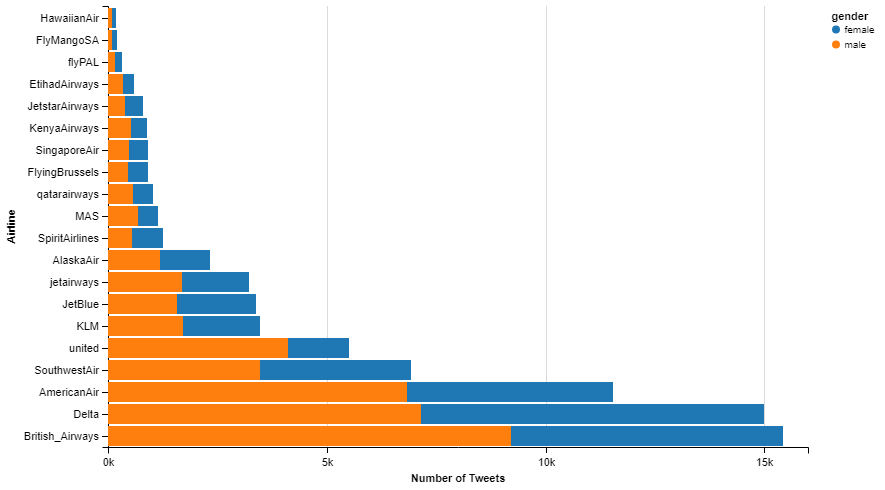

In [120]:
gender_df = pd.read_csv('gender-classifier-DFE-791531.csv',encoding='latin1')
gender_df = gender_df[((gender_df.gender == 'male') | (gender_df.gender == "female")) & (gender_df['gender:confidence'] == 1) ].reset_index(drop=True)

In [121]:
def stem_and_lem(text):
    # Remove non-ASCII chars.
    text = re.sub('[^\x00-\x7F]+',' ', text)     
    # Remove double spaces.
    text = re.sub('\s+',' ',text)
    text = "".join([stemmer.stem(word) for word in text])
    text = "".join([lemmatizer.lemmatize(word) for word in text])
    return text

In [122]:
gender_df.text=gender_df.text.apply(stem_and_lem)
feature_gender_df = pd.DataFrame()
feature_gender_df['features'] = ''
for k,item in enumerate(gender_df.loc[:,['text','description','sidebar_color','link_color']].astype(str).values):
    feature_gender_df.loc[k]=" ".join(item)

In [123]:
gender_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=0.001,
                                       max_iter=5, tol=None,
                                           class_weight='balanced')),])
X_train, X_test, y_train, y_test = train_test_split(feature_gender_df.features,gender_df.gender.astype(str),test_size=0.33,random_state=0,stratify=gender_df.gender)

In [129]:
parameters = {
    'vect__stop_words':('english',None),
    'tfidf__norm':('l1','l2'),
    'clf__loss': ('hinge','log','modified_huber'),
    'clf__alpha': (0.001,0.0001,0.00001, 0.000001),
    'clf__penalty': ('none','l1','l2'),
    'clf__max_iter': [10,100,1000],
}
grid_gender_clf = GridSearchCV(gender_clf,param_grid=parameters,cv=5,n_jobs=5)
grid_gender_clf.fit(feature_gender_df.features,gender_df.gender.astype(str))
grid_gender_clf.best_score_

0.70009980039920161

In [130]:
grid_gender_clf.best_estimator_.fit(X_train,y_train)
print(classification_report(grid_gender_clf.best_estimator_.predict(X_test), y_test))

             precision    recall  f1-score   support

     female       0.73      0.72      0.72      1791
       male       0.67      0.68      0.68      1516

avg / total       0.70      0.70      0.70      3307



### Gender distribution
![image](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAhkAAAH+CAYAAAAxsxwsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzt3XecnFWh//HPsyW9N1J26YGEIqCzoaOMXCxzvSrqKHCv%0AIqJeFVT8OfZ2xXr3ilfBfkXwYmH1ohJWirJIEYVZQAgh1FAmECAhpADpO78/ZoAQUrbMM+eZmc/7%0A9ZrX7s7ubL6TNt895zznRMViEUmSpEprCh1AkiTVJ0uGJEmKhSVDkiTFwpIhSZJiYcmQJEmxsGRI%0AkqRYWDIkSVIsLBmSJCkWlgxJkhQLS4YkSYqFJUOSJMXCkiFJkmJhyZAkSbGwZEiSpFhYMiRJUiws%0AGZIkKRaWDEmSFAtLhiRJioUlQ5IkxcKSIUmSYmHJkCRJsbBkSJKkWFgyJElSLCwZkiQpFpYMSZIU%0AC0uGJEmKhSVDkiTFwpIhSZJiYcmQJEmxsGRIkqRYWDIkSVIsLBmSJCkWlgxJkhQLS4YkSYqFJUOS%0AJMXCkiFJkmJhyZAkSbGwZEgJFkXRq6IoujR0DkkaDEuGJEmKhSVDilkURbtHUXRXFEXnR1F0TxRF%0Av4ii6Lgoiv4aRdG9URTNK9/+FkXRrVEU3RBF0b7b+D6joyg6L4qim8pf98YQz0eS+suSIVXH3sC3%0AgDnl20nAUcDHgc8AdwFHF4vFQ4AvAF/bxvf4LNBTLBbnAccCnVEUja5CdkkalJbQAaQG8UCxWFwA%0AEEXRQuCqYrFYjKJoAbA7MB64IIqi2UARaN3G9zge+Jcoij5e/ngEsCuwKO7wkjQYlgypOtZv8X7f%0AFh/3Ufp3eBZwdbFYfHMURbsDf9nG94iAtxSLxbvjiylJleN0iZQM44FHyu+fsp2vuQI4I4qiCCCK%0AokOqkEuSBs2SISXDfwJfj6LoVrY/wngWpWmU28tTLmdVK5wkDUZULBZDZ5AkSXXIkQxJkhQLS4Yk%0ASYqFJUOSJMXCkiFJkmJhyZAkSbGwZEiSpFhYMiRJUiwsGZIkKRaWDEmSFAtLhiRJioUlQ5IkxcKS%0AIUmSYrG90x4l1blCJtUKTAdmAjPKt12AccBoYMwWt219PAIolm995dv23l8PrAJWlt9ueVu51fuP%0AA0uApe3dvZvj+x2QFDdPYZXqUCGTagZ2BWYDewFtvLhMzAQmA1GojP2wCVhKqXAUyrct33+4vbv3%0AsXDxJO2MJUOqYYVMagIwd4vbHErFYg9gWMBo1bIKuHOL20Lgzvbu3kLQVJIAS4ZUMwqZ1AygY4vb%0AyyiNSuilVgOLeKF43A7c1N7duypoKqnBWDKkBCpkUhOBFC8uFbOChqp9RUrF4+/A38pv72zv7u0L%0AmkqqY5YMKQEKmdRewKuBVwLzgL3DJmoYq4E8L5SOv7d39z4ZNpJUPywZUgCFTGoXSqXiudtuYRNp%0AC3cAfwL+DFzT3t37TOA8Us2yZEhVUMikxlEapXiuVBwQNpH6aQOlEY4rgMuAf7R39/qfptRPlgwp%0AJoVMalfgBODNwBG4L009eAy4nFLhuLK9u3dl4DxSolkypAoqZFJzgLdQKhcvDxxH8dpIaVrlN8Dv%0ALRzSS1kypCEqZFIpSqMVJ1Dap0KNZwOlNRxdwB8sHFKJJUMahEImdSBwCqVRCxdtaksbePEIh3tz%0AqGFZMqR+KmRSk4CTgHfjVIj6ZwOlRaPnAZe2d/duCpxHqipLhrQD5TNAjqdULP4FGB42kWrYUuB8%0A4H/au3sXB84iVYUlQ9qGQia1D6Vi8U5Kh4lJlVIEeoCfAL9r7+7dEDiPFBtLhlRWHrV4M/AR4KjA%0AcdQYlgM/pzS6sSh0GKnSLBlqeIVMajxwGnA6sHvYNGpg1wNnU7o6xfNUVBcsGWpY5fNCPkxpWmRs%0A4DjSc+6hVDYuaO/uXRc6jDQUlgw1nEIm9UrgTOANQFPgONL2PAGcC3zfQ9tUqywZagiFTKoJeAfw%0AceCQwHGkgXiW0iWwZ7d39z4QOow0EJYM1bVyucgCXwDmBo4jDcVm4GLgG+3dvbeEDiP1hyVDdamQ%0ASUXA24AvAvsFjiNV2u+Az7V3994ZOoi0I5YM1ZVyuTiBUrk4MHAcKU59wC+BL7q5l5LKkqG6Ucik%0A3gR8CTgocBSpmjYCPwXOau/ufTR0GGlLlgzVvEImdRzwTTxPRI1tLfB94OtejaKksGSoZhUyqb2B%0Ab1E6U0RSyRpK+2z8V3t379Ohw6ixWTJUc8o7dH4eOAMYFjiOlFSPArn27t5fhg6ixmXJUM0oX456%0AGvAVYGrgOFKtuBY4o7279/bQQdR4LBmqCYVM6lXAf+OiTmkwNgM/AD7f3t27MnQYNQ5LhhKtkEnt%0ATmndxQmBo0j1YBnwGeA8D2FTNVgylEiFTKoF+Bil/S5GBY4j1Zs8cHp7d+9NoYOovlkylDiFTOoV%0AwP8AB4fOItWxIvAj4BPt3b1rQodRfbJkKDEKmdQo4CzgI0Bz4DhSo3gIeE97d+9VoYOo/lgylAjl%0A49d/CuwVOovUoH5E6ZJXRzVUMZYMBVXIpMZQ2q3zA0AUOI7U6BzVUEVZMhRMIZM6FjgP2D1wFEkv%0A5qiGKsKSoaorXzlyFvAJoClwHEnb5qiGhsySoaoqZFJ7AL8CDg2dRVK/fJfSqMaG0EFUeywZqppC%0AJnUi8ENgXOgskgakF3h7e3fv4tBBVFssGYpdIZMaDXwPeFfoLJIGbRVwWnt3729DB1HtsGQoVoVM%0A6hDg18A+obNIqojvAx9r7+5dHzqIks+SoVgUMqkI+CjwDTyOXao3twLZ9u7e+0IHUbJZMlRx5emR%0AC4C3hM4iKTZrgPe2d/deFDqIksuSoYoqXz3yB+DA0FkkVcWPgA979Ym2xZKhiilkUq8GLgImh84i%0AqapuAE5o7+59PHQQJYsbIakiCpnUR4ErsGBIjegIIF/IpF4eOoiSxZEMDUkhkxpOae+LUwJHkRTe%0AWuDU9u7eX4cOomRwJEODVsikZgLXYMGQVDIS+FUhk/py6CBKBkcyNCiFTGoe8HtgRugskhLpV8C7%0A3U+jsVkyNGCFTCoDdAGjQmeRlGg3AG9q7+5dFjqIwnC6RANSyKROoTSCYcGQtDNHADcWMil3/G1Q%0Algz1WyGT+hTwM6AldBZJNWMP4PryEQNqME6XaKfKW4R/G/hI6CySatZq4A3t3b3Xhg6i6rFkaIcK%0AmdQw4HzgxMBRJNW+tcDb2rt7u0MHUXVYMrRdhUxqDHAx8E+hs0iqG5uAd7V39/4ydBDFzzUZ2qZC%0AJjUN+AsWDEmV1QJcWMikPhQ6iOJnydBLlAvG1cArQmeRVJci4NxCJvX50EEUL6dL9CKFTGoqpYKx%0Af+gskhrCt9u7ez8WOoTi4UiGnlfIpKYAPVgwJFXPmYVM6tuhQygelgwBzxeMq4ADQmeR1HA+Wsik%0AvhY6hCrPkiEKmdRk4M/Ay0JnkdSwPu0ajfrjmowGV8ikJlEawTg4dBZJAj7R3t3bGTqEKsOS0cAK%0AmdRESgXD7X4lJcmH27t7zwkdQkNnyWhQhUxqHKVFnl6mKilpisD727t7fxI6iIbGNRkNqJBJtVLa%0AydOCISmJIuCHhUzqX0MH0dBYMhpM+bCznwGvDp1FknagCTi/kEmdEDqIBs+S0Xi+CZwcOoQk9UMz%0ApS3IDwsdRIPjmowGUsikPgx8J3QOSRqgZcBh7d29i0MH0cBYMhpEIZN6K3ARjl5Jqk13A4e3d/c+%0AFTqI+s+S0QAKmdQxwJXA8NBZJGkIrgX+qb27d0PoIOoff6qtc4VMan/gD1gwJNW+Y4CflRewqwZY%0AMupYIZPaBbgMmBA6iyRVyEnAl0OHUP84XVKnynth9ABHhc4iSTE4tb2792ehQ2jHHMmoX/+NBUNS%0A/fpRIZM6NnQI7ZgjGXWokEm9GzgvdA5JitkTwMvbu3sfCR1E2+ZIRp0pZFIdwA9C51D8jrh6Af90%0A7UJee92dZK5f9KLP/Xjx4+z6x5tZsWHTNh/70wce57hrF/LqaxfyPw88/pLPb/34/IqnOb786zzw%0AzDoAVm3cxMk33UOfP6gonGnAb8rTw0qgltABVDmFTGoapTNJvJKkQVx02L5MGvbif8aPrt3AtctX%0AM2vEsG0+5u41a/lVYTnzj5xLaxTxb/l7OW7aeHYfPWK7j//JA49zQWpvCms3cOHDy/j83HbOue8x%0ATt9rBk2RC/0V1OHA2cAZoYPopRzJqBOFTKoF+A3QFjqLwvqPRQU+M2cW23vtv/fpdRwyYTQjm5to%0AaYo4bNJYLnts5Q4f39IUsXZzH+s299ESRTz4zHoeXbeBwyePjfnZSP1yeiGTOil0CL2UJaN+nE3p%0AGnI1iAg46cZ7eP31i/jFw8sAuPLxlUwfMYz9xo3a7uP2HTuCm1Y8zVMbNrF2cx9XL1vF0nUbdvj4%0AD+01nTNvf5Dv3b+UU3abRuc9j5DbZ2Zsz00ahB+X9wVSgjhdUgcKmdQ7caiw4fzf4fsyfcQwlq/f%0AyMk33cveY0Zw7n1LuXDePjt83OwxI/nAXtM5+aZ7GdXcxH7jRtIUlUYqtvf4/ceN4g9HzAHgxhVr%0AmDa8lWIRPnjrYlqjiM/NbWPqcKfFFdRo4OJCJpVq7+5dEzqMSry6pMYVMql9gFso/QNTgzr7nkdp%0AjiLOf+gJRjaXBiiXrtvALsNbueTIuUzbQQH45t2PMGNEK/MmjuXEm+7Z4eOLxSL/mr+X7x28J1+4%0As8An9p3JkmdLazg+se+s+J+otHP/197d+9bQIVTiSEYNK6+o/gUWjIbz7KbN9AFjWpp5dtNmrlu+%0Amo/MnsGtsw96/muOuHoBlx459yULQwGWr9/IlOGtPLJ2A5c/9hS/P2IO41tbuPW4HT/+t4+s4Nip%0A45kwrIW1m/toIiKKYO3mvlifrzQAbylkUh9v7+79r9BBZMmodWcBqdAhVH3LNmzifTffD8CmYpE3%0AzZzEq6aO3+7XP7ZuA59c8BAXdMwG4P23LOapjZtojSLO2n9Xxrfu/L+CtZv7+O2S5c9Pp5y2xzTe%0Alb+X1qYmzjl4jwo8K6livl7IpK5u7+69OXSQRud0SY0qZFKvAq7CxbuStC2LKG3UtS50kEbmC1QN%0AKmRSE4H/xT8/SdqeucA3Q4dodL5I1aYf434YkrQzZxQyqeNCh2hkTpfUGM8lkaQBWQIc2N7du3Kn%0AX6mKcySjhhQyqb2B74bOIUk1pA04N3SIRmXJqBGFTKoZuBAYEzqLJNWYkwuZVDZ0iEZkyagdHwEO%0ADR1CkmrUDwqZlHvhV5klowYUMqk9Ke2JIUkanEnAT0OHaDSWjNrwY2D7J15JkvrjtYVM6sTQIRqJ%0AV5ckXCGTOhXbtyRVymPAnPbu3lWhgzQCRzISrJBJTQPcf1+SKmc68JXQIRqFJSPZvgVMDB1CkurM%0ABwuZlOc+VYHTJQlVyKReDfw5dA5JqlM3A/Pau3s9QjhGjmQkUCGTGg58P3QOSapjrwA+EDpEvbNk%0AJNMngH1Ch5CkOvfVQiY1PXSIembJSJhCJjUD+GToHJLUAMYDZ4cOUc8sGcnzFWB06BCS1CBOLK+B%0AUwxc+JkghUzqIOAWLH+SVE23AYe0d/f6glhhvpgly7fwz0SSqu0g4OTQIeqRIxkJUcikMsCloXNI%0AUoN6CNi3vbt3fegg9cSfmhOgkEm1AJ2hc0hSA9sN+FDoEPXGkpEM7wXmhg4hSQ3uM4VManzoEPXE%0AkhFYIZMaB/xH6BySJCYDnwodop5YMsL7FDA1dAhJEgAfKWRSs0KHqBeWjIAKmdQU4MOhc0iSnjcS%0AR5crxpIR1sdw4y1JSppTCpnUfqFD1ANLRiCFTGoicHroHJKkl2jG0YyKsGSE81FgbOgQkqRtOqGQ%0ASXnV3xBZMgIoX1HiWgxJSq4m4DOhQ9Q6S0YYZwATQoeQJO3QiYVMas/QIWqZJaPKCpnUGODM0Dkk%0ASTvVjPtmDIklo/o+SGnDF0lS8r2zkEnNCB2iVlkyqqiQSY0C/l/oHJKkfhtOaaG+BsGSUV3vBqaF%0ADiFJGpD3lxfsa4AsGVVSyKQiSgs+JUm1ZTzw/tAhapElo3qOA/YNHUKSNCgfLWRSraFD1BpLRvW4%0Au6ck1a6ZwJtDh6g1lowqKGRSuwP/HDqHJGlI/j10gFpjyaiOD+LvtSTVumMLmZTT3gPgC1/MCpnU%0ASOA9oXNIkirCBaADYMmI30nApNAhJEkV8a5CJjUidIhaYcmI34dCB5AkVcwk4O2hQ9QKS0aMCpnU%0AkcAhoXNIkirKBaD9ZMmI12mhA0iSKu6wQiZ1UOgQtcCSEZPygs+3hM4hSYqFoxn9YMmIzxuBsaFD%0ASJJicXL50EvtgCUjPv8aOoAkKTZjgTeEDpF0lowYFDKpKcBrQueQJMXqHaEDJJ0lIx7vAFpCh5Ak%0Axep1HgG/Y5aMeDhVIkn1bzgemrZDlowKK2RSewOHhs4hSaoKp0x2wJJReY5iSFLjOK6QSU0OHSKp%0ALBmVd3LoAJKkqmkB3ho6RFJZMiqovAPc3qFzSJKq6sTQAZLKklFZ/xw6gCSp6o4uZFIzQ4dIIktG%0AZbkxiyQ1niacMtkmS0aFFDKpaUBH6BySpCBeHzpAElkyKieDv5+S1KheWT4YU1vwRbFyXI8hSY1r%0ABPCq0CGSxpJRAYVMajhwfOgckqSgXhc6QNJYMirjVcCY0CEkSUFZMrZiyagMp0okSXsXMqm9QodI%0AEktGZVgyJEngaMaLWDKGqJBJzQZ2D51DkpQIlowtWDKG7pjQASRJifGq8sUAwpJRCUeHDiBJSoxR%0A+MPn8ywZQ+dfJknSlvzhs8ySMQSFTGoWsEfoHJKkRDkidICksGQMjW1VkrS1eYVMytdXLBlD5VSJ%0AJGlrY4EDQ4dIAkvG0DiSIUnalsNDB0gCS8YgFTKpScD+oXNIkhLJdRlYMobiKCAKHUKSlEiOZGDJ%0AGApbqiRpe/YuZFJTQ4cIzZIxeAeHDiBJSrSGH82wZAzey0IHkCQlWsOPeFsyBqE8BDYjdA5JUqId%0AEjpAaJaMwXEUQ5K0Mw1/BaIlY3AOCh1AkpR4swqZ1PjQIUKyZAyOIxmSpP5o6NEMS8bgOJIhSeoP%0AS4b6r5BJtQBzQ+eQJNUES4YGZA4wPHQISVJNsGRoQDxZT5LUX5YMDci+oQNIkmrGjEImNTF0iFAs%0AGQO3Z+gAkqSa0rCjGZaMgbNkSJIGYk7oAKFYMgZur9ABJEk1pT10gFAsGQNQyKRGAdND55Ak1RRL%0Ahvplt9ABJEk1py10gFAsGQOza+gAkqSaY8lQv1gyJEkD5XSJ+qVh/6JIkgZtTKOexmrJGBhHMiRJ%0Ag9GQP6S29OeLstlsM3Ae8L6urq718UZKtJmhA0iSalIbcEfoENXWr5GMrq6uzcDxQF+8cRJvcugA%0AkqSa1JCLPwcyXfJt4D+y2WxrXGFqQMPuPy9JGhKnS3biDEobUX0sm80uA4rPfaKrq6tR1ipMCh1A%0AklSTGnIkfCAl419jS1EDCplUMzAudA5JUk1qyNePfpeMrq6ua+IMUgMmAFHoEJKkmtSQl7D2u2Rk%0As9nhwBeAE4HJXV1d47PZ7PHAPl1dXefGFTBBnCqRJA1WQ45kDHTh5wHAybywHmMh8IFKh0ooS4Yk%0AabAsGTvxZuCkrq6uv1G+lLWrq+sRYFYcwRLIkiFJGixLxk5sYKvplWw2OxV4sqKJksvLVyVJg9WQ%0AazIGUjJ+A1yQzWb3AMhmszOAc4FfxxEsgSwZkqTBciRjJz4DPAAsoHSlxb3Ao8B/xJAriUaGDiBJ%0AqlnDC5nUsNAhqm0gl7BuAM4EzixPkyzv6uoq7uRh9aQ5dABJUk0bDywLHaKadlgystnsnjv49Nhs%0ANgtAV1fX4kqGSqiBbFwmSdLWxmDJeJH7KF2uGvHCZavPbUi15ShGI/yU3wjPUZIUn4Z7Hdlhyejq%0A6np+zUY2m303cBzwJeAhYDdKm3NdFWO+JHEkQ5I0FANZB1kXBvLCeRYwu6ura23543uz2ez7gXuA%0A8ysdLIEaroFKkiqq4UrGQJ5wE7D7VvftRuO8+DqSIUkaikZ5vXzeQF44vw30ZLPZnwEFoB04pXx/%0AI2i4vxxSf61sHbO8d/LcxZuamhvpijNpQMZtfKb49tAhqmwgl7B2ZrPZBcDbgEOApcCpXV1dl8cV%0ALmEcyZC28MjIKQ/Pbz/mgRumvmzi0y0jDyCKpoTOJCVckyVjB8qFolFKxdYcyVDDu3P87nfNbzvm%0A8Vsn7TtzQ3PrbGDX0JmkGtIXOkC1DeSo92GUpkcOpnSt7/O6urreWdlYkpJgc9S06abJ+y24tO2o%0ANXeP323vvqh5DjAndC6pRlkyduAC4CBgPvB4PHESbe3Ov0Sqfeuahj3TMz214IpZh20ujNplf6Lo%0AkNCZpDphydiB1wJ7dHV1rYwrTMI9EzqAFJenWscsu2zWEXdfPT01/Mnh4w8kig4LnUmqQxtCB6i2%0AgZSMh4HhcQWpAc+GDiBV0pJR0x6a33b0gzdMPXDSMy0j9yeKjgqdSapzT4cOUG0DKRk/B/6QzWa/%0Aw1bTJV1dXT0VTZVMjmSo5t0xfs8757cfvewfE/eZtbG5dW9Ke91Iqg5Lxg6cXn77ta3uLwI7Okit%0AXlgyVHM2RU0bb5xywILutqOevmfcrrP7oqb9QmeSGtTmfC69LnSIahvIPhl7xBmkBjhdopqwtnnY%0A0z3TU3dcMfPwviWjpu1PFL08dCZJjfmD6oD2ychms63AYcDMrq6ui7LZ7GiArq6uRvjNa4TnqBq1%0AYtjYZZfNOuKuq6enRqwYNu5lLtyUEqfhpkpgYPtkHAhcAqwH2oCLgFcC7wIaYRMzS4YSpTBq2oOX%0AtB/z0N+nHDjpmZYR+xNFR4fOJGm7LBk78QPgC11dXf+bzWafKt93DfCTysdKJKdLFFQRindM2HPR%0A/LZjlt02aXbbxqbWvXjpoYWSksmSsRP7AxeW3y9CaZokm82OrHiqZHIkQ1W3KWra+PcpBy7objvy%0A6XtduCnVMkvGTjwIvALofe6ObDY7D7ivwpmSannoAGoMzzYPX1NauHlY8REXbkr1oiFfQwZSMj4P%0AdGez2R8Cw7PZ7KeBDwCnxZIseZYDm/A0VsVgxbBxT3TPOvLua6a/fOSKYeMOJIoOD51JUkU9FjpA%0ACFGxWOz3F2ez2YOB91HawOdh4H+6urpujilb4hQyqUeAmaFzqD48PGqXBy5pP+bhv089YPKzzSP2%0AJ4qi0JkkxeaL+Vz6y6FDVNtAri557jdnOS8M+7wxm82+FlgCXN7V1VXvB6ctxZKhQSot3Nzrzkva%0Ajl5++6TZ7RubWvcEGn3/GalRNORIxkCG/vcB3gzcBBSAdmAepVNZ3wB8P5vNvqWrq+vyiqdMjqWh%0AA6i2bIqaNv5t6oG3d8866tn7xrXP7oua9g+dSVIQ9f5D+DYNpGQ0Ae/o6ur63XN3ZLPZNwIndXV1%0AHZbNZt8FfAOwZKihPdM8fPVVM+YtvHLmocVHR07dnyh6RehMkoKzZOzEa4ATt7rvUuB/y+9fCJxT%0AiVAJZsnQNj05bNzj3W1H3nPNLq8Y9dSwsS7clLQ1p0t24n5KV5Ocu8V9/16+H2AK9b9hlSVDz3to%0A9PQHLmk75uEbpx4w5dnm4fsRRbuEziQpsRzJ2InTgIuz2ewngUeAWcBm4ITy5/eldJlrPbNkNLAi%0AFG+fOHvh/Lajlt8+cfZum5pa9sCFm5J2bmU+l14bOkQIA72E9fkD0ii94P6tq6trY0zZEqeQSc0D%0AbgydQ9WzMWrecMPUl93+x7Yj1943tm2fYtTkaIWkgboln0s35NqsAW0sVS4U18WUpRYsCR1A8Xum%0AefjqP8849I4rZx4aLR055QCiKBU6k6Sa1ig7Y7+Eu1cOQHt376OFTOppYEzoLKqs5cPHP9Y968h7%0Ar9nl5aNWlhZuHhE6k6S6cf/Ov6Q+WTIG7h7AsyTqwOIxM++f33b0kpum7D91bfPwuUTR9NCZJNUl%0AS4b67W4sGTWpCMXbJs5eOL/t6CcXTNx7101NLXsBe4XOJanuWTLUb3eHDqD+2xg1r//rtIMW/HHW%0AkWvvHztr32LUdEDoTJIajmsy1G93hQ6gHXumecSqP82ct/BPM1y4KSm4dZS2fWhIloyBcyQjgZYN%0An7D00raj7r12l0PGrGod48JNSUnxQD6X7v9eEXXGkjFw9wBFwGO5A1s8Zub9l7Qds+SmKftNXVda%0AuDkjdCZJ2sqdoQOEZMkYoPbu3mcLmdQSSqfQqor6iPpumzh74fz2o1fcMWGv3Vy4KakG3BY6QEiW%0AjMG5C0tGVWyMmtdfP+2g2/8468h1i8fOmlOMmg4MnUmSBsCSoQG7C/in0CHq1dMtI1ddOePQhX+e%0AOa/psRGTDyCKOkJnkqRBsmRowP4ROkC9eaK8cPO6XQ4Zu6p1zAEu3JRUB1bmc+mHQocIyZIxODeF%0ADlAP7h8z675L2o95JD95v2nrWobPBVy4Kame3B46QGiWjMG5E/AMkwHqI+r7x6R9Fs5vO3rFwgl7%0A7r6pqWVvYO/QuSQpJg09VQKWjEFp7+7tK2RSNwOvDJ0l6TY0tay7btrBCy6bdcT6B8bM3NeFm5Ia%0AiCUjdIAalseSsU1rWkauvHLmYQv/PGNe8+MjJh3owk1JDerW0AFCs2QMnusytvDEiImPzm876r7r%0Aph0ydnXr6AOJoiNDZ5KkgJ7BNRmWjCFo+JJx79j2ey9pO/rR3ilzd1nfPHwOMDN0JklKiBvzufSm%0A0CFCs2QMUnt370OFTOpxYJfQWaqlj6jvlkn73jG//ein7hy/5x6bm5pnA7ND55KkBPpr6ABJYMkY%0Amjzwz6FDxGlDU8u6a6cdcvtls47Y8OCYGXOKUdPLQmeSpBpwfegASWDJGJq6LBmrW0Y9VVq42dH6%0AxIhJBxBF80JnkqQashn4W+gQSWDJGJrrQgeolMdGTFoyv+3oxddPO3jcmtZRBxBFR4XOJEk1akE+%0Al14TOkQSWDKG5gZgLTAydJDBuGds+z2XtB+z9ObJc6evbx62L9AWOpMk1QHXY5RZMoagvbt3fSGT%0AuhZ4Tei1C6uGAAAVe0lEQVQs/bGZaPMtk+fcMb/t6JWLxu+x5+am5n2AfULnkqQ6Y8kos2QM3Z9I%0AcMlY39S69tpdDrn9splHbHxozIy5xSg6KHQmSapjRaAndIiksGQM3Z9CB9ja6tbRKy6fediiq2Z0%0AtC4bPvEAoujQ0JkkqUHcls+lHw8dIiksGUO3AAi+X8bSkZOXXNp29OLrpx00fk3LqAPccVOSgrg8%0AdIAksWQMUXt3b7GQSV0FnFTtX/vucbveM7/tmKU3T54zY33zsH1w4aYkhXZF6ABJYsmojD9RhZKx%0AmWjzzZPnLri07ajVLtyUpMRZg4s+X8SSURmxrctY19T67DW7vHzB5bOO2PTw6Olzi1F0cFy/liRp%0ASK7O59IbQ4dIEktGBbR39z5SyKQWAXMr8f1WtY5+8vKZhy/qmdExbNnwCQe6cFOSaoLrMbZiyaic%0AyxlCyXh05JTCpW1HLb5+2kETnm5xx01JqkGWjK1YMirn98CZA3nAonG73TW//ZjHb5m078wNzcNm%0AA+3xRJMkxWxRPpd+IHSIpLFkVM71wBPAtO19weaoaVN+8tw7Lm07evVd43bbq6+peQ4wp2oJJUlx%0A+b/QAZLIklEh7d29fYVM6hLgtC3vX9fU+uxfpr9iweUzD9/08Ojp++HCTUmqR78NHSCJLBmVdTFw%0A2srWMcsvn3X4op7pqeHLXbgpSfXu3nwufVvoEElkyaisq049/HN/XTls7OFE0dGhw0iSqsJRjO1o%0ACh2gnrR3925YOXzc/USRv6+S1DgsGdvhi2HldYUOIEmqmsX5XPqW0CGSypJReVcCT4UOIUmqCq8q%0A2QFLRoWVt5S9OHQOSVJVXBQ6QJJZMuJxQegAkqTY3ZHPpW8OHSLJLBkxyOfS1wH3hs4hSYrVz0IH%0ASDpLRnzODx1AkhSbTcCFoUMknSUjPj8H+kKHkCTFojufSz8ROkTSWTJiks+llwB/Cp1DkhQLp0r6%0AwZIRr/NCB5AkVdwTQHfoELXAkhGvP+CeGZJUby7M59KbQoeoBZaMGOVz6fXAL0LnkCRVlKPU/WTJ%0AiN/3gWLoEJKkivhLPpdeGDpErbBkxCyfSy/CBaCSVC++EzpALbFkVId/KSWp9j0IXBI6RC2xZFTH%0AZcA9oUNIkobk3Hwu7f5HA2DJqIJ8Ll0EzgmdQ5I0aM8APw0dotZYMqrnfGBV6BCSpEH5eT6XXhk6%0ARK2xZFRJPpd+Gi97kqRa5Gj0IFkyquscYHPoEJKkAbmifKWgBsiSUUX5XPoB4KLQOSRJA/LV0AFq%0AlSWj+r6Km3NJUq24Jp9LXx86RK2yZFRZPpe+E7g4dA5JUr98JXSAWmbJCMO/tJKUfH/P59J/Dh2i%0AllkyAsjn0v8A5ofOIUnaIX8gHCJLRjhnhQ4gSdquW/O5dHfoELXOkhFIPpfOA1eEziFJ2iavKKkA%0AS0ZYXw4dQJL0ErfjAv2KsGQElM+lb8AT/SQpaT5ZPnNKQ2TJCO9TuAuoJCVFTz6Xvjx0iHphyQis%0AvFWtZ5pIUnhF4BOhQ9QTS0YyfBF4NnQISWpwF+Vz6ZtDh6gnlowEyOfSS4GzQ+eQpAa2Afhs6BD1%0AxpKRHP8JLAsdQpIa1A/zufTi0CHqjSUjIfK59BrcoEuSQliN///GwpKRLD8EFoUOIUkN5sv5XHp5%0A6BD1yJKRIPlceiNweugcktRAFgLfCR2iXlkyEiafS/cAvw6dQ5IaxIfyufSm0CHqlSUjmf4fsCZ0%0ACEmqc7/M59LXhA5RzywZCZTPpR8FvhQ6hyTVsdXAx0OHqHeWjOT6LnBH6BCSVKe+VN6jSDGyZCRU%0AeY7wg6FzSFIdWgCcEzpEI7BkJFg+l74O+HnoHJJUR4rAB13sWR2WjOQ7E3gsdAhJqhPn5HPp60OH%0AaBSWjITL59IrgPeHziFJdeB+4NOhQzQSS0YNyOfSlwC/CJ1DkmpYETg1n0t74nUVWTJqx4dx2kSS%0ABut7+Vz62tAhGo0lo0Y4bSJJg7YY+FToEI3IklFDytMmF4bOIUk15LlpkmdCB2lEloza82HADWQk%0AqX++59bh4Vgyakw+l34KeBeldi5J2r4FQC50iEYWFYu+VtWijs6ebwCfDJ1D2lqxbzN3fveDDBs3%0Amdmnfo1HrryA5Td10zJ6AgCzXvseJsw99CWPW3X3TTz8h+9BsY8p817PjGNPfP5zj//1dyy74Q/Q%0A1MT4OYfSnnk/ax68g4cv/m+i5lb2POmzjJjaxqa1T7P4wi8z+z3fIGryZ6gG9yzQkc+l7wwdpJG1%0AhA6gQfsc8ErgsNBBpC09fv3FjJy2K5vXvTAFvsvRb2X6K7PbfUyxbzMP/+677PPe/6R1/FQWnfNB%0AJux3OCN32Z3V993KyoU3sN+ZP6apZRgbn36q9Otc+xtmn/p11j/1GMv+Pp/2N3yApVddyPT0SRYM%0AAXzUghGe/xJrVHlL3BOBVaGzSM/ZsHIZq+66kSnzXj+gxz1TuIvhU2YxfPJMmlpamXTQsaxceAMA%0Ay/4+nxnHvoOmlmEAtI6ZCEDU1ELfxnX0bVxP1NzCuicfZcPKZYzb6+DKPinVoq58Lv2T0CFkyahp%0A+Vz6QeC9oXNIzynM/x5tr38fRNGL7n/ir79j4dmn8UBXJ5ueXfOSx21YtZxh46c+//Gw8VPZsHo5%0AAOuWLWHNAwtYdM6HuOsHZ/JM4S4AZqRP5IGLvsljPb9k2hFv4pHLf8qs17w7xmenGvEg8L7QIVRi%0Ayahx+Vz6N4CNXcGtvPNvtIyZyOi2fV50/7TD38CBn7qQ/T76Y1rHTaJw6Q8H9H2LfZvZ/Owa5px+%0ALm2Z93P/hWdRLBYZNXNv5p5+Lvv++9msX7GU1rGTgSL3X3gWi3/1NTauWVHBZ6casQk4MZ9LO8Kb%0AEJaM+vARYGHoEGpsTz+0kJV33sDtXz+Jxb/4Cmvu/weLf/U1WsdOImpqJmpqYuq8zPMjEVsaNn4K%0AG1Yte/7jDauWMWzclPLnpjLhgKOIoogxu84hiiI2PfPCa0ixWGTpVRcy87h/5dE//S9tmfcxdV6G%0Ax//6u/iftJLm8/lc+u+hQ+gFlow6kM+l1wIn4PoMBdT2utM46LMX8bJP/5I9T/4cY/c6mD1P/Awb%0AVj/5/Nc8dcf1jJy++0seO7ptDuuWP8L6FUvp27SRFbddzYT9jgBgwv5Hsub+fwCwblmBvs2baBk9%0A/vnHPnnzlYyfcygto8bRt3EdURRBU0TfhvXxPmElze+Ab4YOoRfz6pI6kc+l7+no7DkZuATLoxJk%0AyR9/zNpH7wdg2MTp7PaWM4HSOowHf/st9nnP14mam9n1jWdwz/98Evr6mNzxuufLyJSO1/Lgbzq5%0A41vvoam5hT3e/slSkQA2b1jHk71XMPu9/wnALse8lXvP+wxRcwt7nvjZ6j9ZhbIQeGc+l3ZPhoRx%0An4w609HZ8zngrNA5JKlKVlLaD+O+0EH0Uv7EW3++ClwcOoQkVUEfcJIFI7ksGXWmPFz4LlwIKqn+%0AfT6fS18WOoS2z+mSOtXR2bMXkAcmhs4iSTH4bT6XflvoENoxRzLqVD6Xvp/SjqCbQ2eRpApbAJwS%0AOoR2zpJRx/K59BXAh0LnkKQKWgpk8rn0Mzv9SgVnyahz+Vz6R8DXQ+eQpAp4mlLBKIQOov6xZDSG%0AzwK/CB1CkoZgM/COfC59a+gg6j9LRgMoX3FyKnB16CySNEgfyufS3aFDaGAsGQ0in0tvAN4M3BE6%0AiyQN0FfKU7+qMV7C2mA6Onvagb8Bs0JnkaR++Fk+lz41dAgNjiMZDaa8YOp1gOdgS0q6S4D3hQ6h%0AwbNkNKB8Lr0AeA2wOnQWSdqOK4BsPpfeFDqIBs+S0aDyuXQv8HrAa80lJc01wJvzufT60EE0NJaM%0ABpbPpf8K/AuwLnQWSSr7G/DP+Vx6beggGjpLRoPL59I9wAnAhtBZJDW8W4DX5XPpp0MHUWVYMkT5%0AFMMTAec+JYVyB3B8PpdeFTqIKseSIQDyufTFwDvxQDVJ1XcXcFw+l34ydBBVliVDz8vn0r8Csjh1%0AIql6/gEck8+lHw8dRJXnZlx6iY7OntcCFwMjQ2eRVNf+TmkNxsrQQRQPRzL0Evlc+nJKG3a5+EpS%0AXP4C/JMFo75ZMrRN+Vz6GuA4wP8AJFXaZcDrvYqk/lkytF35XPpG4FhgWegskurG/wFvch+MxmDJ%0A0A7lc+l/AMcAhdBZJNW8C4C3l0+FVgNw4af6paOzZybQDRwcOoukmnRWPpf+QugQqi5Lhvqto7Nn%0ADNBFaVGoJPXHJuD9+Vz6vNBBVH1Ol6jfyou0/gX4SegskmrCakoLPC0YDcqRDA1KR2fPp4GvAlHo%0ALJISaQmQyefSt4cOonAsGRq0js6eE4HzgWGBo0hKltsoFYxHQgdRWE6XaNDK25AfBzwROoukxOgG%0AjrZgCCwZGqJ8Ln0dkAJ6Q2eRFFQR+DLwhnwuvSZ0GCWD0yWqiI7OnhHAD4BTAkeRVH2rgXfmc+k/%0AhA6iZLFkqKI6OntOB84GWkNnkVQVd1HawfPu0EGUPJYMVVxHZ8/RwG+AXUJnkRSr31MawXB6RNvk%0AmgxVXHmdxiuAG0NnkRSLPuALwAkWDO2IIxmKTUdnTyulvTQ+jvtpSPXiUeDf8rl0T+ggSj5LhmLX%0A0dlzPPBznD6Rat2lwLvzufTy0EFUGywZqoqOzp5dKBWN40NnkTRg64FP5HPp74YOotpiyVDVdHT2%0ARJSmTr6KV59IteIu4B35XPq20EFUeywZqrqOzp4U8Ctg79BZJO3QecCH87n0M6GDqDZZMhRE+dj4%0AbwIfwEWhUtI8Bnwgn0v/PnQQ1TZLhoLq6Ox5FfBTYM/AUSSVXAh8JJ9LrwgdRLXPkqHgOjp7RgNf%0AA87AUQ0plEeBf8/n0vNDB1H9sGQoMco7hZ6HazWkarsA+Gg+l14ZOojqiyVDidLR2TOS0tUnH8Ed%0AaaW4PQK8L59L/zF0ENUnS4YSqXwFyg8pbU8uqbI2Ad8B/sNtwRUnS4YSq6Ozp4nS1SdfBcYHjiPV%0Ai78Ap+dz6YWhg6j+WTKUeOXdQr8JvBMXhkqDtRT4eD6X/mXoIGoclgzVjI7OnsOBc3AKRRqITZT+%0A3XzRqRFVmyVDNaU8hfIe4MvA9MBxpKT7E/CxfC59R+ggakyWDNWk8t4a/w/IAWMCx5GS5lbgk/lc%0A+k+hg6ixWTJU0zo6e6YBXwDeh4euSQ8CnwN+mc+l/c9dwVkyVBc6Onv2prRr6NtCZ5ECWAF8Bfh+%0APpdeHzqM9BxLhupKR2fPPOAbwLGhs0hV8DRwLvCNfC69KnQYaWuWDNWljs6eo4DPA8eHziLFYDWl%0AK0a+nc+lnwwdRtoeS4bqWnlk43PAG0JnkSrgKUo7dX7Hc0ZUCywZaggdnT0HUyobJ+CGXqo9y4Gz%0Age/lc+nVocNI/WXJUEPp6OzZD/g08Ha8GkXJ9zDwXeCH+Vz6mdBhpIGyZKghdXT2zAA+CLwfmBo4%0AjrS1vwL/Dfwun0tvDh1GGixLhhpaR2fPcOAkSkfLHxQ4jhrbRuAiSustekOHkSrBkiGVdXT2vJJS%0A2Xgj0BQ4jhrHMuBHlPa4WBo6jFRJlgxpKx2dPbsBpwKnALuGTaM6VQT+DPwU+L0baKleWTKk7Sgf%0AxvZqSoXjzcDwsIlUBx4Cfgacn8+lHwodRoqbJUPqh47OnonAyZQKxyGB46i2rAd+B5wHXJXPpfsC%0A55GqxpIhDVB5z42TKJ2TsnvYNEqozcBfgC7gt/lcekXYOFIYlgxpCMo7ir6tfNstcByF1QdcQ6lY%0A/F8+l14WOI8UnCVDqpCOzp5DeaFwuGC0MfQB1/PCiMXjgfNIiWLJkCqso7MnAl4BvB54HTAPL4mt%0AJyuBK4E/Apflc+knAueREsuSIcWso7NnMvAaSqXjNcCUsIk0CLdTKhV/BG5wF06pfywZUhWVL4vt%0AoDTCcSylUY4RQUNpWx4FrgV6gD/mc+lHAueRapIlQwqovK15B3BM+XYEMDZoqMb0AKVScS1wTT6X%0Avj9wHqkuWDKkBOno7GkGDqZUOI6ktLZj95CZ6tB6YAHQC1wHXJvPpZeEjSTVJ0uGlHDljcBeTqlw%0AvLx82xuIQuaqEWuB24CbgVvKbxfmc+lNQVNJDcKSIdWgjs6ecZR2Ht0f2HeL26405pUsG4H7gEVb%0A3P4B3OUiTSkcS4ZURzo6e0YAs3mhdOxDaZOwNmAWtb3IdAXwCLAEWAzcu8XtAUcnpOSxZEgNpHw5%0AbRsvlI42YCYwCZhYvk0ovx1LvFMymyjtObESeGqLt0/wQplY8tz7+Vx6bYxZJMXAkiFpm8qLUCeU%0Ab+OBYeVb61Zvn3u/idK0xUZgwzbe30BpjcRTwMp8Lv10FZ+OpAAsGZIkKRaNuEBMkiRVgSVDkiTF%0AwpIhSZJiYcmQJEmxsGRIkqRYWDIkSVIsLBmSJCkWlgxJkhQLS4YkSYqFJUOSJMXCkiFJkmJhyZBU%0Al6Io+nAURYuiKPpFTN//S1EUfTyO7y3Vi5bQASQpJh8EjisWi0tCB5EalSVDUt2JouiHwJ7AZVEU%0A/RrYCziA0pH0XyoWi3+IougU4E3AaGA28F+Ujq3/N2A98PpisbgiiqL3Au8rf+4+4N+KxeKzW/16%0AewHfA6YCzwLvLRaLd8X+RKWEc7pEUt0pFov/DjwKHEupRPQUi8V55Y87oygaXf7SA4ATgA7gq8Cz%0AxWLxEOBvwDvLX3NxsVjsKBaLBwGLgPds45f8MXBGsVh8BfBx4PvxPDOptjiSIaneHQ/8yxbrJ0YA%0Au5bfv7pYLK4B1kRRtAqYX75/AfCy8vsHRFH0FWACMAa4YstvHkXRGOAI4DdRFD139/A4nohUaywZ%0AkupdBLylWCze/aI7o+hQStMiz+nb4uM+Xvj/8XzgTcVi8bbyFMurtvr+TcDKYrF4cGVjS7XP6RJJ%0A9e4K4IyoPMwQRdEhA3z8WGBpFEWtwMlbf7JYLK4GHoii6G3l7x9FUXTQEDNLdcGSIanenUVpweft%0AURQtLH88EJ8HbgT+CmxvMefJwHuiKLoNWAi8cZBZpboSFYvF0BkkSVIdciRDkiTFwpIhSZJiYcmQ%0AJEmxsGRIkqRYWDIkSVIsLBmSJCkWlgxJkhQLS4YkSYqFJUOSJMXCkiFJkmJhyZAkSbGwZEiSpFhY%0AMiRJUiwsGZIkKRaWDEmSFAtLhiRJioUlQ5IkxcKSIUmSYmHJkCRJsbBkSJKkWFgyJElSLCwZkiQp%0AFpYMSZIUC0uGJEmKhSVDkiTFwpIhSZJiYcmQJEmxsGRIkqRYWDIkSVIsLBmSJCkWlgxJkhQLS4Yk%0ASYqFJUOSJMXCkiFJkmJhyZAkSbGwZEiSpFhYMiRJUiwsGZIkKRb/H13Xfiss+wdDAAAAAElFTkSu%0AQmCC)

### 4- There is a positive relationship between number of followers and number of tweets.
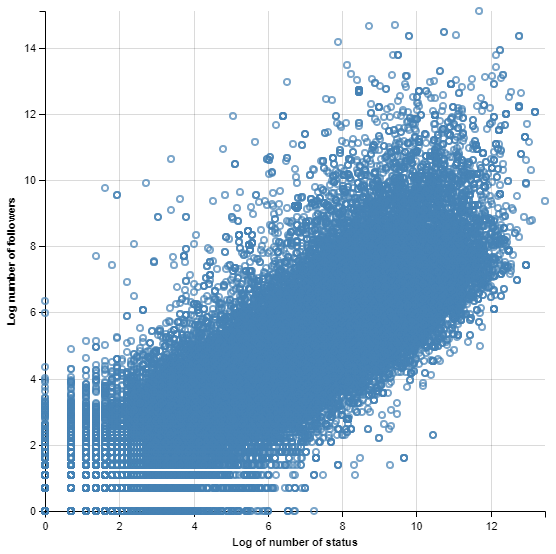

### 5- Spirit airlines has the highest negative to positive ratio out of all the other airlines
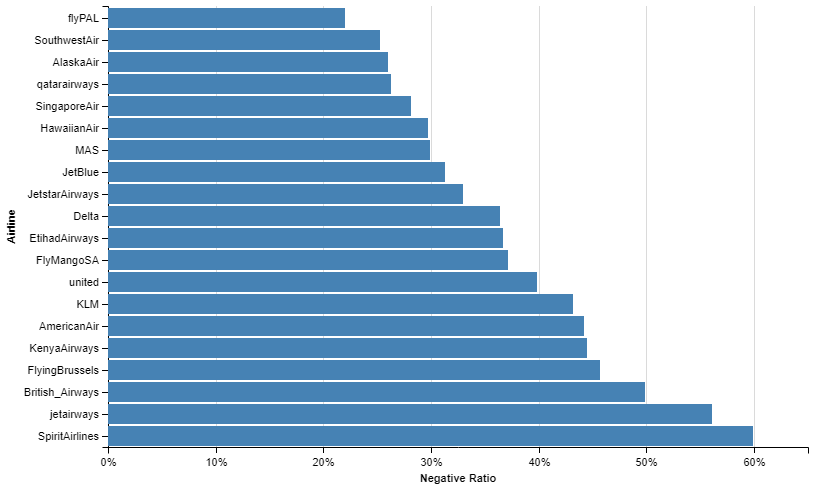

# Future directions and unanswered questions:
- What kind of resonse did the cutomers got from the airlines?
- If a better accuracy has been achived in both gender and negative reason classifaction, will we find new patterns?
- Are some of the negative tweets contrived by other companies?
- Does the airlines companies treat influencers differently?

# Conclution:
- There is a negative relationship between text length and sentiment score.
- Customer service is the most issue that the customer face.
- Most of United airlines customers are males
- There is a positive relationship between number of followers and number of tweets.
- Spirit airlines has the highest negative to positive ratio out of all the other airlines